In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab
import plotly.express as px
from collections import Counter
from plotly import io
import plotly

import warnings
import itertools
import statsmodels.api as sm
import traceback
from time import time

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

In [3]:
def dates(s):
    year = s[:2]
    month = s[2:4]
    return "20" + year + "-" + month + "-" + "01"

In [4]:
same_city = {"DABOLIM":"GOA","Jharsuguda":"JHARSUGUDA","KADAPA":"CUDDAPAH","PONDICHERRY":"PUDUCHERRY"}

## Directed Weighted Network Creation

In [5]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000
graphs = []

passengers1 = []  # records number of total passengers(month wise)
lbls = []
lbls2 = []
tt = 0


monthstogether = 1
passengers = []    # records number of total passengens for given combined months


while (tt < len(excel_list)):
    i = excel_list[tt]
    lbls2.append(dates(i))
    path = "Raw_Data/"+i
    lbls.append(i[:-4])
    cities = {}
    G = nx.DiGraph()
    xmonths = Counter()
    
    for jj in range(tt,min(tt+monthstogether,len(excel_list))):
        
        path = path = "Raw_Data/" + excel_list[jj]
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        

        
        for i in range(1,len(excel)+1):
            city1 = excel["city1"][i]
            city2 = excel["city2"][i]
            
            
            if city1 in same_city:
                city1 = same_city[city1]
        
            if city2 in same_city:
                city2 = same_city[city2]
            cities[city1] = (coordinates["Longitude"][city1],coordinates["Latitude"][city1])
            cities[city2] = (coordinates["Longitude"][city2],coordinates["Latitude"][city2])
            
            citypair1 = (city1,city2)
            citypair2 = (city2,city1)
            
            xmonths[citypair1] += excel["to"][i]
            xmonths[citypair2] += excel["from"][i]

            if xmonths[citypair2] == 0:
                xmonths.pop(citypair2)
            if xmonths[citypair1] == 0:
                xmonths.pop(citypair1) 
        passengers1.append(sum(excel["to"]) + sum(excel["from"]))
            
            
    for i in cities:
        G.add_node(i, pos= cities[i])


    print(path)
    for jj in xmonths:
        G.add_edge(jj[0],jj[1],weight=xmonths[jj])
        max_weight = max(max_weight,xmonths[jj])
        min_weight = min(min_weight, xmonths[jj])
    print(excel)
    graphs.append(G)
    passengers.append(sum(list(xmonths.values())))
    tt += monthstogether

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[120 rows x 2 columns]
Raw_Data/1505.csv
             city1       city2       to     from
SNo                                             
1    AGATTI ISLAND       KOCHI    482.0    787.0
2        AHMEDABAD   BENGALURU  15846.0  13112.0
3        AHMEDABAD      BHOPAL   1020.0    720.0
4        AHMEDABAD     CHENNAI  16090.0  14762.0
5        AHMEDABAD  COIMBATORE    946.0   1204.0
..             ...         ...      ...      ...
280       VADODARA   BENGALURU    513.0      0.0
281       VADODARA     CHENNAI   1106.0   1012.0
282       VAD

Raw_Data/1608.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    397    548
2         AGARTALA  VISAKHAPATNAM     11      0
3    AGATTI ISLAND          KOCHI    411    465
4        AHMEDABAD      BENGALURU  18536  18791
5        AHMEDABAD        CHENNAI  13234  13644
..             ...            ...    ...    ...
305       VADODARA      HYDERABAD    260    407
306       VADODARA        KOLKATA    890      0
307       VADODARA        LUCKNOW    197    238
308       VADODARA         MUMBAI  25810  22203
309     VIJAYAWADA  VISAKHAPATNAM   2357   2174

[309 rows x 4 columns]
Raw_Data/1609.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    360    441
2         AGARTALA  VISAKHAPATNAM     27      0
3    AGATTI ISLAND          KOCHI    448    686
4        AHMEDABAD      BENGALURU  16998  18289
5        AHMEDABAD        CH

Raw_Data/1711.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   2095   1704
2         AGARTALA           PUNE     92      0
3         AGARTALA  VISAKHAPATNAM      4      0
4    AGATTI ISLAND          KOCHI    985   1213
5             AGRA          DELHI      0     31
..             ...            ...    ...    ...
397       VADODARA        KOLKATA    118    199
398       VADODARA        LUCKNOW      0    146
399       VADODARA      MANGALORE     84      0
400       VADODARA         MUMBAI  26365  25352
401     VIJAYAWADA  VISAKHAPATNAM   3289   3217

[401 rows x 4 columns]
Raw_Data/1712.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   2044   1839
2         AGARTALA           PUNE    199      0
3    AGATTI ISLAND          KOCHI    910   1072
4             AGRA          DELHI      0     31
5             AGRA         J

Raw_Data/1905.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  1968  1776
2      AGARTALA       BAGDOGRA    10     0
3      AGARTALA      BENGALURU  4774  4129
4      AGARTALA        CHENNAI  2057  2095
5      AGARTALA     COIMBATORE     0    10
..          ...            ...   ...   ...
493    TIRUPATI     VIJAYAWADA   955  1144
494    TIRUPATI  VISAKHAPATNAM   456   479
495  TRIVANDRUM       VARANASI     4     0
496     UDAIPUR  VISAKHAPATNAM     2     0
497  VIJAYAWADA  VISAKHAPATNAM  2703  2527

[497 rows x 4 columns]
Raw_Data/1906.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2275  2172
2      AGARTALA      BENGALURU  2945  2710
3      AGARTALA        CHENNAI  2125  2002
4      AGARTALA     COIMBATORE     0    17
5      AGARTALA          DELHI  2669  2652
..          ...            ...   ...   ...
501    TIRUPATI     VIJAYAWADA   819 

In [6]:
print(lbls2)
print(lbls)

['2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']
['1505', '1506', '1507', '1508', '1509', '1510'

In [7]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

In [8]:
print(lbls1)

['May15', 'June15', 'July15', 'Aug15', 'Sep15', 'Oct15', 'Nov15', 'Dec15', 'Jan16', 'Feb16', 'March16', 'April16', 'May16', 'June16', 'July16', 'Aug16', 'Sep16', 'Oct16', 'Nov16', 'Dec16', 'Jan17', 'Feb17', 'March17', 'April17', 'May17', 'June17', 'July17', 'Aug17', 'Sep17', 'Oct17', 'Nov17', 'Dec17', 'Jan18', 'Feb18', 'March18', 'April18', 'May18', 'June18', 'July18', 'Aug18', 'Sep18', 'Oct18', 'Nov18', 'Dec18', 'Jan19', 'Feb19', 'March19', 'April19', 'May19', 'June19', 'July19', 'Aug19', 'Sep19', 'Oct19', 'Nov19', 'Dec19', 'Jan20', 'Feb20', 'March20', 'April20', 'May20', 'June20', 'July20', 'Aug20', 'Sep20', 'Oct20', 'Nov20', 'Dec20']


In [9]:
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

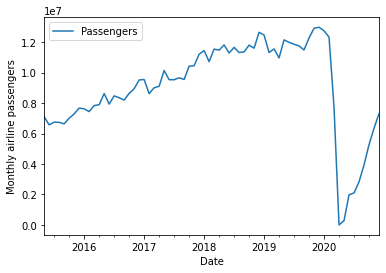

In [10]:
data = {"Month":lbls2,"Passengers":[i+1 for i in passengers1]}
data = pd.DataFrame.from_dict(data)
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m-%d')
data.set_index(['Month'], inplace=True)
data.plot()
plt.ylabel('Monthly airline passengers')
plt.xlabel('Date')
plt.show()

In [11]:
data

Passengers
Month                 
2015-05-01   7097142.0
2015-06-01   6568844.0
2015-07-01   6747793.0
2015-08-01   6735368.0
2015-09-01   6637324.0
...                ...
2020-08-01   2824788.0
2020-09-01   3938689.0
2020-10-01   5266911.0
2020-11-01   6342590.0
2020-12-01   7306065.0

[68 rows x 1 columns]

In [12]:
train_data = data['2015-05-01':'2019-10-01']
test_data = data['2019-10-01':]
print(train_data)

            Passengers
Month                 
2015-05-01   7097142.0
2015-06-01   6568844.0
2015-07-01   6747793.0
2015-08-01   6735368.0
2015-09-01   6637324.0
2015-10-01   7008490.0
2015-11-01   7289548.0
2015-12-01   7674873.0
2016-01-01   7620880.0
2016-02-01   7443544.0
2016-03-01   7835403.0
2016-04-01   7896941.0
2016-05-01   8623382.0
2016-06-01   7933792.0
2016-07-01   8475448.0
2016-08-01   8349519.0
2016-09-01   8198646.0
2016-10-01   8638149.0
2016-11-01   8941497.0
2016-12-01   9516244.0
2017-01-01   9548613.0
2017-02-01   8615716.0
2017-03-01   9007697.0
2017-04-01   9100688.0
2017-05-01  10140074.0
2017-06-01   9536984.0
2017-07-01   9533227.0
2017-08-01   9663381.0
2017-09-01   9549438.0
2017-10-01  10418437.0
2017-11-01  10453412.0
2017-12-01  11206076.0
2018-01-01  11448113.0
2018-02-01  10720208.0
2018-03-01  11544834.0
2018-04-01  11475499.0
2018-05-01  11818635.0
2018-06-01  11288338.0
2018-07-01  11658024.0
2018-08-01  11319217.0
2018-09-01  11363707.0
2018-10-01 

In [13]:
starr = time()
warnings.filterwarnings("ignore")

import traceback
AIC = []
SARIMAX_model = []
print(len(pdq))
print(len(seasonal_pdq))
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            traceback.print_exc()
            continue
print("time ",time()-starr )

16
16
SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:1895.5585681465125
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:1883.222478730997
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:1315.7896244900755
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:3760.27368735562
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:1782.8895193182552
SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:1720.0571816447505
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:1283.7603087787732
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:1409.82144246942
SARIMAX(0, 0, 0)x(2, 0, 0, 12) - AIC:1710.6017617929313
SARIMAX(0, 0, 0)x(2, 0, 1, 12) - AIC:1718.1108690574144
SARIMAX(0, 0, 0)x(2, 1, 0, 12) - AIC:1242.8658378228747
SARIMAX(0, 0, 0)x(2, 1, 1, 12) - AIC:1553.8192616140589
SARIMAX(0, 0, 0)x(3, 0, 0, 12) - AIC:1699.2149561395256
SARIMAX(0, 0, 0)x(3, 0, 1, 12) - AIC:1703.489131859063
SARIMAX(0, 0, 0)x(3, 1, 0, 12) - AIC:1712.3666520406807
SARIMAX(0, 0, 0)x(3, 1, 1, 12) - AIC:1236.6050516247424
SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:1862.3057731034676
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:1859.872068

SARIMAX(2, 0, 1)x(1, 0, 0, 12) - AIC:1563.5896568539767
SARIMAX(2, 0, 1)x(1, 0, 1, 12) - AIC:1563.3942583290016
SARIMAX(2, 0, 1)x(1, 1, 0, 12) - AIC:1265.3285561388468
SARIMAX(2, 0, 1)x(1, 1, 1, 12) - AIC:1245.6206217552149
SARIMAX(2, 0, 1)x(2, 0, 0, 12) - AIC:1562.467487574057
SARIMAX(2, 0, 1)x(2, 0, 1, 12) - AIC:1564.3640999353654
SARIMAX(2, 0, 1)x(2, 1, 0, 12) - AIC:1240.424715503512
SARIMAX(2, 0, 1)x(2, 1, 1, 12) - AIC:1235.092577034468
SARIMAX(2, 0, 1)x(3, 0, 0, 12) - AIC:1564.3546033807288
SARIMAX(2, 0, 1)x(3, 0, 1, 12) - AIC:1566.3500826271645
SARIMAX(2, 0, 1)x(3, 1, 0, 12) - AIC:1233.0982188545188
SARIMAX(2, 0, 1)x(3, 1, 1, 12) - AIC:1233.9847085470687
SARIMAX(2, 1, 0)x(0, 0, 0, 12) - AIC:1545.2607087674664
SARIMAX(2, 1, 0)x(0, 0, 1, 12) - AIC:1540.1565766751248
SARIMAX(2, 1, 0)x(0, 1, 0, 12) - AIC:1170.1126342089094
SARIMAX(2, 1, 0)x(0, 1, 1, 12) - AIC:3790.715880509157
SARIMAX(2, 1, 0)x(1, 0, 0, 12) - AIC:1537.444440937709
SARIMAX(2, 1, 0)x(1, 0, 1, 12) - AIC:1532.72917975635

Traceback (most recent call last):
  File "<ipython-input-13-757115f41b81>", line 18, in <module>
    results = mod.fit()
  File "/home/ritik/.local/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
  File "/home/ritik/.local/lib/python3.7/site-packages/statsmodels/base/model.py", line 527, in fit
    full_output=full_output)
  File "/home/ritik/.local/lib/python3.7/site-packages/statsmodels/base/optimizer.py", line 227, in _fit
    hess=hessian)
  File "/home/ritik/.local/lib/python3.7/site-packages/statsmodels/base/optimizer.py", line 632, in _fit_lbfgs
    **extra_kwargs)
  File "/home/ritik/.local/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py", line 198, in fmin_l_bfgs_b
    **opts)
  File "/home/ritik/.local/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py", line 360, in _minimize_lbfgsb
    f, g = func_and_grad(x)
  File "/home/ritik/.local/lib/python3.7/site-packages/scipy/optimize/_differentiable_fu

SARIMAX(3, 0, 1)x(2, 1, 1, 12) - AIC:1239.5444763102712
SARIMAX(3, 0, 1)x(3, 0, 0, 12) - AIC:1564.3434907847673
SARIMAX(3, 0, 1)x(3, 0, 1, 12) - AIC:1566.3364673373621
SARIMAX(3, 0, 1)x(3, 1, 0, 12) - AIC:1234.6419812986298
SARIMAX(3, 0, 1)x(3, 1, 1, 12) - AIC:1238.7991249137237
SARIMAX(3, 1, 0)x(0, 0, 0, 12) - AIC:1547.1204356149135
SARIMAX(3, 1, 0)x(0, 0, 1, 12) - AIC:1542.0771416904477
SARIMAX(3, 1, 0)x(0, 1, 0, 12) - AIC:1172.08973426259
SARIMAX(3, 1, 0)x(0, 1, 1, 12) - AIC:3793.3245262198975
SARIMAX(3, 1, 0)x(1, 0, 0, 12) - AIC:1539.3927074854448
SARIMAX(3, 1, 0)x(1, 0, 1, 12) - AIC:1534.8589122541039
SARIMAX(3, 1, 0)x(1, 1, 0, 12) - AIC:1171.476757121794
SARIMAX(3, 1, 0)x(1, 1, 1, 12) - AIC:3654.72961539319
SARIMAX(3, 1, 0)x(2, 0, 0, 12) - AIC:1533.5914665497344
SARIMAX(3, 1, 0)x(2, 0, 1, 12) - AIC:1537.8643458851411
SARIMAX(3, 1, 0)x(2, 1, 0, 12) - AIC:1171.6217070457249
SARIMAX(3, 1, 0)x(2, 1, 1, 12) - AIC:3834.070974257218
SARIMAX(3, 1, 0)x(3, 0, 0, 12) - AIC:1535.527518926814

In [14]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

The smallest AIC is 1162.6700315779585 for model SARIMAX(0, 1, 0)x(3, 1, 1, 12)


In [15]:
test_data

Passengers
Month                 
2019-10-01  12280251.0
2019-11-01  12910136.0
2019-12-01  12980409.0
2020-01-01  12747592.0
2020-02-01  12331166.0
2020-03-01   7735666.0
2020-04-01         1.0
2020-05-01    278418.0
2020-06-01   1976229.0
2020-07-01   2101123.0
2020-08-01   2824788.0
2020-09-01   3938689.0
2020-10-01   5266911.0
2020-11-01   6342590.0
2020-12-01   7306065.0

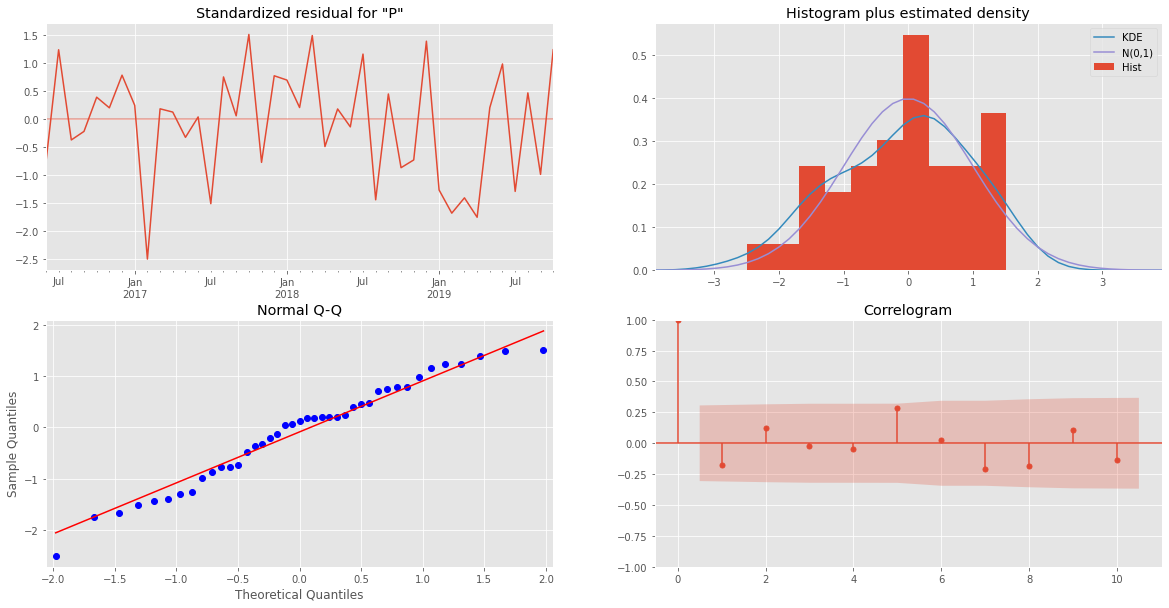

In [16]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')
results.plot_diagnostics()
plt.show()

In [17]:

pred0 = results.get_prediction(start='2019-01-01', dynamic=False)
pred0_ci = pred0.conf_int()
print(pred0_ci)

            lower Passengers  upper Passengers
2019-01-01      1.225613e+07      1.345265e+07
2019-02-01      1.123501e+07      1.243153e+07
2019-03-01      1.138777e+07      1.258429e+07
2019-04-01      1.090309e+07      1.209960e+07
2019-05-01      1.149352e+07      1.268292e+07
2019-06-01      1.109438e+07      1.228378e+07
2019-07-01      1.165996e+07      1.284936e+07
2019-08-01      1.101874e+07      1.220815e+07
2019-09-01      1.119183e+07      1.238123e+07
2019-10-01      1.130813e+07      1.249753e+07


In [18]:
pred1 = results.get_prediction(start='2019-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

In [19]:
pred2 = results.get_forecast('2021-12-01')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2019-09-01':'2020-12-01'])

2019-11-01    1.212995e+07
2019-12-01    1.300458e+07
2020-01-01    1.286802e+07
2020-02-01    1.196983e+07
2020-03-01    1.222495e+07
2020-04-01    1.174905e+07
2020-05-01    1.314557e+07
2020-06-01    1.292439e+07
2020-07-01    1.292208e+07
2020-08-01    1.278998e+07
2020-09-01    1.256704e+07
2020-10-01    1.321815e+07
2020-11-01    1.313674e+07
2020-12-01    1.391665e+07
Freq: MS, Name: predicted_mean, dtype: float64


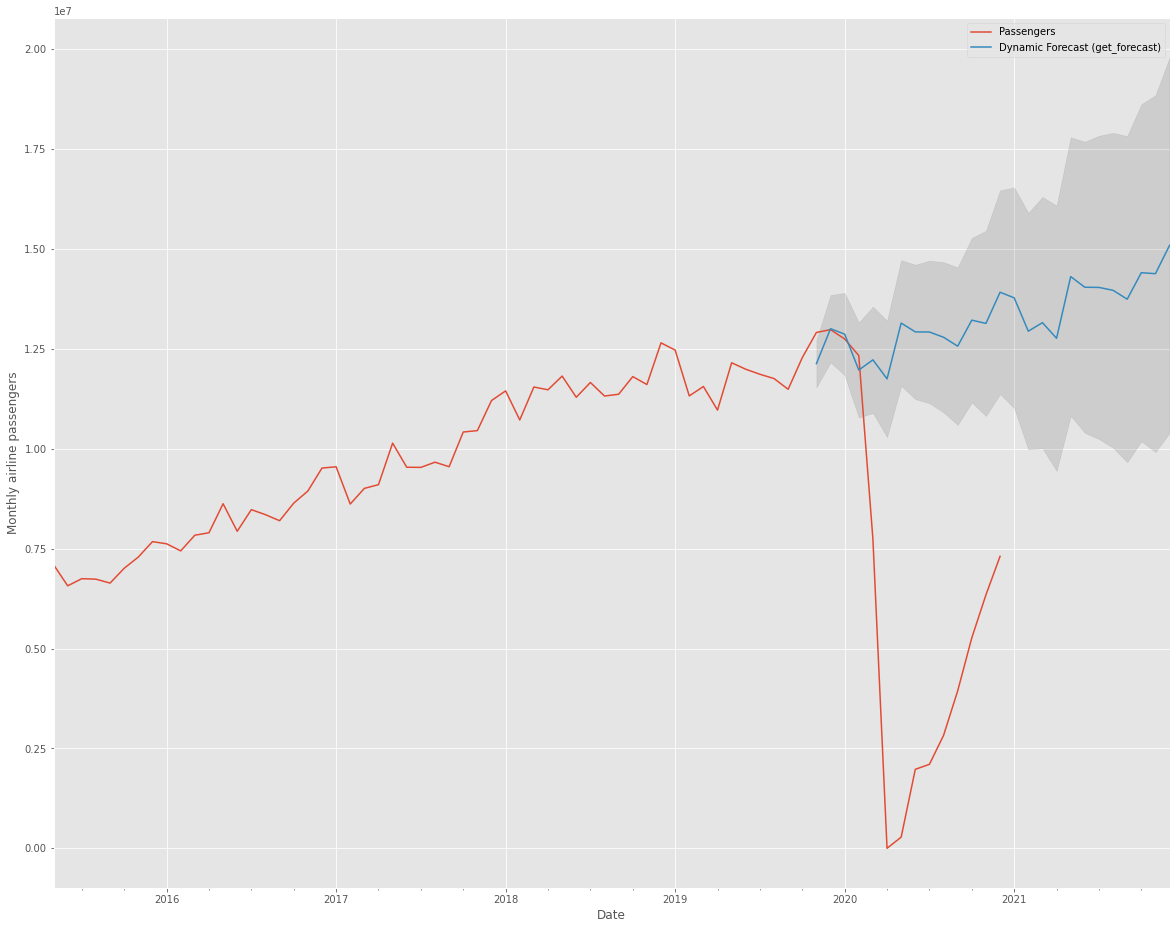

In [20]:
ax = data.plot(figsize=(20, 16))
#pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
#pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers')
plt.xlabel('Date')
plt.legend()
plt.show()

In [21]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

df = geopandas.read_file("shapefile/india_states.shp")


In [22]:
print(df)

               ST_NM  ST_ID  ID  \
0    Jammu & Kashmir  IN-JK  JK   
1            Gujarat  IN-GJ  GJ   
2            Gujarat  IN-GJ  GJ   
3            Gujarat  IN-GJ  GJ   
4            Gujarat  IN-GJ  GJ   
..               ...    ...  ..   
266           Odisha  IN-OR  OR   
267        Jharkhand  IN-JH  JH   
268     NCT of Delhi  IN-DL  DL   
269        Telangana  IN-TG  TG   
270       Puducherry  IN-PY  PY   

                                              geometry  
0    MULTIPOLYGON (((75.88864 32.57603, 75.84635 32...  
1    POLYGON ((72.67653 21.15570, 72.70319 21.14625...  
2    POLYGON ((72.35319 21.61347, 72.36291 21.60069...  
3    POLYGON ((72.72264 21.66597, 72.74597 21.65875...  
4    POLYGON ((72.27431 21.74958, 72.28264 21.73458...  
..                                                 ...  
266  POLYGON ((87.49020 21.60265, 87.47440 21.59988...  
267  POLYGON ((83.50607 24.52589, 83.55031 24.52505...  
268  POLYGON ((77.34765 28.50346, 77.31673 28.48519...  
269  POLY

colors = ['#fafa6e','#72cf85', '#00ffff','#00968e', '#1b6474','#9966ff','#ff66cc','#993366',
          '#ff5050','#ff3300','#cc3300','#993300','#800000',]


for i in range(len(lbls)):
    print(i)
    df.boundary.plot()

    #cmap = ListedColormap(['#fafa6e', '#e1f470','#c9ee73', '#b2e777', '#9cdf7c', '#86d780', '#72cf85', '#5ec688', '#4abd8c', '#37b38e',
    #     '#23aa8f', '#0ba08f', '#00968e', '#008c8b', '#008288', '#007882', '#106e7c', '#1b6474', '#225b6c', '#275162',
    #     '#2a4858'])
    cmap = ListedColormap(colors)
    
#     edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
#     nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
#         edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)

    try:
        edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
        nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
            edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)
    except:
        print("HAHAHA")
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red")
    
    

#     figure.set_size_inches(100, 100)
    
    
    sm11 = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min_weight, vmax=max_weight))
    sm11._A = []
    cb = plt.colorbar(sm11)
    cb.ax.tick_params(labelsize=15) 
    cb.set_label(label='Number of Passengers',weight='bold',size = 20)


    plt.title("Airport Network Of India from "+ lbls2[i] + " for "+ str(monthstogether)+ " months")
    
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    
    plt.savefig('Output_Files/matplotlib/map/'+lbls[i])
    #plt.savefig(lbls[i])
 
    #plt.show()
    plt.clf()
    plt.close()


## Network Visualization

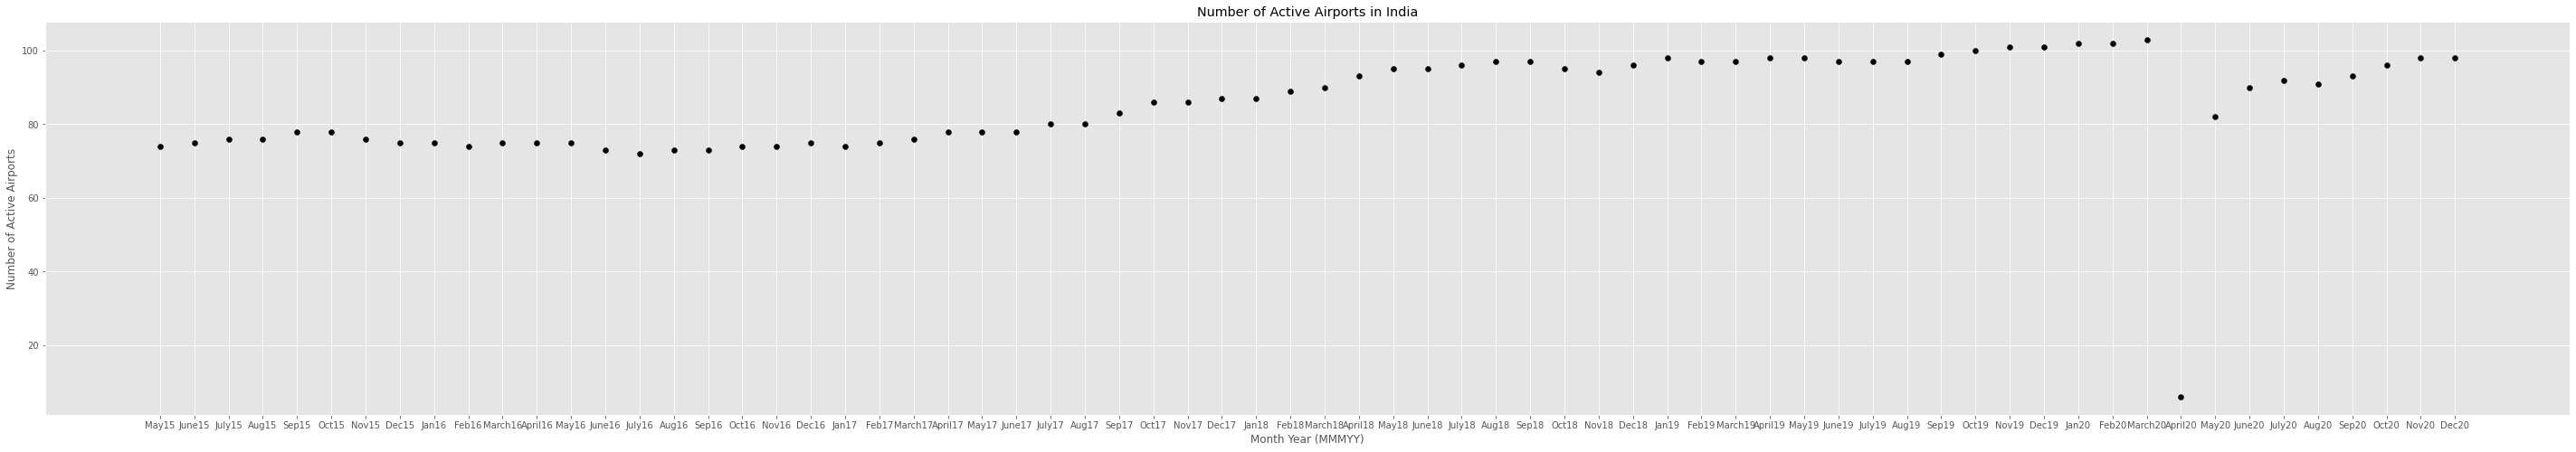

In [23]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
plt.scatter(lbls1, nodes, color="black", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
# plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

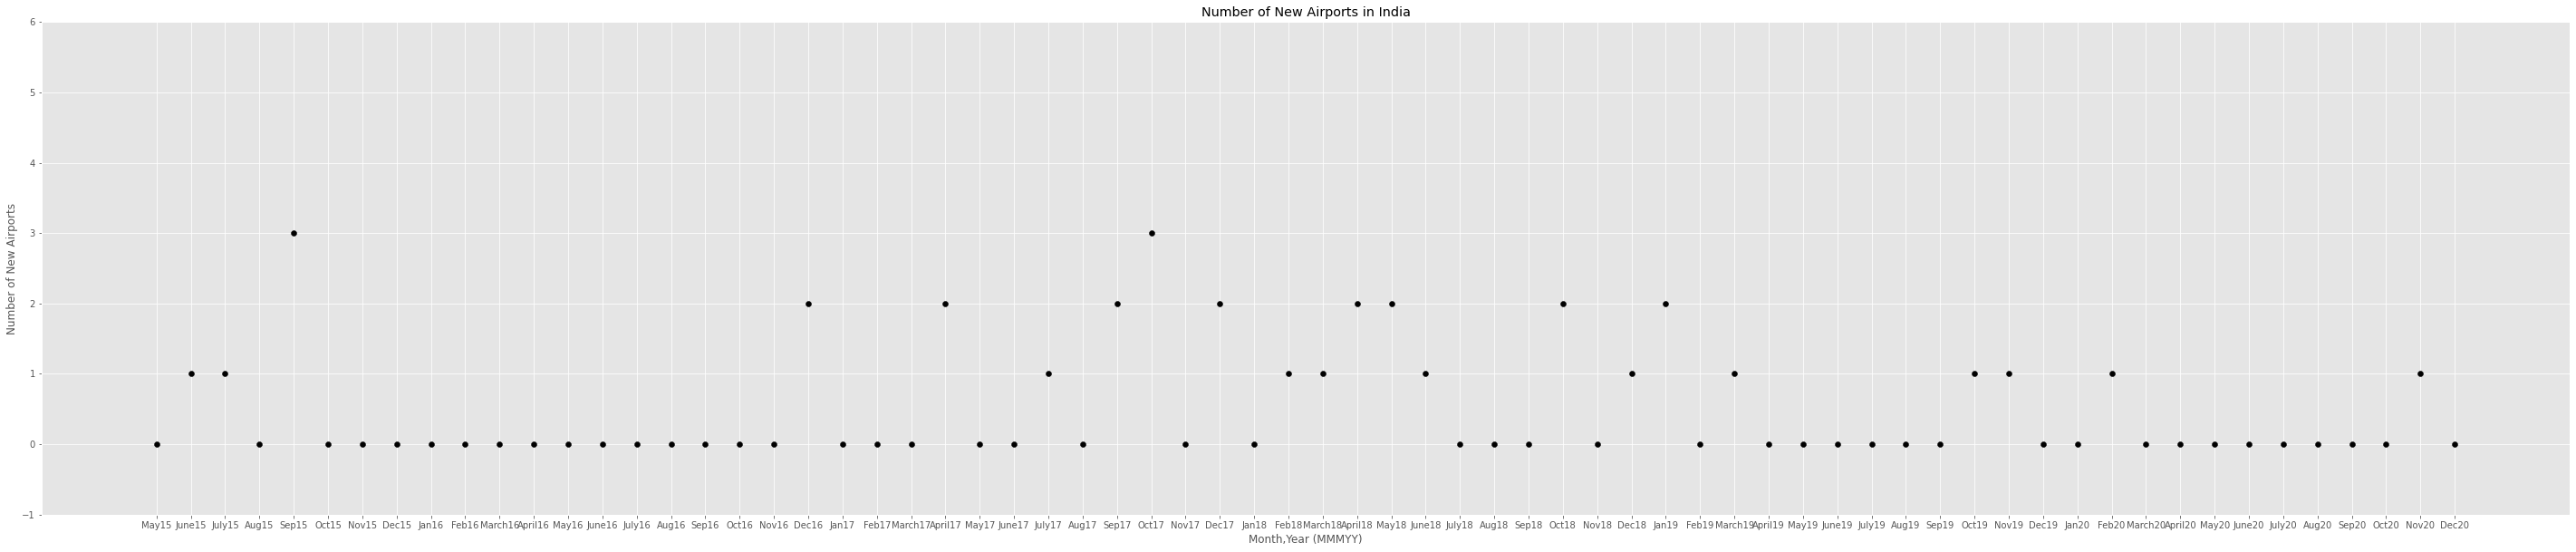

In [24]:
nnodes = []
airpor = {}
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0

plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
# plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()
plt.clf()
plt.close()


In [25]:
nodes1 = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nodes1.append(len(airpor))


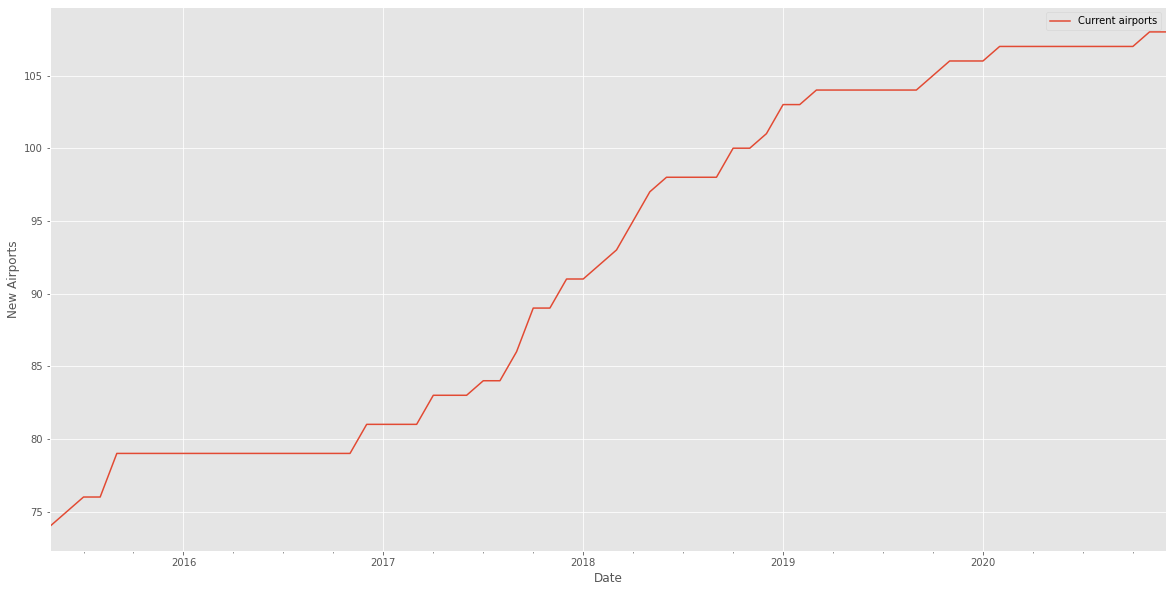

In [26]:
data = {"Month":lbls2,"Current airports":nodes1}
data = pd.DataFrame.from_dict(data)
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m-%d')
data.set_index(['Month'], inplace=True)
data.plot()
plt.ylabel('New Airports')
plt.xlabel('Date')
plt.show()


In [27]:
train_data = data['2015-05-01':'2019-10-01']
test_data = data['2019-10-01':]
print(train_data)

            Current airports
Month                       
2015-05-01                74
2015-06-01                75
2015-07-01                76
2015-08-01                76
2015-09-01                79
2015-10-01                79
2015-11-01                79
2015-12-01                79
2016-01-01                79
2016-02-01                79
2016-03-01                79
2016-04-01                79
2016-05-01                79
2016-06-01                79
2016-07-01                79
2016-08-01                79
2016-09-01                79
2016-10-01                79
2016-11-01                79
2016-12-01                81
2017-01-01                81
2017-02-01                81
2017-03-01                81
2017-04-01                83
2017-05-01                83
2017-06-01                83
2017-07-01                84
2017-08-01                84
2017-09-01                86
2017-10-01                89
2017-11-01                89
2017-12-01                91
2018-01-01    

In [28]:
warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []
print(len(pdq))
print(len(seasonal_pdq))
countt = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print(countt)
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            AIC.append(results.aic)
            countt+= 1
            SARIMAX_model.append([param, param_seasonal])
        except:
            traceback.print_exc()
            continue


16
16
0
SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:640.2041088575721
1
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:598.1923468142738
2
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:300.68562742652625
3
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:1882.3666937806604
4
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:445.02452496831904
5
SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:426.1391447478822
6
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:279.8410544614571
7
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:281.4350594498352
8
SARIMAX(0, 0, 0)x(2, 0, 0, 12) - AIC:425.410734166671
9
SARIMAX(0, 0, 0)x(2, 0, 1, 12) - AIC:426.3796893294734
10
SARIMAX(0, 0, 0)x(2, 1, 0, 12) - AIC:281.34813943425166
11
SARIMAX(0, 0, 0)x(2, 1, 1, 12) - AIC:281.94412397912237
12
SARIMAX(0, 0, 0)x(3, 0, 0, 12) - AIC:426.1285614559747
13
SARIMAX(0, 0, 0)x(3, 0, 1, 12) - AIC:428.49444569344087
14
SARIMAX(0, 0, 0)x(3, 1, 0, 12) - AIC:279.1450615533922
15
SARIMAX(0, 0, 0)x(3, 1, 1, 12) - AIC:281.14509166025005
16
SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:572.4719585159497
17
SARIMAX(0

140
SARIMAX(2, 0, 0)x(3, 0, 0, 12) - AIC:169.0769498590197
141
SARIMAX(2, 0, 0)x(3, 0, 1, 12) - AIC:171.51684327415725
142
SARIMAX(2, 0, 0)x(3, 1, 0, 12) - AIC:140.47603710886395
143
SARIMAX(2, 0, 0)x(3, 1, 1, 12) - AIC:142.38868001952483
144
SARIMAX(2, 0, 1)x(0, 0, 0, 12) - AIC:170.59802222598208
145
SARIMAX(2, 0, 1)x(0, 0, 1, 12) - AIC:221.7112125142734
146
SARIMAX(2, 0, 1)x(0, 1, 0, 12) - AIC:144.19059294340488
147
SARIMAX(2, 0, 1)x(0, 1, 1, 12) - AIC:1761.8623042572642
148
SARIMAX(2, 0, 1)x(1, 0, 0, 12) - AIC:167.67919346976356
149
SARIMAX(2, 0, 1)x(1, 0, 1, 12) - AIC:173.8978656169612
150
SARIMAX(2, 0, 1)x(1, 1, 0, 12) - AIC:143.10490473132685
151
SARIMAX(2, 0, 1)x(1, 1, 1, 12) - AIC:142.21576713147826
152
SARIMAX(2, 0, 1)x(2, 0, 0, 12) - AIC:169.15678321193798
153
SARIMAX(2, 0, 1)x(2, 0, 1, 12) - AIC:171.98267775433447
154
SARIMAX(2, 0, 1)x(2, 1, 0, 12) - AIC:140.88337895216324
155
SARIMAX(2, 0, 1)x(2, 1, 1, 12) - AIC:142.63301293997833
156
SARIMAX(2, 0, 1)x(3, 0, 0, 12) - AIC:17

In [29]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

The smallest AIC is 128.11263348891885 for model SARIMAX(0, 1, 0)x(2, 1, 0, 12)


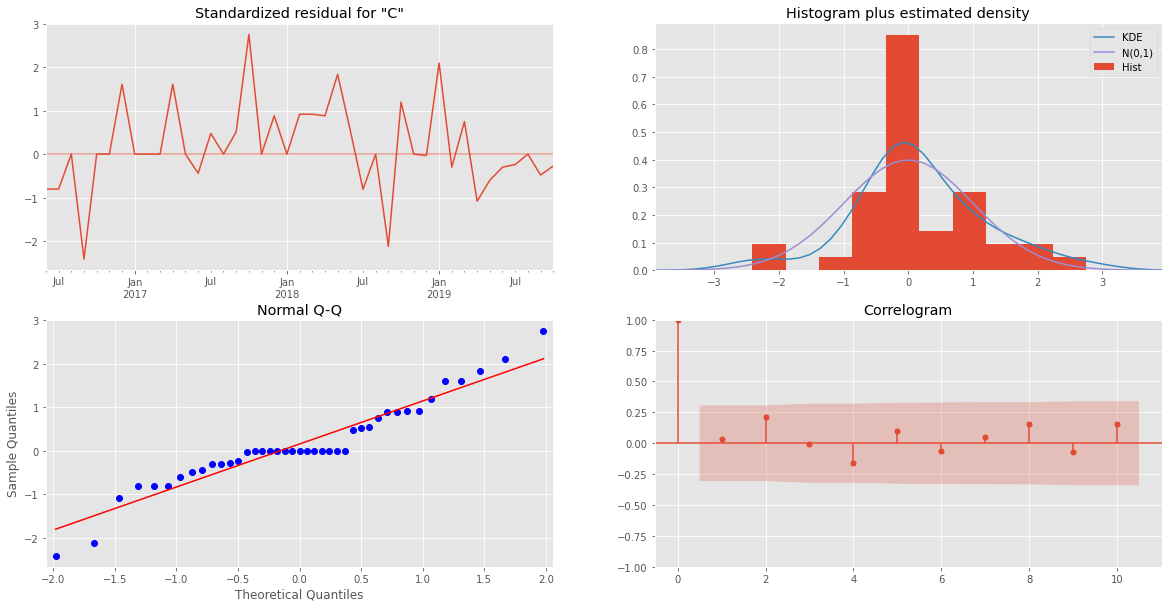

In [30]:
results.plot_diagnostics()
plt.show()


In [31]:


pred0 = results.get_prediction(start='2019-01-01', dynamic=False)
pred0_ci = pred0.conf_int()
print(pred0_ci)

pred1 = results.get_prediction(start='2019-01-01', dynamic=True)
pred1_ci = pred1.conf_int()
print(pred1_ci)

pred2 = results.get_forecast('2022-12-01')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2019-09-01':'2020-12-01'])

            lower Current airports  upper Current airports
2019-01-01               99.128813              102.871187
2019-02-01              101.415350              105.157724
2019-03-01              101.415350              105.157724
2019-04-01              103.160770              106.903144
2019-05-01              102.701888              106.444262
2019-06-01              102.415350              106.157724
2019-07-01              102.358254              106.100628
2019-08-01              102.128813              105.871187
2019-09-01              102.587695              106.330069
2019-10-01              103.390211              107.132586
            lower Current airports  upper Current airports
2019-01-01               99.128813              102.871187
2019-02-01               98.640279              103.932796
2019-03-01               98.332084              104.814066
2019-04-01               98.862658              106.347406
2019-05-01               98.994006              107.3622

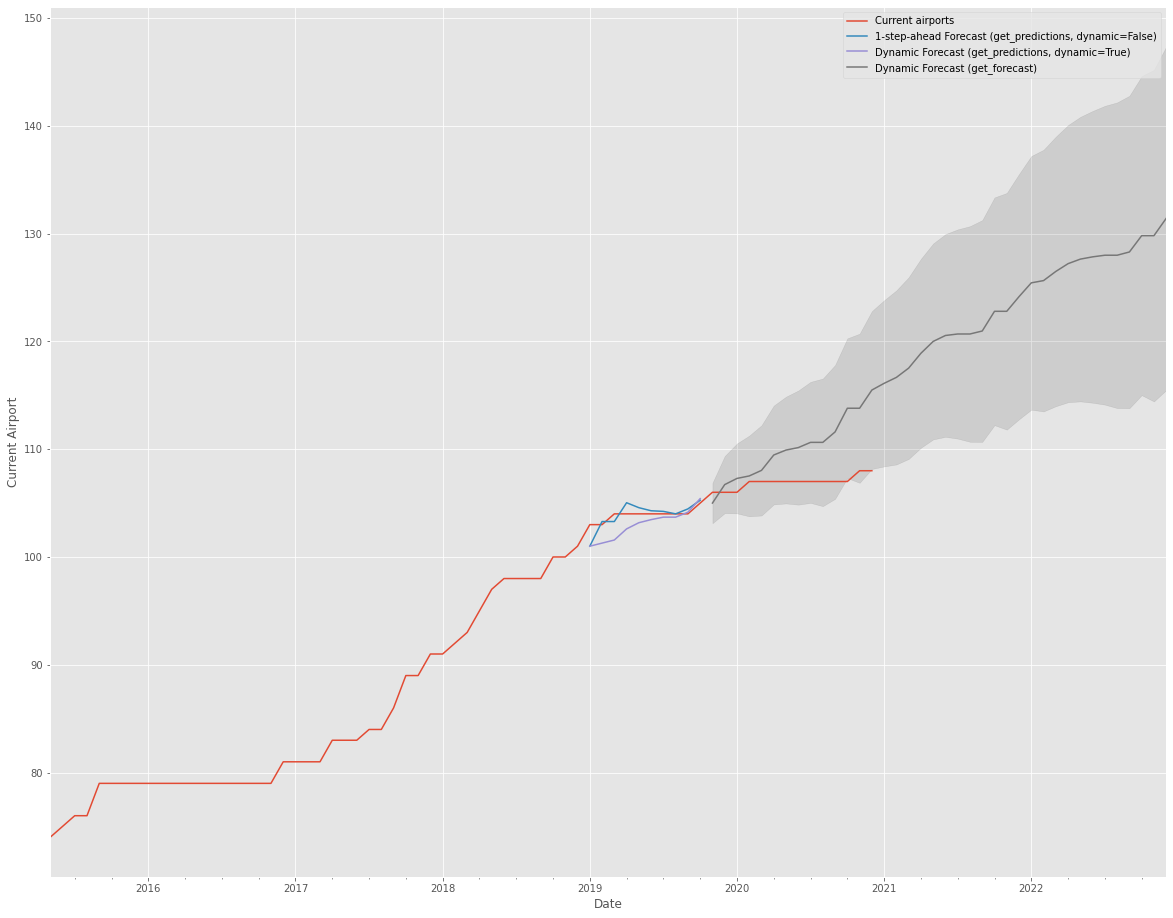

In [32]:
ax = data.plot(figsize=(20, 16))
#pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
#pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Current Airport')
plt.xlabel('Date')
plt.legend()
plt.show()

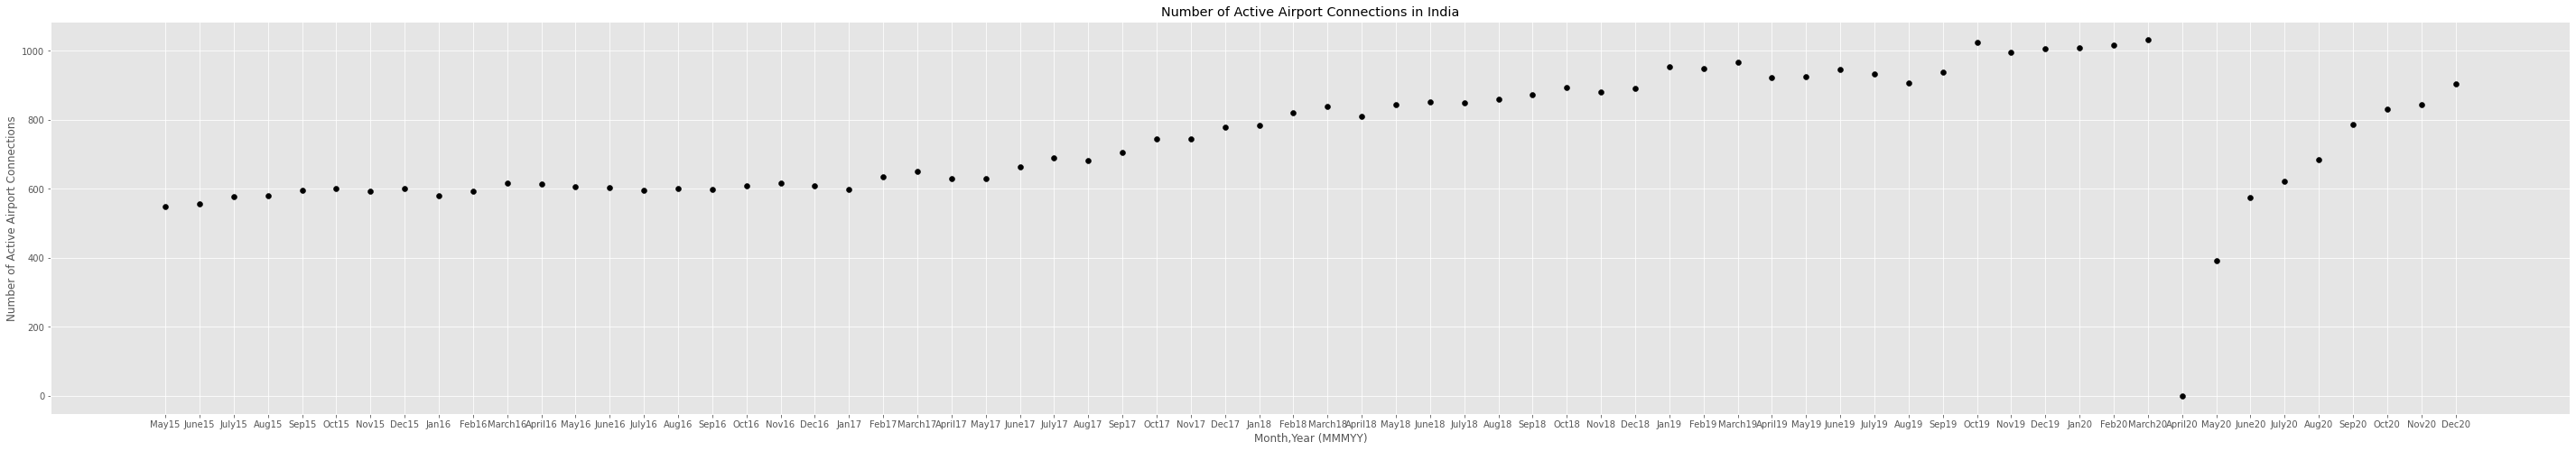

In [33]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.scatter(lbls1, edges, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
# plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()
plt.clf()
plt.close()

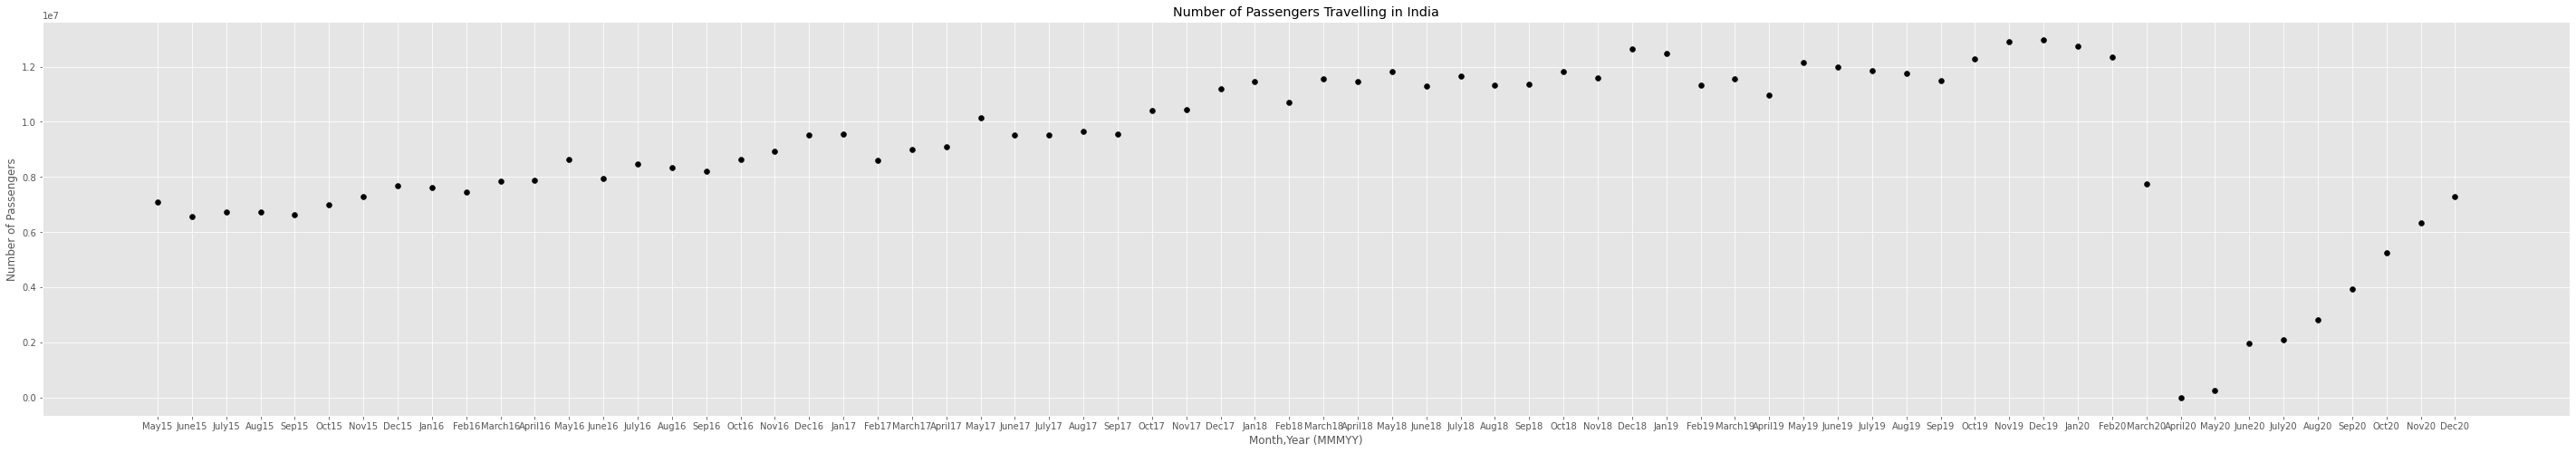

In [34]:
plt.scatter(lbls1, passengers, color="black",  marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
# plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()
plt.clf()
plt.close()

excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [35]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness[:10])):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))


May15
Top 10 nodes
DELHI -> 0.35088642067808723
MUMBAI -> 0.2462499554394531
KOLKATA -> 0.14229527765486671
BENGALURU -> 0.12847787254179963
CHENNAI -> 0.09071295217128547
GUWAHATI -> 0.06162531447919573
HYDERABAD -> 0.04865761880602063
KOCHI -> 0.0279885766187136
SILCHAR -> 0.0273972602739726
AHMEDABAD -> 0.00892063262925135
June15
Top 10 nodes
DELHI -> 0.347284328962411
MUMBAI -> 0.240014704227033
BENGALURU -> 0.15818270955257266
KOLKATA -> 0.13654468757208485
CHENNAI -> 0.08676250833785078
GUWAHATI -> 0.06227147168927988
HYDERABAD -> 0.04598120625517885
KOCHI -> 0.02760236184893719
SILCHAR -> 0.02702702702702703
AHMEDABAD -> 0.008529895687429935
July15
Top 10 nodes
DELHI -> 0.33858513183513167
MUMBAI -> 0.22533362558362557
BENGALURU -> 0.16823499273499282
KOLKATA -> 0.13308620958620956
CHENNAI -> 0.08914823564823564
GUWAHATI -> 0.061061578061578047
HYDERABAD -> 0.04735814210814211
KOCHI -> 0.028210214210214208
SILCHAR -> 0.02666666666666667
VARANASI -> 0.018153796653796652
Aug15
Top

Top 10 nodes
DELHI -> 0.3871718305173114
MUMBAI -> 0.21212088917355543
HYDERABAD -> 0.09928983148024903
BENGALURU -> 0.09359646352887668
KOLKATA -> 0.08833809465360526
CHENNAI -> 0.07064204298045013
GUWAHATI -> 0.0643804467197846
KOCHI -> 0.02640051097794954
INDORE -> 0.014148534937239901
KHAJURAHO -> 0.012658227848101266
Aug17
Top 10 nodes
DELHI -> 0.3697375078797266
MUMBAI -> 0.21348019672200608
HYDERABAD -> 0.12218419387071655
BENGALURU -> 0.09682385142642033
KOLKATA -> 0.09048686707379924
CHENNAI -> 0.07130890244721222
GUWAHATI -> 0.0632748580533391
KOCHI -> 0.026196109191269273
INDORE -> 0.014212364054136204
KHAJURAHO -> 0.012658227848101266
Sep17
Top 10 nodes
DELHI -> 0.3881526211365036
MUMBAI -> 0.2008639387258699
HYDERABAD -> 0.11703813475493695
BENGALURU -> 0.09193585468962266
KOLKATA -> 0.0904179609137295
CHENNAI -> 0.09005681034813828
GUWAHATI -> 0.061537629947985124
KOCHI -> 0.025339475757271593
KHAJURAHO -> 0.012195121951219513
VARANASI -> 0.00714978754725819
Oct17
Top 10 

Top 10 nodes
DELHI -> 0.3004775012986095
MUMBAI -> 0.18929624412259105
BENGALURU -> 0.12626545663891467
KOLKATA -> 0.12230759410048259
HYDERABAD -> 0.1082019677469551
CHENNAI -> 0.06773797987265164
AHMEDABAD -> 0.041482085114725
GUWAHATI -> 0.024971958102566034
DEHRA DUN -> 0.02337535268751846
JAIPUR -> 0.023120821986997518
Dec19
Top 10 nodes
DELHI -> 0.29510150045322
MUMBAI -> 0.18616953327197938
BENGALURU -> 0.1269805307370882
KOLKATA -> 0.11702156327469851
HYDERABAD -> 0.10889042522381517
CHENNAI -> 0.06839940235293383
AHMEDABAD -> 0.04854809431376554
GUWAHATI -> 0.03043069431189349
JAIPUR -> 0.025278222821463976
DEHRA DUN -> 0.023356598806004627
Jan20
Top 10 nodes
DELHI -> 0.29760778777877034
MUMBAI -> 0.16986625176670753
BENGALURU -> 0.12167532491877861
HYDERABAD -> 0.10899352729986823
KOLKATA -> 0.09063959353321241
AHMEDABAD -> 0.0829694873052305
CHENNAI -> 0.0747925616293193
GUWAHATI -> 0.05682827189373237
DEHRA DUN -> 0.022874612855597127
JAIPUR -> 0.022685307897305558
Feb20
To

April20
{'2015-05-01': -0.5272812206206408, '2015-06-01': -0.5317350274510821, '2015-07-01': -0.5262405813964763, '2015-08-01': -0.5232407383515173, '2015-09-01': -0.5391388879882294, '2015-10-01': -0.530320857947761, '2015-11-01': -0.5250046554724079, '2015-12-01': -0.542155646237497, '2016-01-01': -0.5355748467872927, '2016-02-01': -0.5226373743711222, '2016-03-01': -0.5182753523143475, '2016-04-01': -0.5060782208907406, '2016-05-01': -0.5097836588533133, '2016-06-01': -0.5103966118593447, '2016-07-01': -0.503893103170128, '2016-08-01': -0.49817165061502455, '2016-09-01': -0.5077600885280485, '2016-10-01': -0.5122172164780205, '2016-11-01': -0.514010400807406, '2016-12-01': -0.5093456014534162, '2017-01-01': -0.5156092267895517, '2017-02-01': -0.4991351344789583, '2017-03-01': -0.48651574428441713, '2017-04-01': -0.505027584103946, '2017-05-01': -0.5157438533952854, '2017-06-01': -0.4863507139610477, '2017-07-01': -0.4722133120081105, '2017-08-01': -0.4813950741504404, '2017-09-01': 

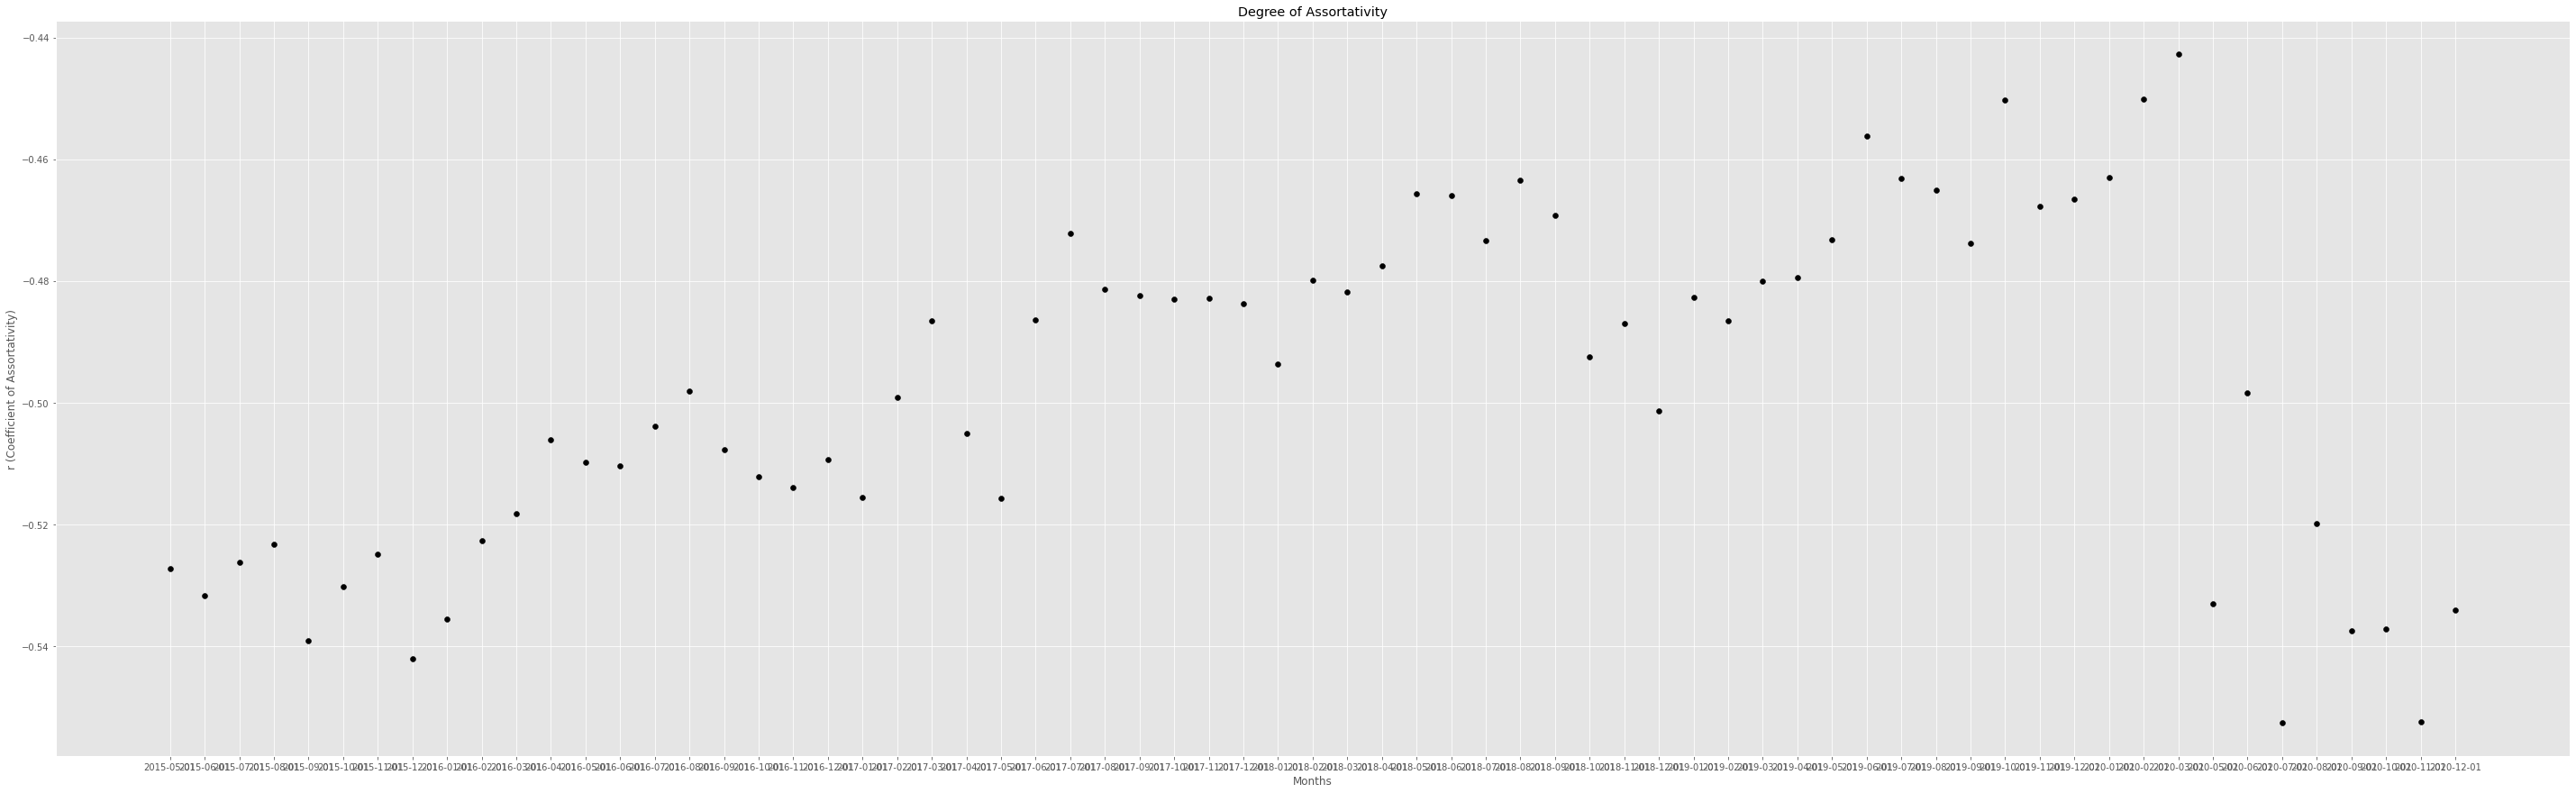

In [36]:
assortativity = {}
for i in range(len(graphs)):
    G = graphs[i]
    try:
        pearson = nx.degree_pearson_correlation_coefficient(G)
        assortativity[lbls2[i]] = pearson
    except:
        print(lbls1[i])
print(assortativity)

plt.figure(figsize = (50, 15)) 
# plt.bar(range(len(assortativity)), list(assortativity.values()), align='center')
plt.scatter(range(len(assortativity)), list(assortativity.values()), color="black",  marker="o")
plt.title("Degree of Assortativity")
plt.xlabel("Months")
plt.ylabel("r (Coefficient of Assortativity)")
plt.xticks(range(len(assortativity)), list(assortativity.keys()))
plt.savefig('Output_Files/matplotlib/Assortativity')
plt.show()

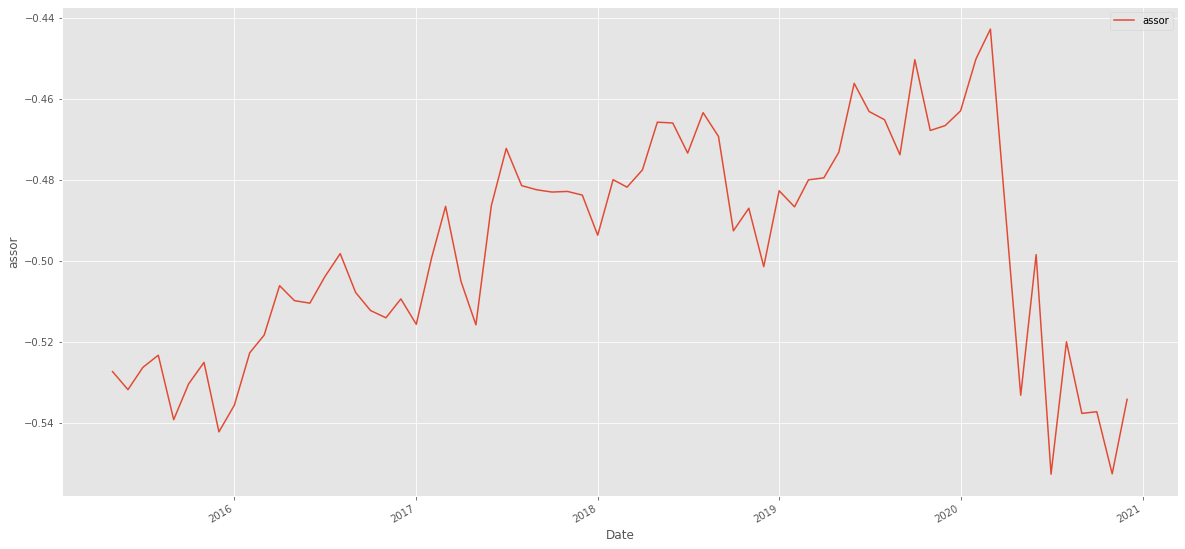

In [44]:
assortativit = { "Month": [i for i in assortativity ] ,"assor": [i for i in assortativity.values() ] }

data = pd.DataFrame.from_dict(assortativit)
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m-%d')
data.set_index(['Month'], inplace=True)
data.plot()
plt.ylabel('assor')
plt.xlabel('Date')
plt.show()

In [45]:
train_data = data['2015-05-01':'2019-10-01']
test_data = data['2019-10-01':]
print(train_data)

               assor
Month               
2015-05-01 -0.527281
2015-06-01 -0.531735
2015-07-01 -0.526241
2015-08-01 -0.523241
2015-09-01 -0.539139
2015-10-01 -0.530321
2015-11-01 -0.525005
2015-12-01 -0.542156
2016-01-01 -0.535575
2016-02-01 -0.522637
2016-03-01 -0.518275
2016-04-01 -0.506078
2016-05-01 -0.509784
2016-06-01 -0.510397
2016-07-01 -0.503893
2016-08-01 -0.498172
2016-09-01 -0.507760
2016-10-01 -0.512217
2016-11-01 -0.514010
2016-12-01 -0.509346
2017-01-01 -0.515609
2017-02-01 -0.499135
2017-03-01 -0.486516
2017-04-01 -0.505028
2017-05-01 -0.515744
2017-06-01 -0.486351
2017-07-01 -0.472213
2017-08-01 -0.481395
2017-09-01 -0.482442
2017-10-01 -0.482985
2017-11-01 -0.482829
2017-12-01 -0.483734
2018-01-01 -0.493637
2018-02-01 -0.479934
2018-03-01 -0.481776
2018-04-01 -0.477520
2018-05-01 -0.465741
2018-06-01 -0.465943
2018-07-01 -0.473368
2018-08-01 -0.463395
2018-09-01 -0.469262
2018-10-01 -0.492554
2018-11-01 -0.486975
2018-12-01 -0.501386
2019-01-01 -0.482666
2019-02-01 -0

In [46]:
warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []
print(len(pdq))
print(len(seasonal_pdq))
countt = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print(countt)
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            AIC.append(results.aic)
            countt+= 1
            SARIMAX_model.append([param, param_seasonal])
        except:
            traceback.print_exc()
            continue

16
16
0
SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:79.49641454065478
1
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:81.90025059487486
2
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:-202.06594240490136
3
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:1814.7939124872714
4
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:-182.57415439467763
5
SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:-182.59069800841957
6
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:-202.9709618280859
7
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:1698.645845061834
8
SARIMAX(0, 0, 0)x(2, 0, 0, 12) - AIC:-183.3112623986537
9
SARIMAX(0, 0, 0)x(2, 0, 1, 12) - AIC:-178.77345822233298
10
SARIMAX(0, 0, 0)x(2, 1, 0, 12) - AIC:-203.36144902211095
11
SARIMAX(0, 0, 0)x(2, 1, 1, 12) - AIC:-201.3247878231977
12
SARIMAX(0, 0, 0)x(3, 0, 0, 12) - AIC:-183.33020144585743
13
SARIMAX(0, 0, 0)x(3, 0, 1, 12) - AIC:-181.2736695354646
14
SARIMAX(0, 0, 0)x(3, 1, 0, 12) - AIC:-201.36757651453092
15
SARIMAX(0, 0, 0)x(3, 1, 1, 12) - AIC:-199.36766164207032
16
SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:11.705132482292

Traceback (most recent call last):
  File "<ipython-input-46-07e332946400>", line 17, in <module>
    results = mod.fit()
  File "/home/ritik/.local/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 695, in fit
    skip_hessian=True, **kwargs)
  File "/home/ritik/.local/lib/python3.7/site-packages/statsmodels/base/model.py", line 527, in fit
    full_output=full_output)
  File "/home/ritik/.local/lib/python3.7/site-packages/statsmodels/base/optimizer.py", line 227, in _fit
    hess=hessian)
  File "/home/ritik/.local/lib/python3.7/site-packages/statsmodels/base/optimizer.py", line 632, in _fit_lbfgs
    **extra_kwargs)
  File "/home/ritik/.local/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py", line 198, in fmin_l_bfgs_b
    **opts)
  File "/home/ritik/.local/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py", line 360, in _minimize_lbfgsb
    f, g = func_and_grad(x)
  File "/home/ritik/.local/lib/python3.7/site-packages/scipy/optimize/_differentiable_fu

28
SARIMAX(0, 0, 1)x(3, 0, 1, 12) - AIC:-208.02796535762442
29
SARIMAX(0, 0, 1)x(3, 1, 0, 12) - AIC:-215.71653758398324
30
SARIMAX(0, 0, 1)x(3, 1, 1, 12) - AIC:-213.70073773090942
31
SARIMAX(0, 1, 0)x(0, 0, 0, 12) - AIC:-327.1934666416646
32
SARIMAX(0, 1, 0)x(0, 0, 1, 12) - AIC:-325.7424140862113
33
SARIMAX(0, 1, 0)x(0, 1, 0, 12) - AIC:-219.17008634601635
34
SARIMAX(0, 1, 0)x(0, 1, 1, 12) - AIC:1563.0196725672374
35
SARIMAX(0, 1, 0)x(1, 0, 0, 12) - AIC:-325.8351412436659
36
SARIMAX(0, 1, 0)x(1, 0, 1, 12) - AIC:-324.0065075556297
37
SARIMAX(0, 1, 0)x(1, 1, 0, 12) - AIC:-229.08653029429445
38
SARIMAX(0, 1, 0)x(1, 1, 1, 12) - AIC:-232.46506305673188
39
SARIMAX(0, 1, 0)x(2, 0, 0, 12) - AIC:-324.11885394680286
40
SARIMAX(0, 1, 0)x(2, 0, 1, 12) - AIC:-322.2073110637187
41
SARIMAX(0, 1, 0)x(2, 1, 0, 12) - AIC:-231.21469626875552
42
SARIMAX(0, 1, 0)x(2, 1, 1, 12) - AIC:-230.7741460104873
43
SARIMAX(0, 1, 0)x(3, 0, 0, 12) - AIC:-322.382321300768
44
SARIMAX(0, 1, 0)x(3, 0, 1, 12) - AIC:-320.4934

165
SARIMAX(2, 1, 0)x(1, 1, 0, 12) - AIC:-235.32918822651078
166
SARIMAX(2, 1, 0)x(1, 1, 1, 12) - AIC:-235.80303457108315
167
SARIMAX(2, 1, 0)x(2, 0, 0, 12) - AIC:-325.92056699423034
168
SARIMAX(2, 1, 0)x(2, 0, 1, 12) - AIC:-324.0761057814029
169
SARIMAX(2, 1, 0)x(2, 1, 0, 12) - AIC:-237.24730469909863
170
SARIMAX(2, 1, 0)x(2, 1, 1, 12) - AIC:-237.30558384365114
171
SARIMAX(2, 1, 0)x(3, 0, 0, 12) - AIC:-324.8455330206042
172
SARIMAX(2, 1, 0)x(3, 0, 1, 12) - AIC:-323.0344362595751
173
SARIMAX(2, 1, 0)x(3, 1, 0, 12) - AIC:-238.02137833044074
174
SARIMAX(2, 1, 0)x(3, 1, 1, 12) - AIC:-236.10256390061508
175
SARIMAX(2, 1, 1)x(0, 0, 0, 12) - AIC:-327.2991412153595
176
SARIMAX(2, 1, 1)x(0, 0, 1, 12) - AIC:-325.3093813442511
177
SARIMAX(2, 1, 1)x(0, 1, 0, 12) - AIC:-228.5010780355531
178
SARIMAX(2, 1, 1)x(0, 1, 1, 12) - AIC:1874.4137745194073
179
SARIMAX(2, 1, 1)x(1, 0, 0, 12) - AIC:-325.31029689186124
180
SARIMAX(2, 1, 1)x(1, 0, 1, 12) - AIC:-323.31157048675533
181
SARIMAX(2, 1, 1)x(1, 1, 0, 

In [47]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

The smallest AIC is -329.25815037957636 for model SARIMAX(2, 1, 0)x(0, 0, 0, 12)


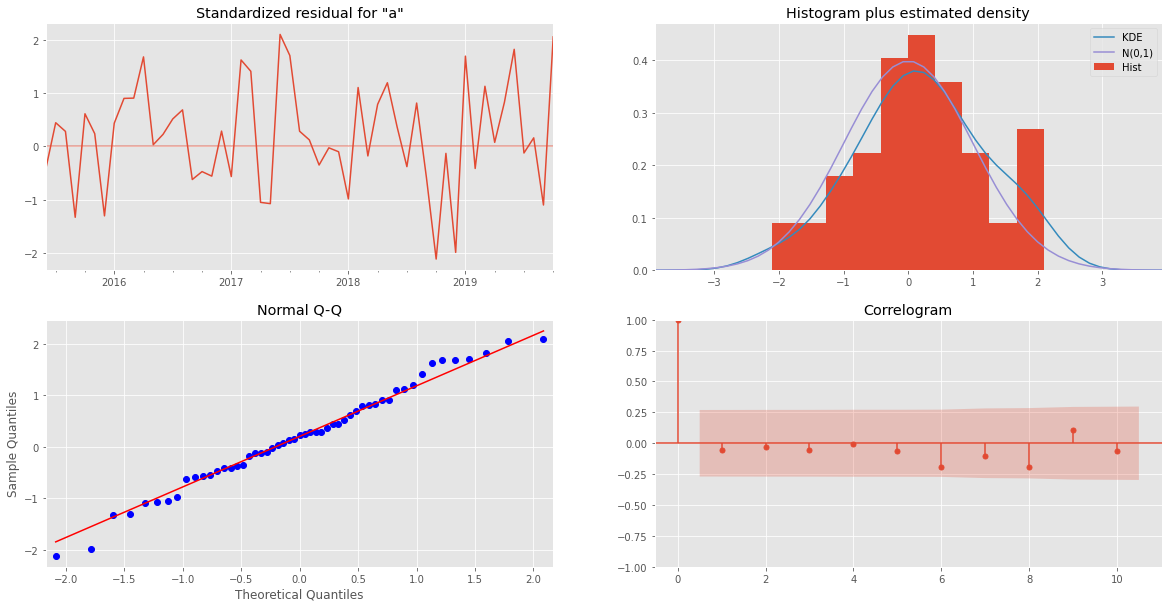

In [48]:
results.plot_diagnostics()
plt.show()


In [49]:

pred0 = results.get_prediction(start='2019-01-01', dynamic=False)
pred0_ci = pred0.conf_int()
print(pred0_ci)

pred1 = results.get_prediction(start='2019-01-01', dynamic=True)
pred1_ci = pred1.conf_int()
print(pred1_ci)

pred2 = results.get_forecast('2022-12-01')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2019-09-01':'2020-12-01'])

            lower assor  upper assor
2019-01-01    -0.519921    -0.479893
2019-02-01    -0.502420    -0.462392
2019-03-01    -0.511475    -0.471446
2019-04-01    -0.500250    -0.460222
2019-05-01    -0.501628    -0.461599
2019-06-01    -0.494728    -0.454700
2019-07-01    -0.481851    -0.441823
2019-08-01    -0.486771    -0.446743
2019-09-01    -0.482589    -0.442561
2019-10-01    -0.491277    -0.451249
            lower assor  upper assor
2019-01-01    -0.519921    -0.479893
2019-02-01    -0.521221    -0.470469
2019-03-01    -0.524646    -0.469736
2019-04-01    -0.528488    -0.467775
2019-05-01    -0.530929    -0.464098
2019-06-01    -0.533215    -0.461512
2019-07-01    -0.535685    -0.459484
2019-08-01    -0.537909    -0.457255
2019-09-01    -0.539939    -0.455091
2019-10-01    -0.541927    -0.453135
2019-11-01   -0.452870
2019-12-01   -0.459453
2020-01-01   -0.457229
2020-02-01   -0.455714
2020-03-01   -0.456726
2020-04-01   -0.456964
2020-05-01   -0.456603
2020-06-01   -0.456610
20

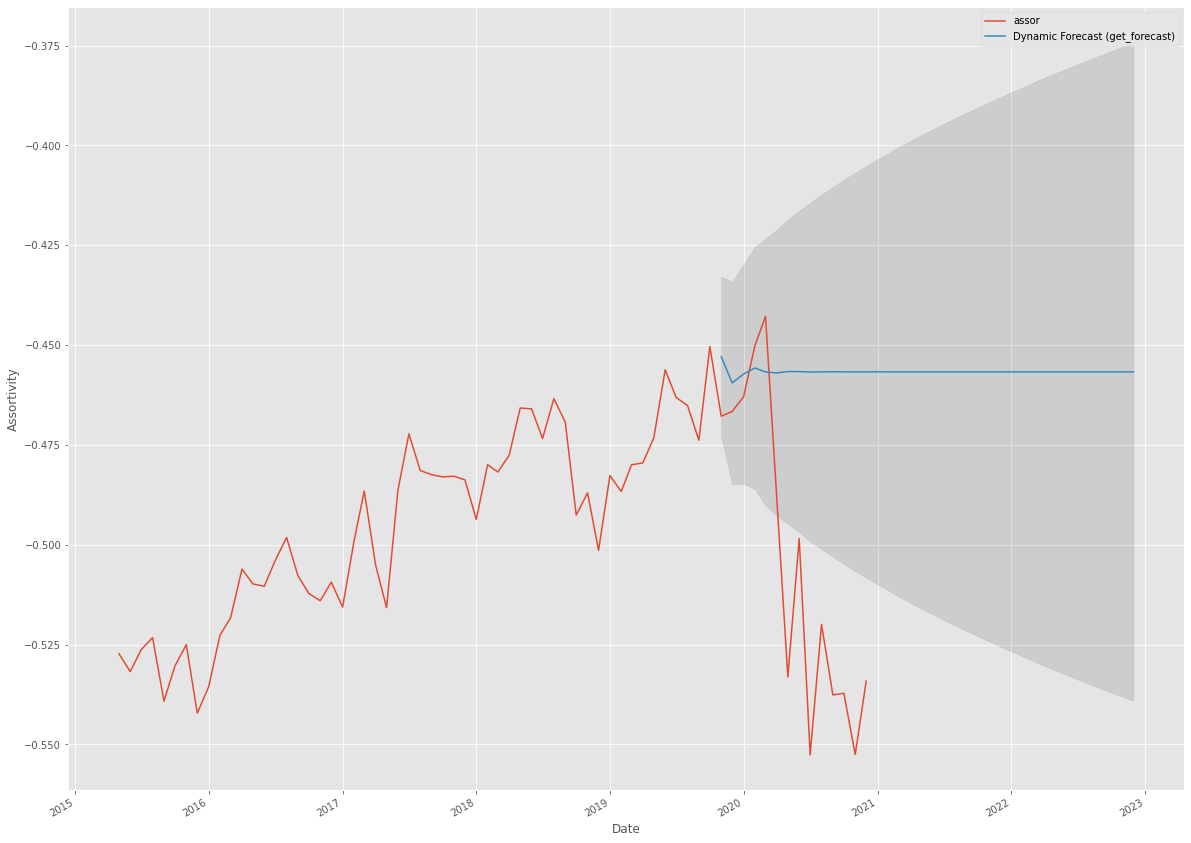

In [50]:
ax = data.plot(figsize=(20, 16))
#pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
#pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Assortivity')
plt.xlabel('Date')
plt.legend()
plt.show()

Degree Distribution

May15


Average clustering coefficient for May15 is 0.6498709231340716
June15


Average clustering coefficient for June15 is 0.6434613629926142
July15


Average clustering coefficient for July15 is 0.6136858940651846
Aug15


Average clustering coefficient for Aug15 is 0.6425104965289116
Sep15


Average clustering coefficient for Sep15 is 0.6937912813593201
Oct15


Average clustering coefficient for Oct15 is 0.6373241272214337
Nov15


Average clustering coefficient for Nov15 is 0.6046984457370973
Dec15


Average clustering coefficient for Dec15 is 0.6894202575685523
Jan16


Average clustering coefficient for Jan16 is 0.69369373832812
Feb16


Average clustering coefficient for Feb16 is 0.6966290773198501
March16


Average clustering coefficient for March16 is 0.6595565049614662
April16


Average clustering coefficient for April16 is 0.6321229251222374
May16


Average clustering coefficient for May16 is 0.6319548680423022
June16


Average clustering coefficient for June16 is 0.63632814176

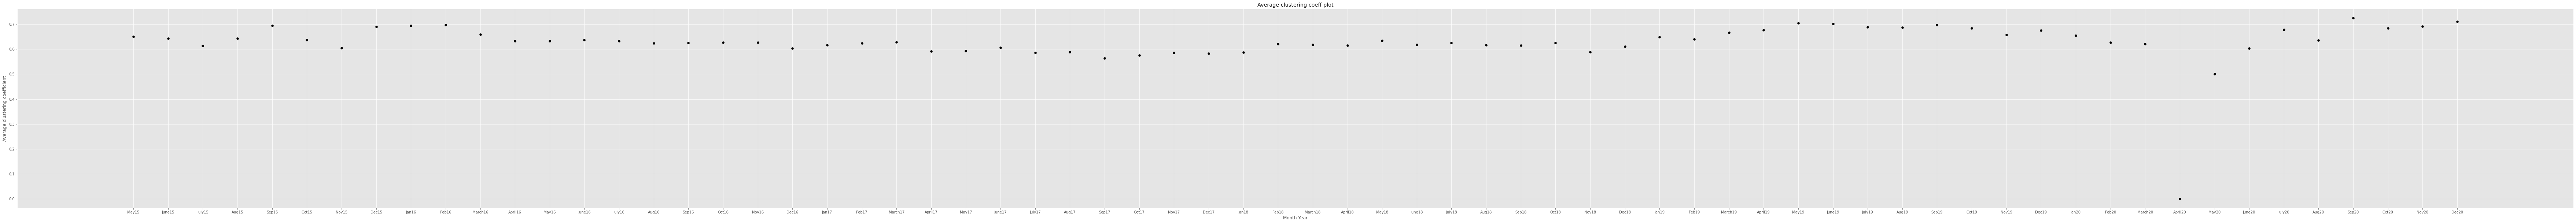

7176

In [37]:
avg_clust_coeff_list = []
def haha(gi):
    print(lbls1[gi])
    G = graphs[gi]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
   
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    
    plt.figure(figsize = (100, 10))
    plt.scatter([y[0] for y in sorted_degree], [y[1] for y in sorted_degree], color="black",  marker="o")
    plt.title("Degree sequence for " + lbls1[gi])
    plt.xticks([i for i in range(len(sorted_degree))],labels =[x[0][:10] for x in sorted_degree] )
    plt.grid(True)
    plt.savefig('Output_Files/matplotlib/Degree/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    print("\n")
    gc.collect()
    
    
    
    
    clust_coefficients = nx.clustering(G)
    sorted_clust_coefficients = dict(sorted(clust_coefficients.items(), key=itemgetter(1), reverse=True))
    
    
    plt.figure(figsize=(100, 10))
    plt.title("Clustering plot for " + lbls1[gi])
    plt.scatter(sorted_clust_coefficients.keys(), sorted_clust_coefficients.values(), color="black",  marker="o")
    plt.savefig('Output_Files/matplotlib/Clust_seq/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    avg_clust_coeff = sum(clust_coefficients.values()) / len(clust_coefficients)  
    avg_clust_coeff_list.append(avg_clust_coeff)
    
    
    
    plt.figure(figsize = (100, 10))
    plt.title("Degree distribution for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)    
    degree_counter = collections.Counter(degree_dict.values())
    degree_counter = dict(sorted(degree_counter.items(), key=itemgetter(0)))
    plt.scatter(degree_counter.keys(), degree_counter.values(), color="black",  marker="o")
#     for key in degree_counter.keys():
#         plt.plot(key, degree_counter[key], color="red",  marker="o")
    plt.xticks([t for t in range(max(degree_counter.keys())+1)])        
#     plt.show()
    plt.savefig('Output_Files/matplotlib/Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    cum_degree = {}
    for i in range(len(degree_counter)):
        cum_degree[list(degree_counter.keys())[i]]= sum(list(degree_counter.values())[i:])/sum(list(degree_counter.values()))
#     print(cum_degree)
   
    plt.figure()
    plt.title("Cumulative degree distribution for " + lbls1[gi])
    plt.xlabel("Degree(k)")
    plt.ylabel("P(>k)")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")    
    plt.scatter(cum_degree.keys(), cum_degree.values(), color="black",  marker="o")    
    plt.savefig('Output_Files/matplotlib/Cum_Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    
    plt.figure()
#     TODO: increase figsize
    plt.title("Clustering coeff vs Degree plot for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")

    for city in clust_coefficients.keys():
        plt.plot(degree_dict[city], clust_coefficients[city], color="black",  marker="o", markersize=0.5)

    plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[gi])
    plt.clf()
    plt.close()
    gc.collect()
    plt.close('all')     
    
    print("Average clustering coefficient for", lbls1[gi], "is", avg_clust_coeff)
    
    
for gi in range(len(graphs)):
    plt.ioff()
    haha(gi)
    gc.collect()

    
plt.figure(figsize = (125, 10))
plt.title("Average clustering coeff plot")
plt.xlabel("Month Year")
plt.ylabel("Average clustering coefficient")
# plt.grid(True)
plt.scatter(lbls1, avg_clust_coeff_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Average CLustering Coeff ')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



In [38]:
# # TODO: plots for in and out degree
# for G in graphs:
#     in_degree_freq = nx.degree_histogram(G)
#     out_degree_freq = nx.degree_histogram(G, out_degree=True)
#     degrees = range(len(in_degree_freq))
#     plt.figure(figsize=(12, 8)) 
#     plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
#     plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
#     plt.xlabel('Degree')
#     plt.ylabel('Frequency')
#     plt.show()
#     plt.close()
#     plt.clf()


{1: 548, 2: 3669, 3: 1107, 4: 78}
Characteristic Path length for 1505  is  2.1323583857830433


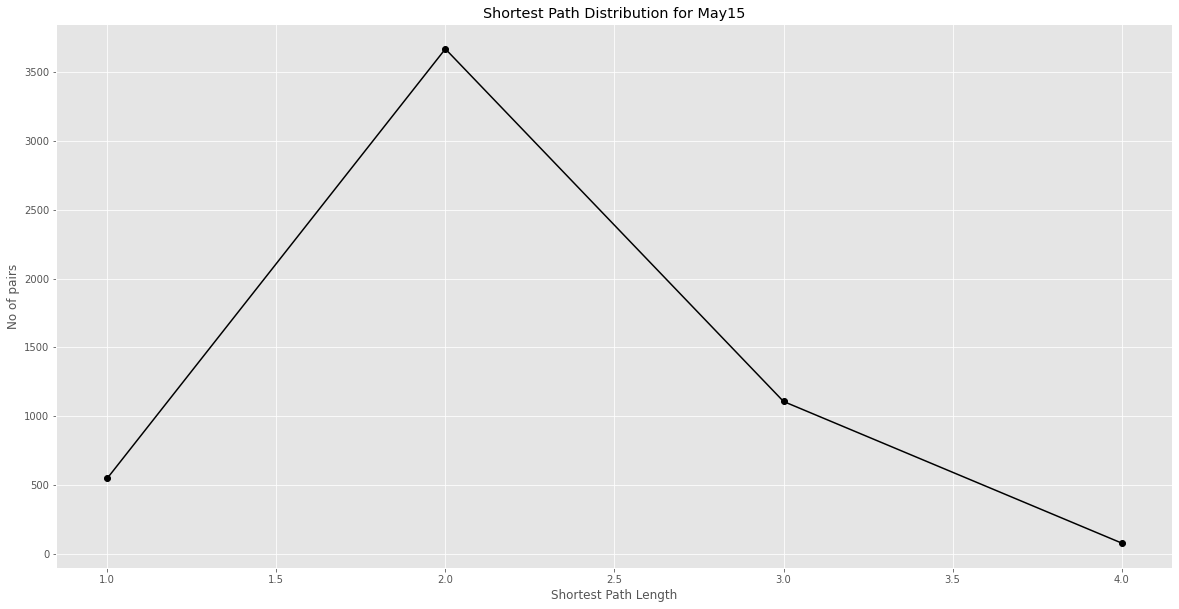



{1: 556, 2: 3747, 3: 1166, 4: 81}
Characteristic Path length for 1506  is  2.139099099099099


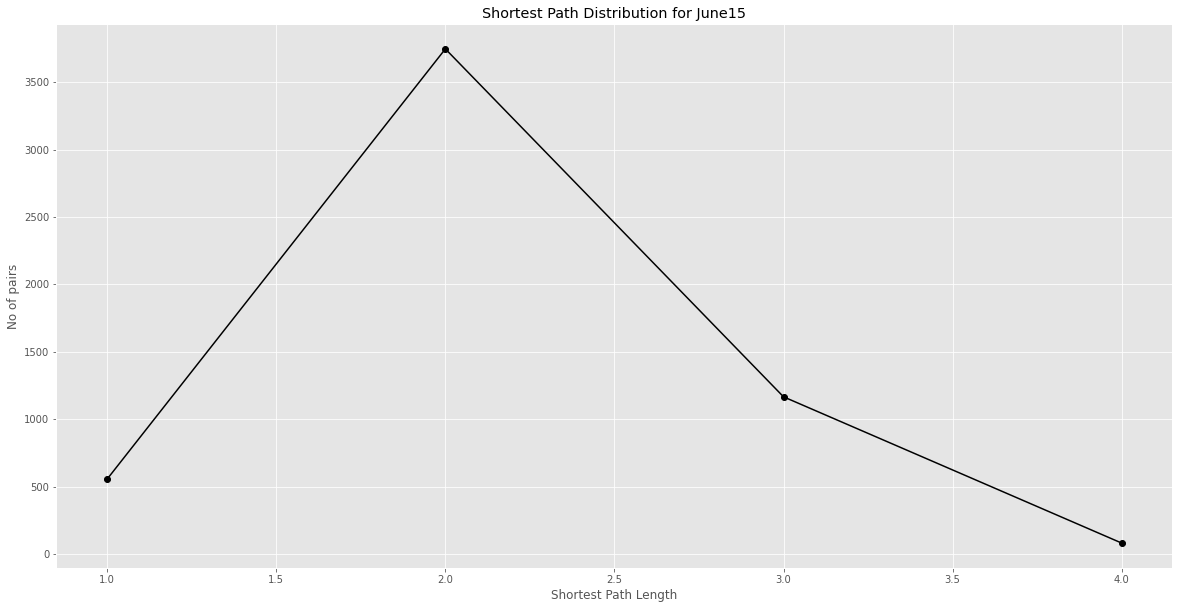



{1: 578, 2: 3784, 3: 1228, 4: 108, 5: 2}
Characteristic Path length for 1507  is  2.152982456140351


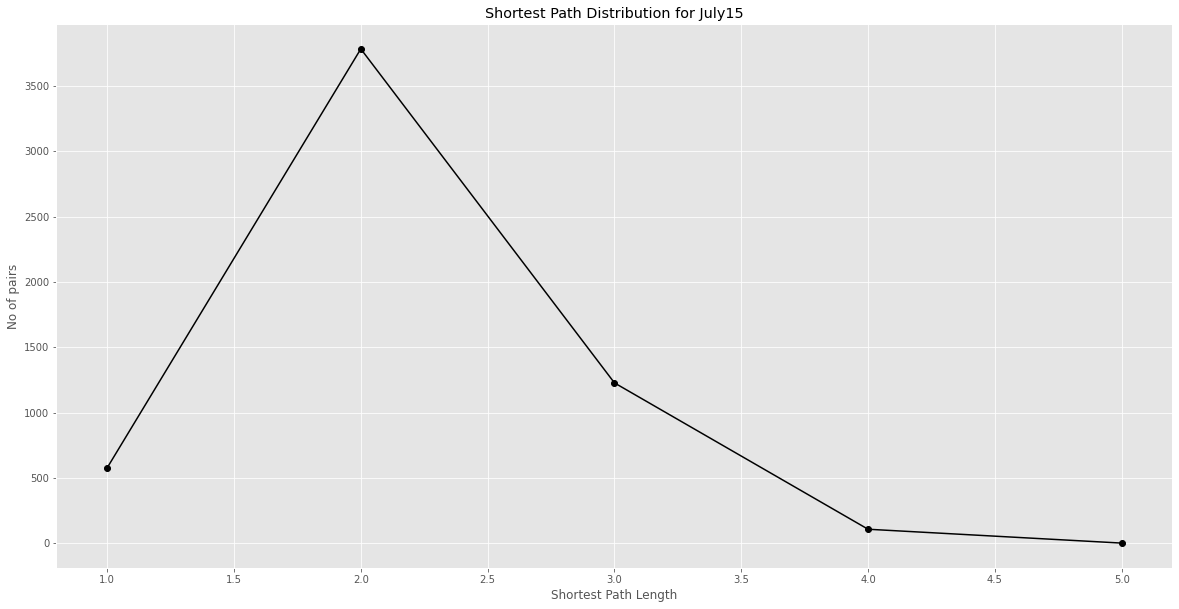



{1: 580, 2: 3824, 3: 1140, 4: 81}
Characteristic Path length for 1508  is  2.1003508771929824


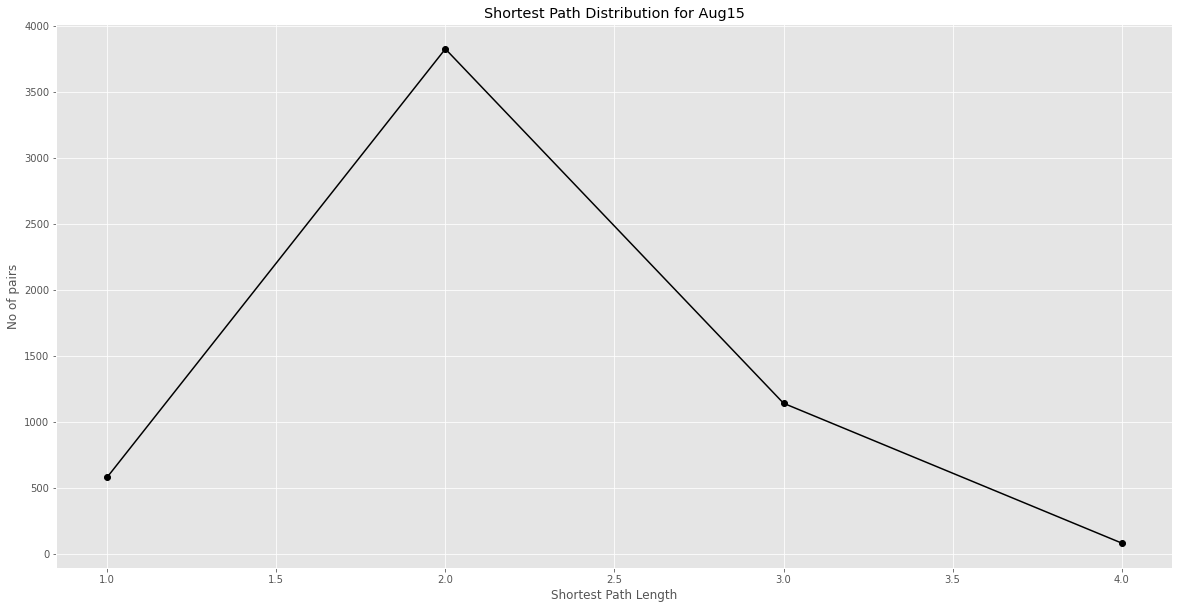



{1: 596, 2: 4221, 3: 1168, 4: 21}
Characteristic Path length for 1509  is  2.1022311022311024


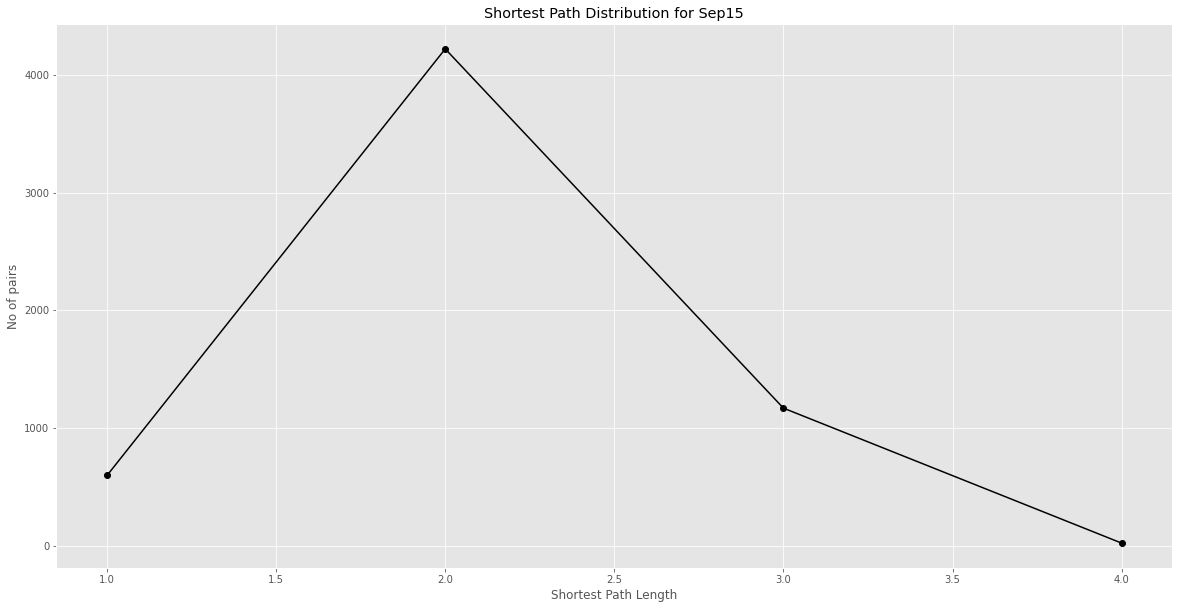



{1: 602, 2: 4076, 3: 1229, 4: 98, 5: 1}
Characteristic Path length for 1510  is  2.1375291375291376


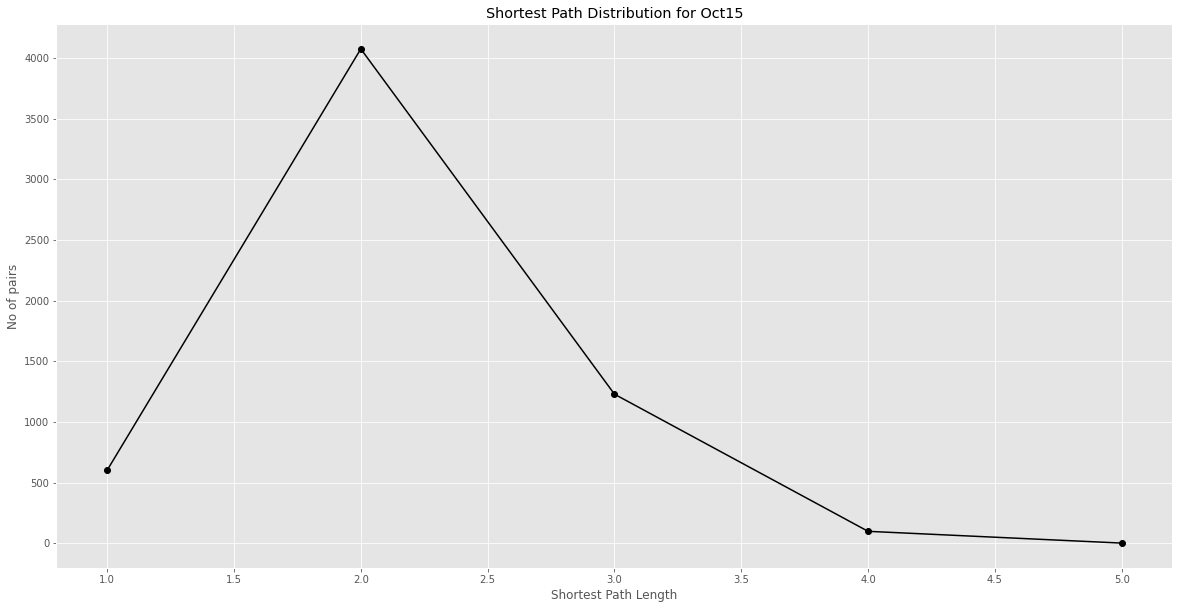



{1: 594, 2: 3874, 3: 1137, 4: 94, 5: 1}
Characteristic Path length for 1511  is  2.1287719298245613


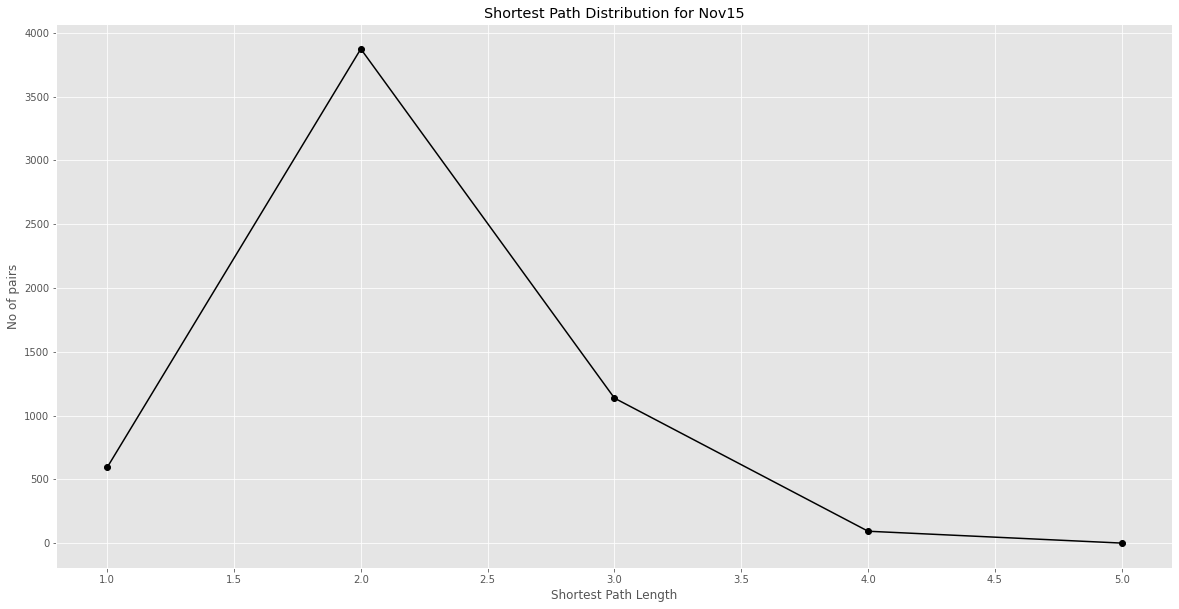



{1: 601, 2: 3952, 3: 906, 4: 17}
Characteristic Path length for 1512  is  2.0344144144144143


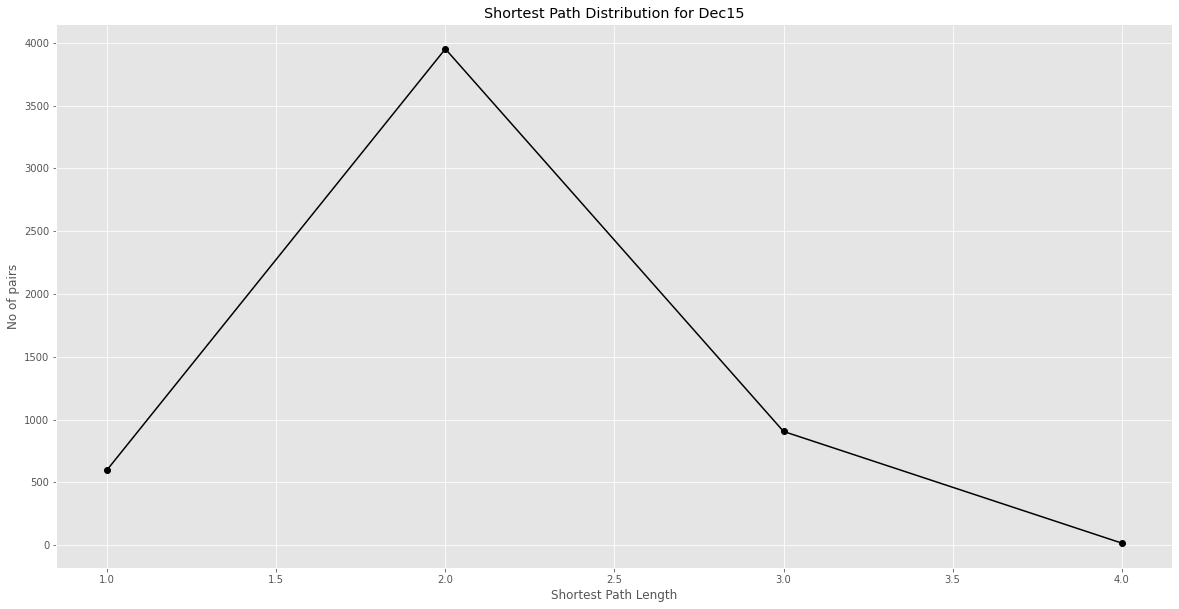



{1: 581, 2: 3970, 3: 909, 4: 16}
Characteristic Path length for 1601  is  2.0381981981981983


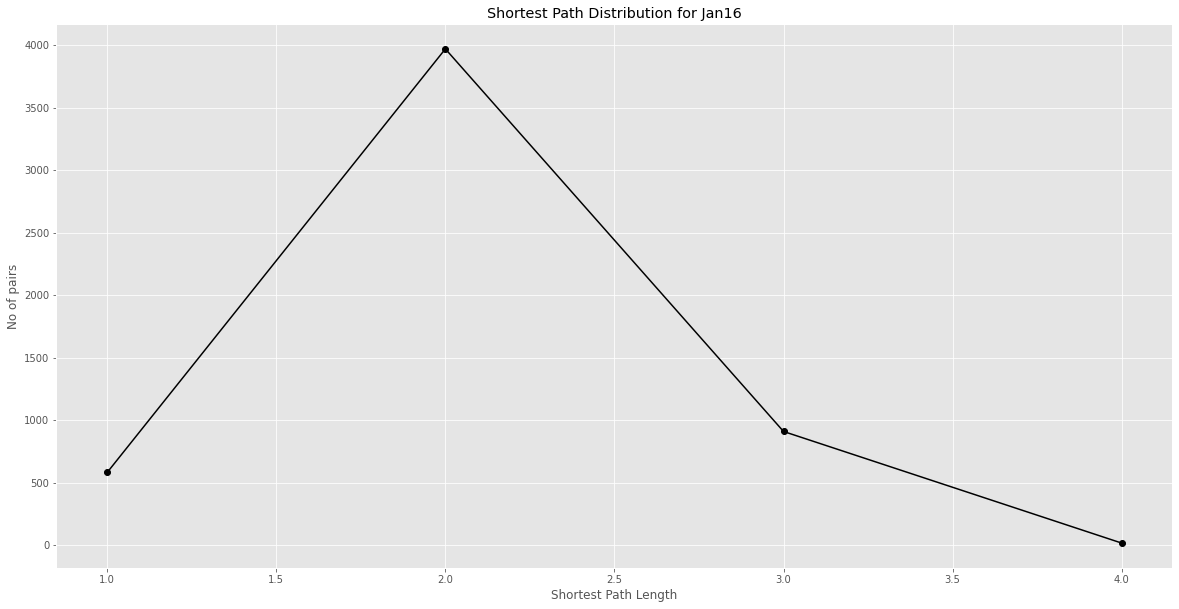



{1: 594, 2: 3924, 3: 868, 4: 16}
Characteristic Path length for 1602  is  2.056645686782673


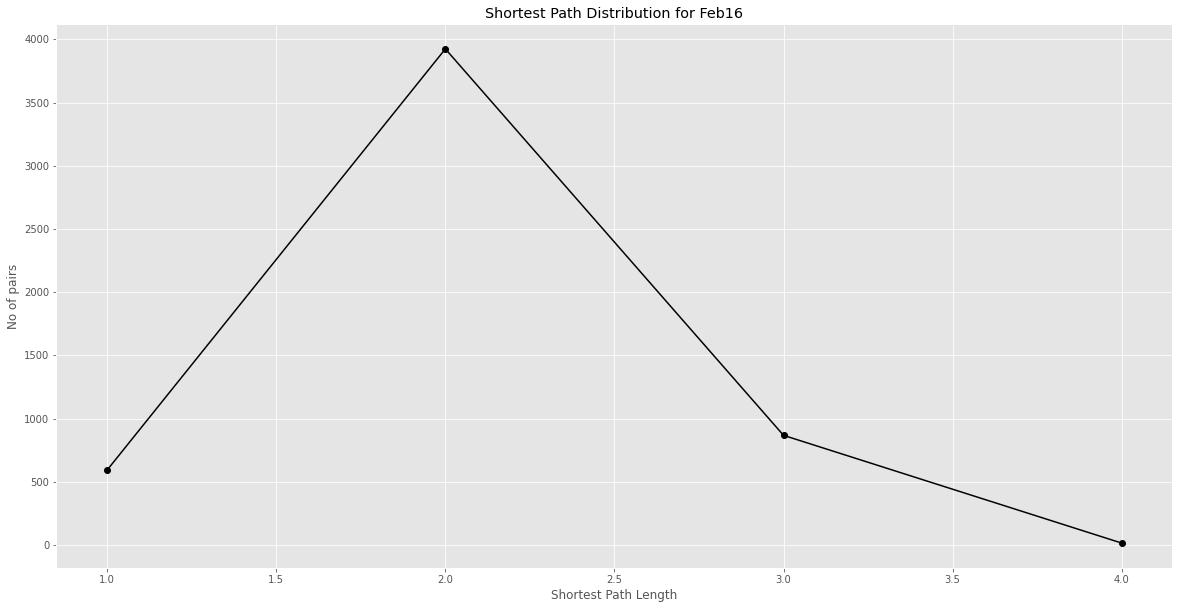



{1: 617, 2: 4042, 3: 875, 4: 16}
Characteristic Path length for 1603  is  2.052252252252252


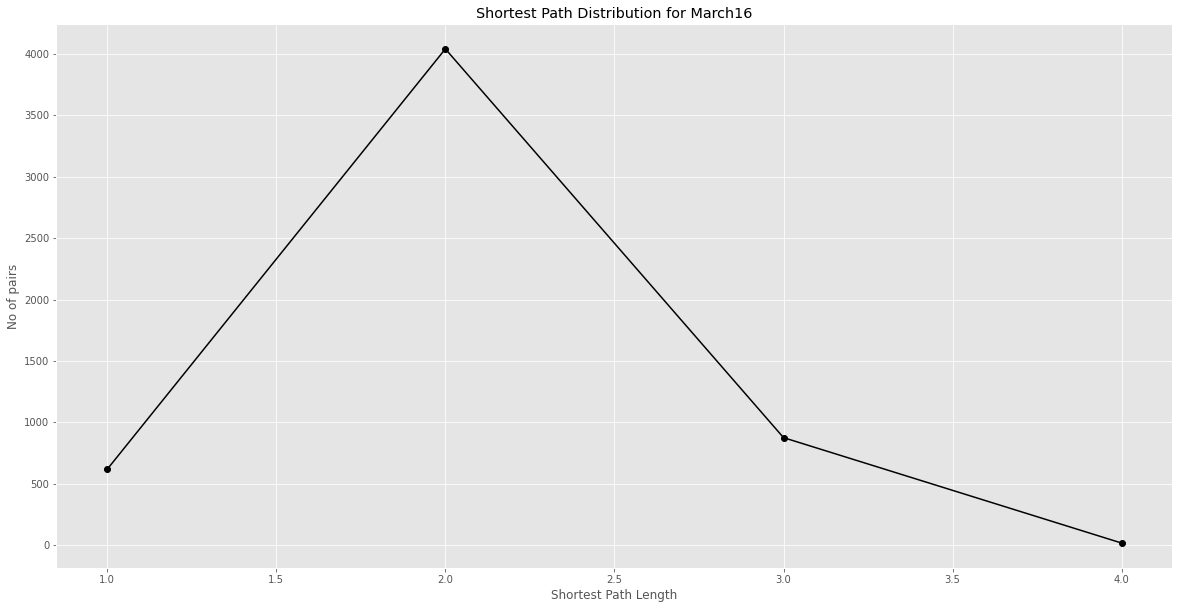



{1: 613, 2: 3787, 3: 868, 4: 60}
Characteristic Path length for 1604  is  1.9875675675675675


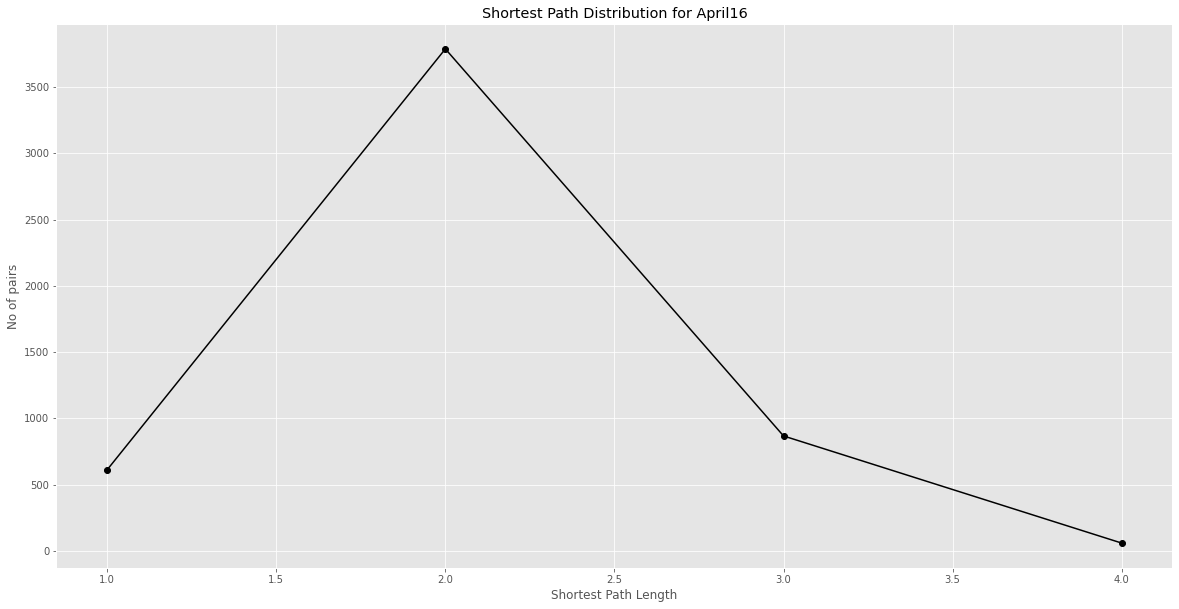



{1: 605, 2: 3818, 3: 855, 4: 50}
Characteristic Path length for 1605  is  1.983063063063063


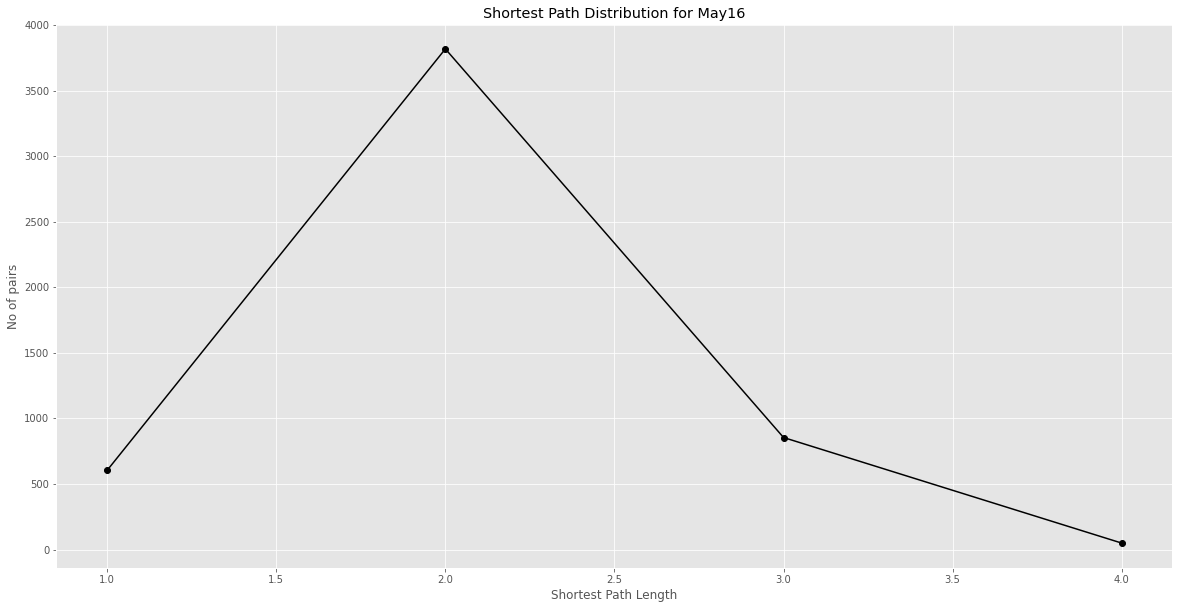



{1: 603, 2: 3672, 3: 730, 4: 35}
Characteristic Path length for 1606  is  1.955289193302892


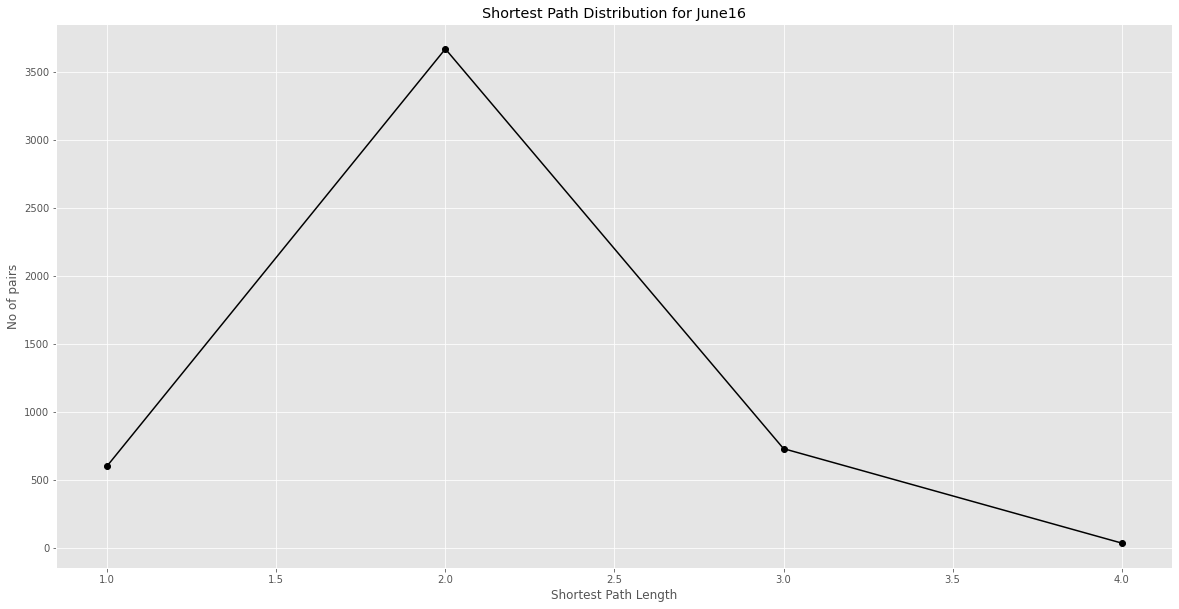



{1: 596, 2: 3554, 3: 714, 4: 35}
Characteristic Path length for 1607  is  1.9534428794992176


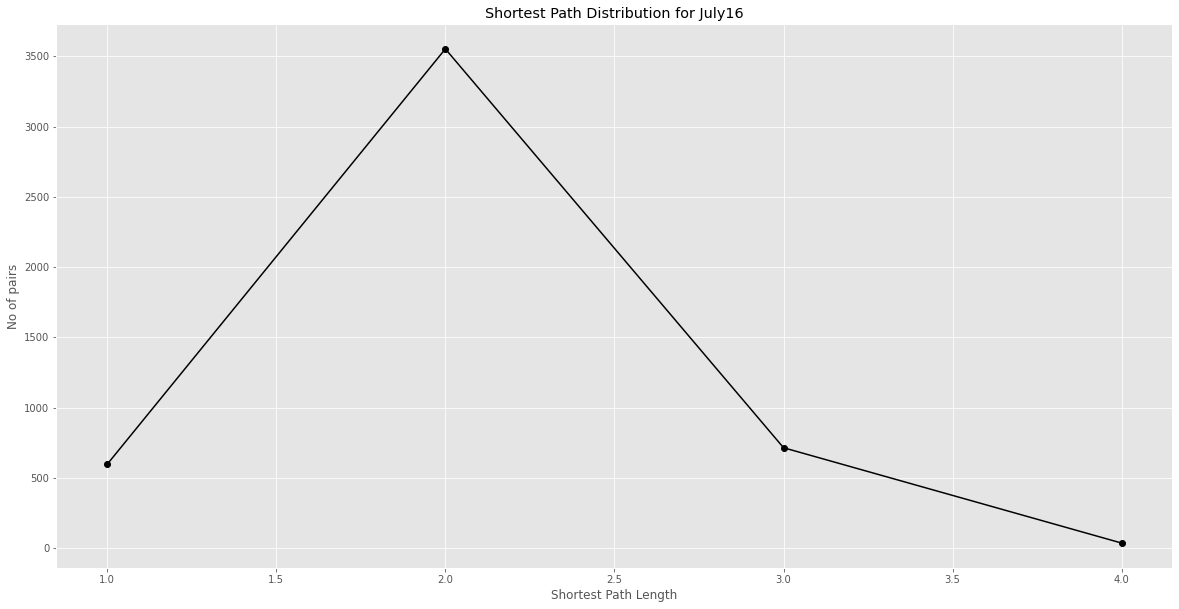



{1: 601, 2: 3643, 3: 929, 4: 82, 5: 1}
Characteristic Path length for 1608  is  2.094178082191781


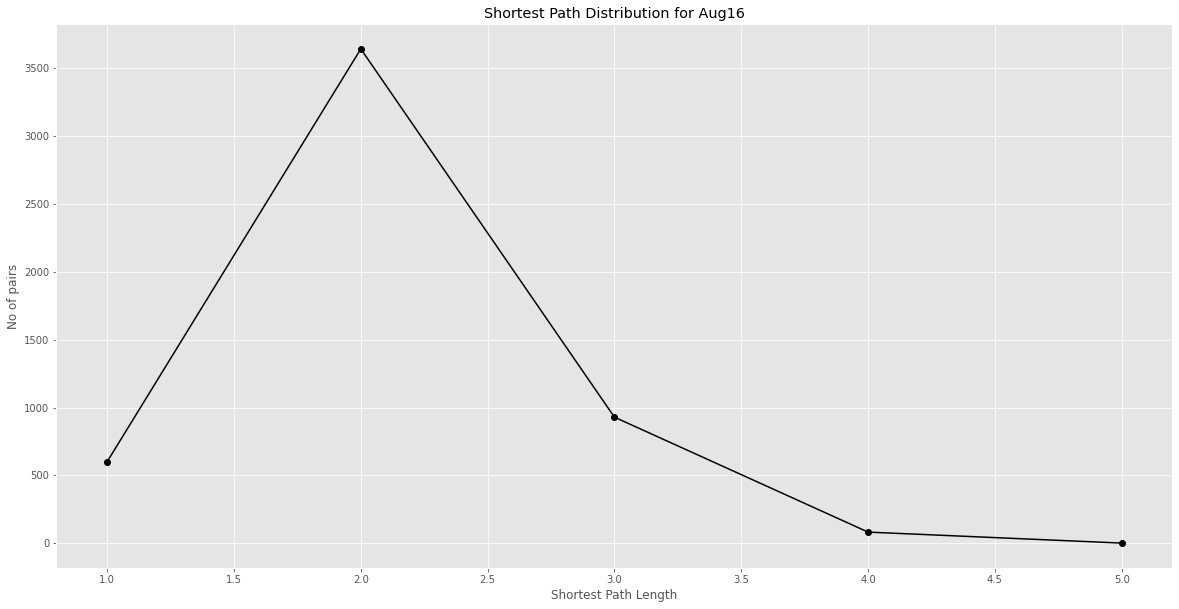



{1: 598, 2: 3665, 3: 912, 4: 80, 5: 1}
Characteristic Path length for 1609  is  2.0907534246575343


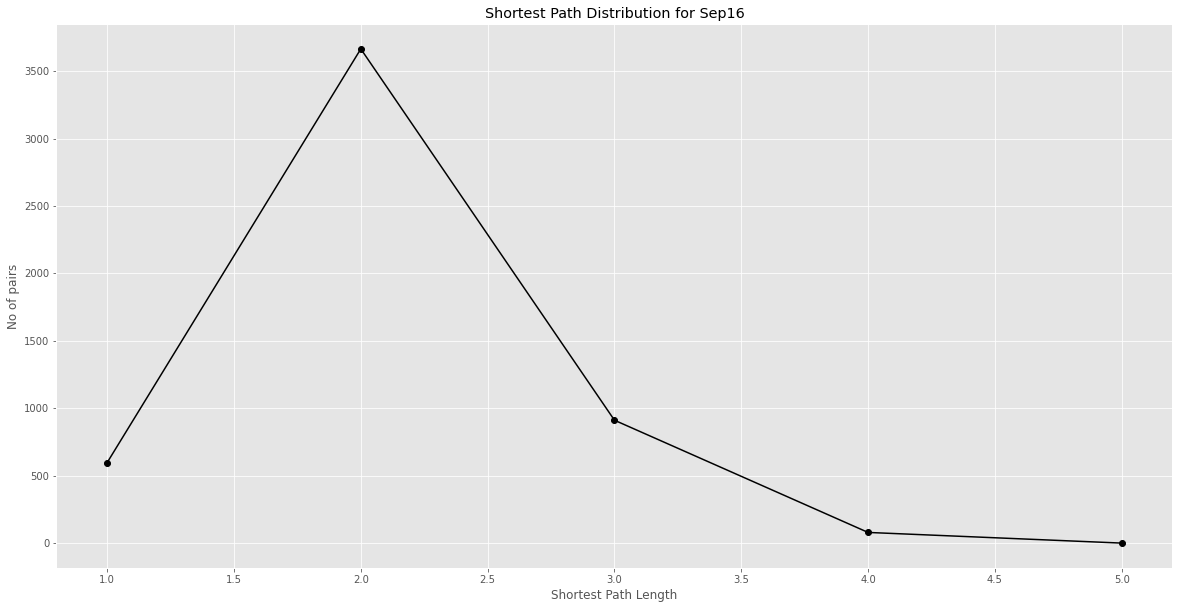



{1: 608, 2: 3672, 3: 842, 4: 60, 5: 1}
Characteristic Path length for 1610  is  1.9850055534987041


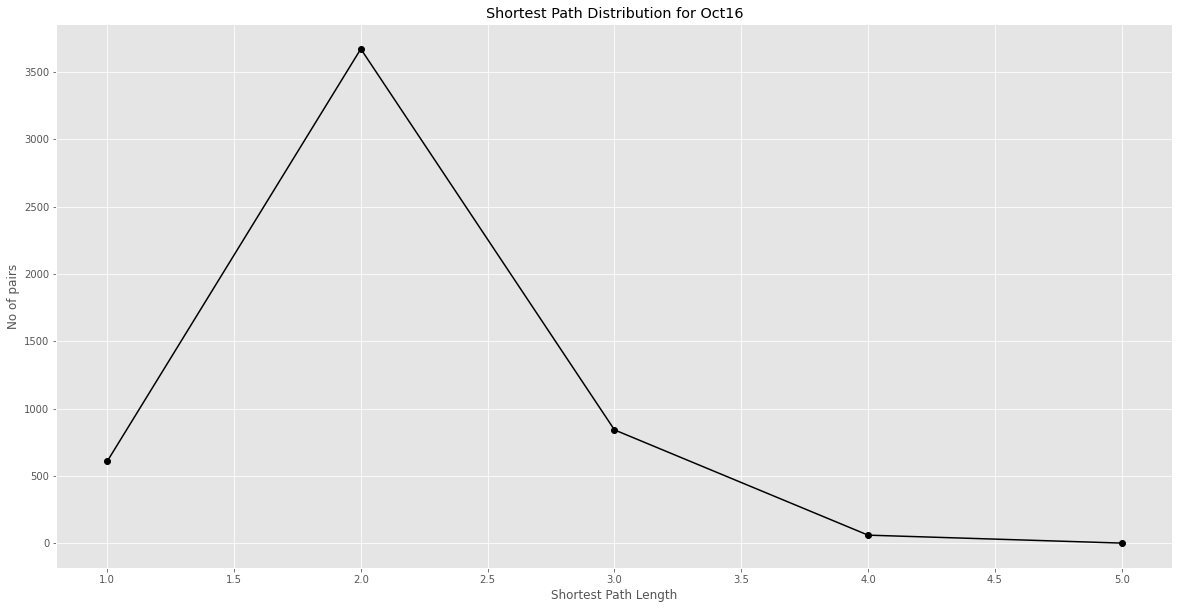



{1: 617, 2: 3734, 3: 1013, 4: 38}
Characteristic Path length for 1611  is  2.087375046279156


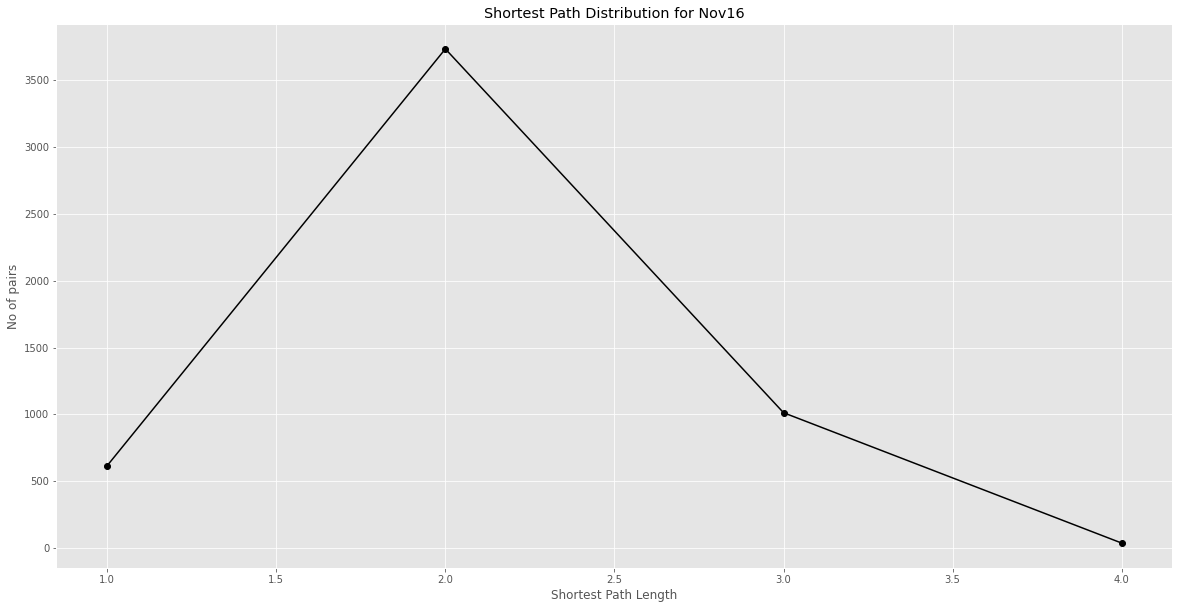



{1: 610, 2: 3847, 3: 1055, 4: 38}
Characteristic Path length for 1612  is  2.093873873873874


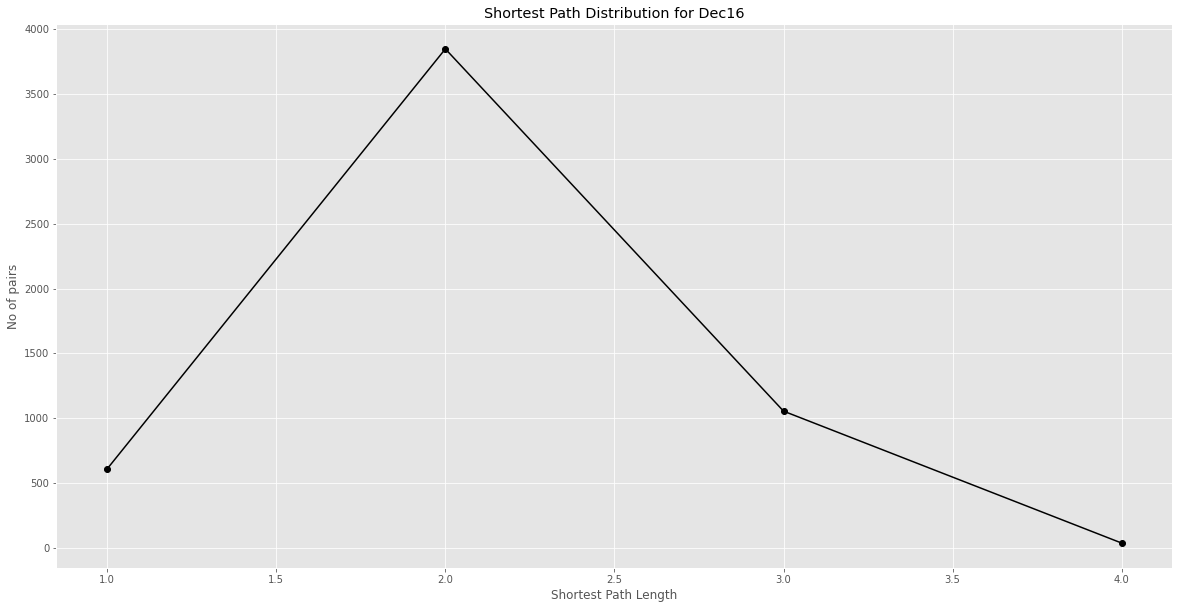



{1: 599, 2: 3829, 3: 955, 4: 19}
Characteristic Path length for 1701  is  2.0729359496482784


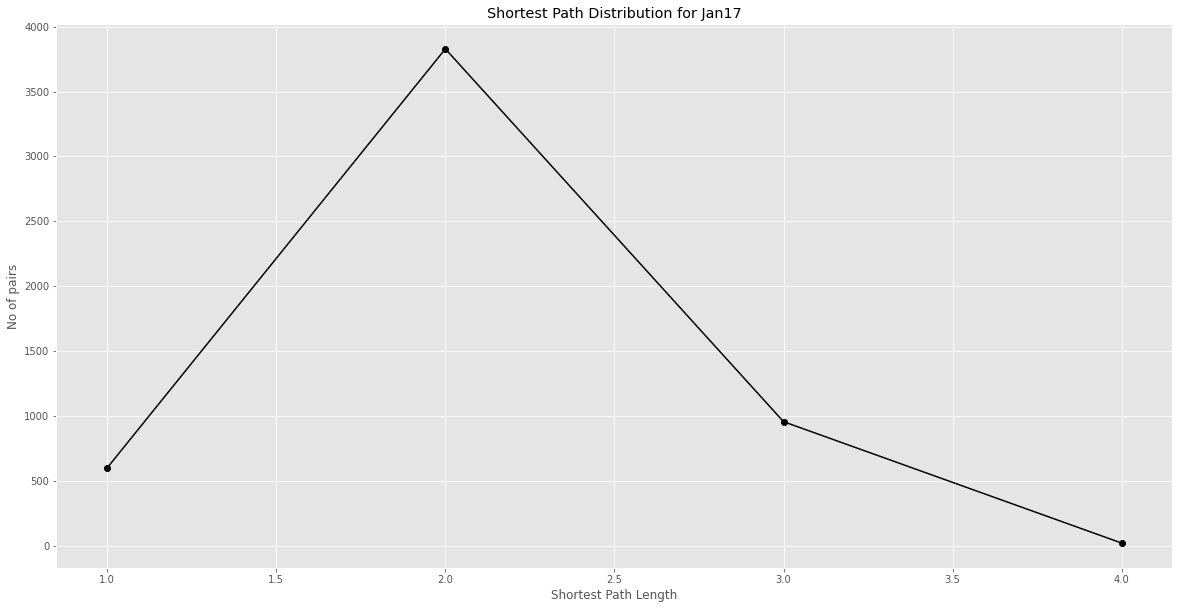



{1: 635, 2: 3970, 3: 927, 4: 18}
Characteristic Path length for 1702  is  2.059099099099099


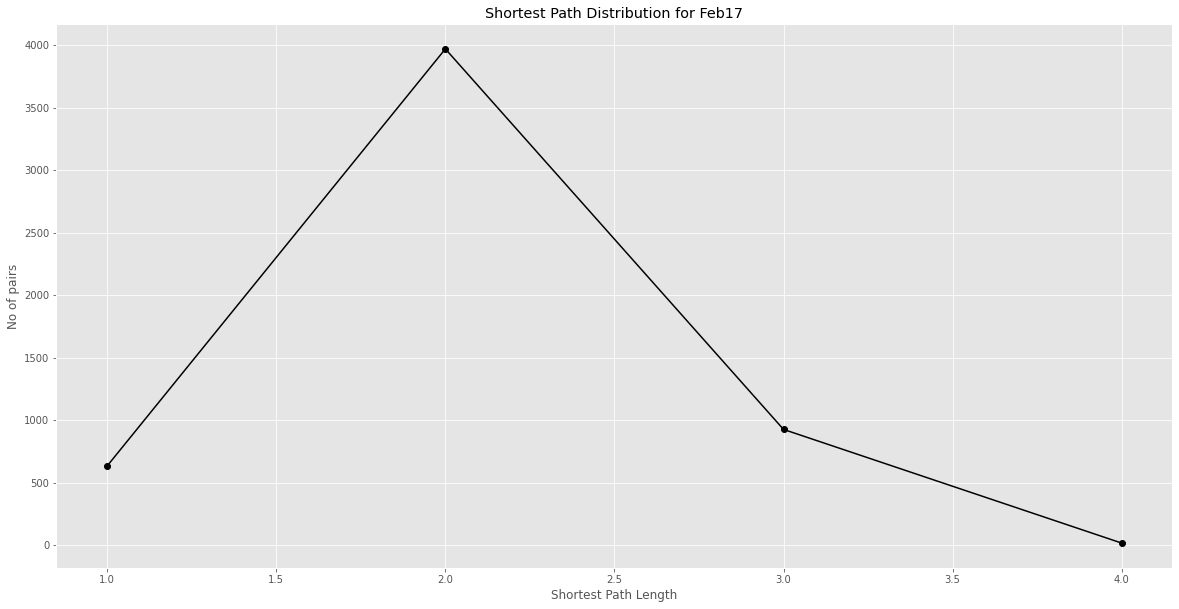



{1: 652, 2: 4092, 3: 940, 4: 16}
Characteristic Path length for 1703  is  2.056140350877193


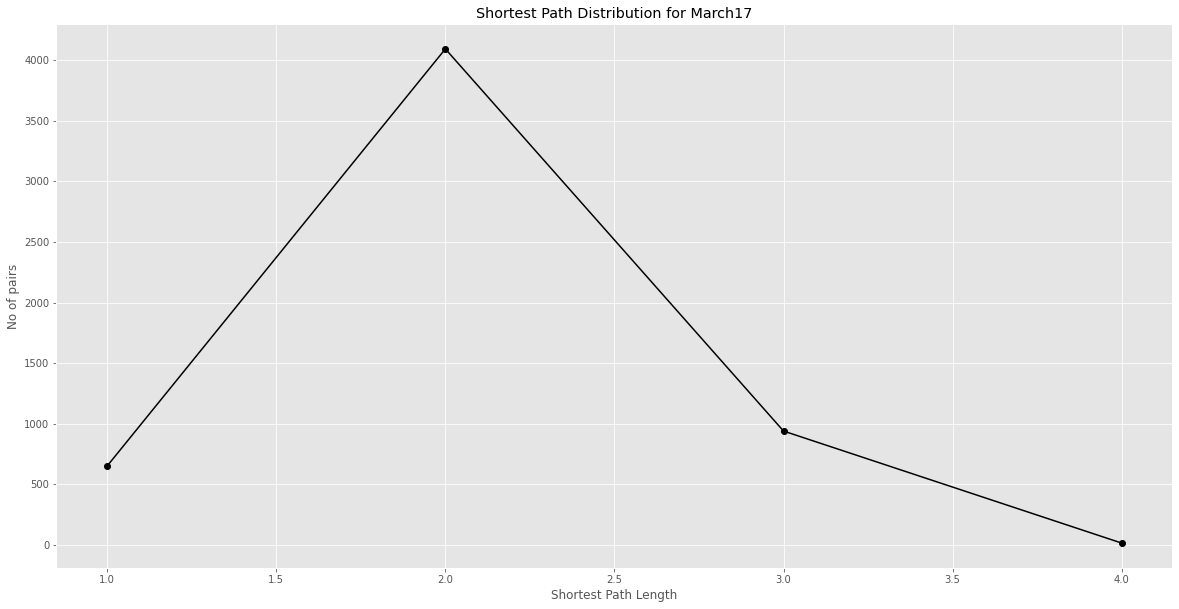



{1: 629, 2: 4215, 3: 1158, 4: 4}
Characteristic Path length for 1704  is  2.089410589410589


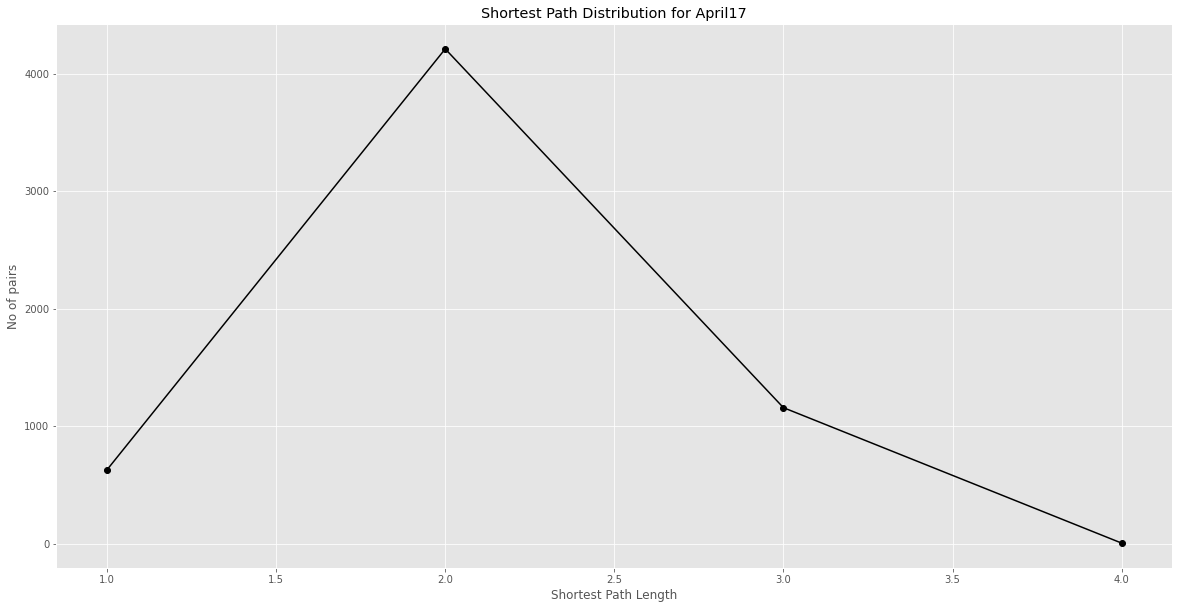



{1: 629, 2: 4251, 3: 1122, 4: 4}
Characteristic Path length for 1705  is  2.083416583416583


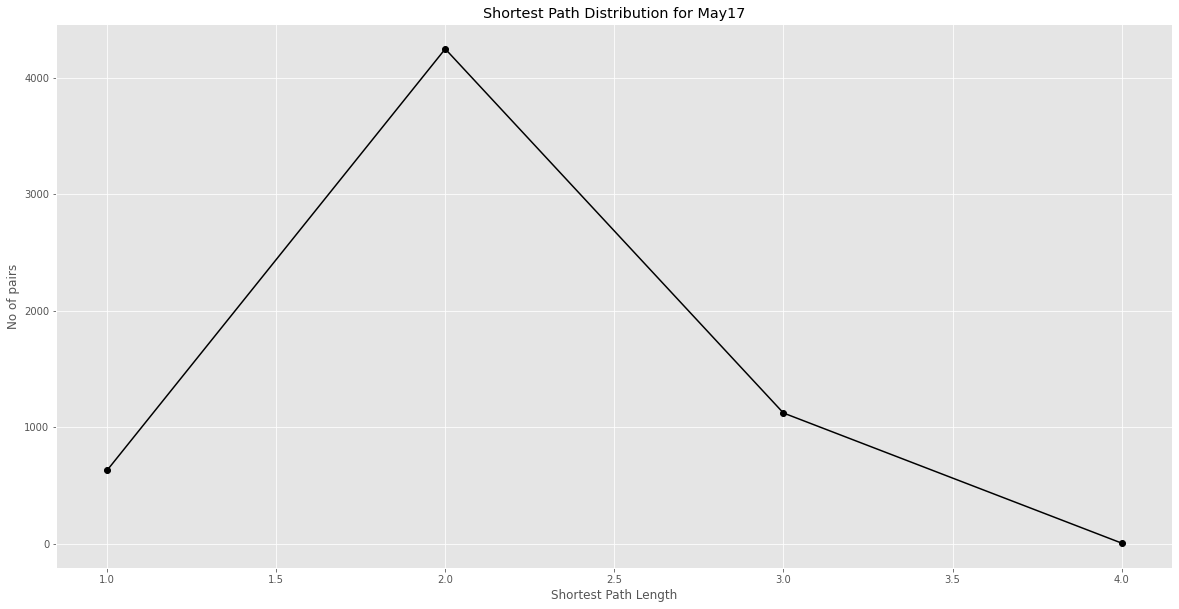



{1: 665, 2: 4190, 3: 1128, 4: 23}
Characteristic Path length for 1706  is  2.084748584748585


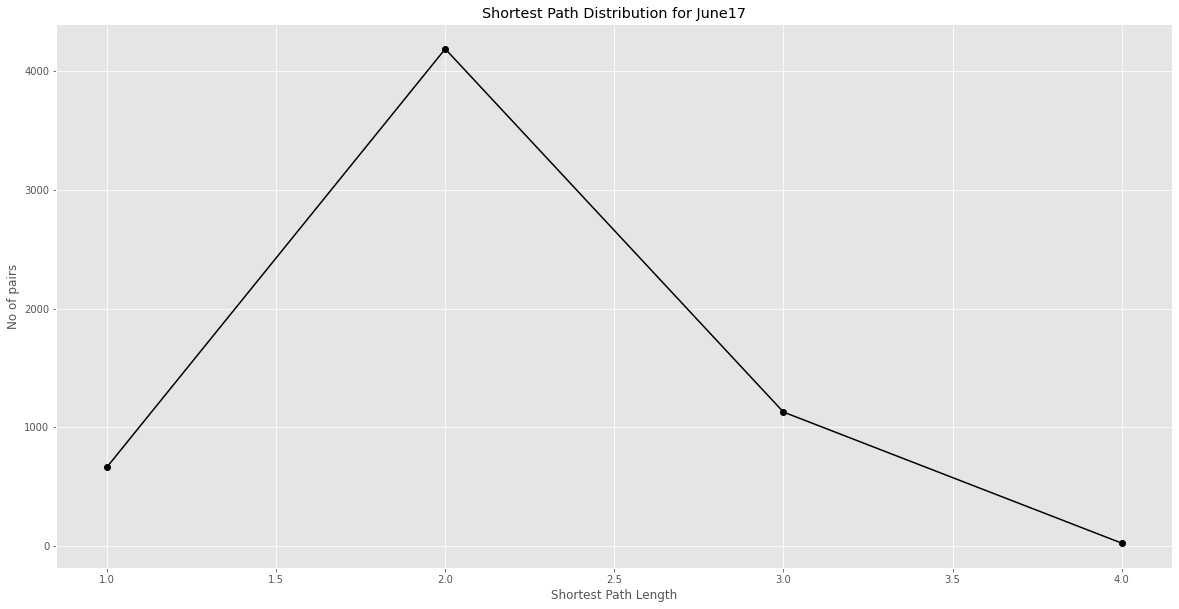



{1: 690, 2: 4381, 3: 1224, 4: 25}
Characteristic Path length for 1707  is  2.0924050632911393


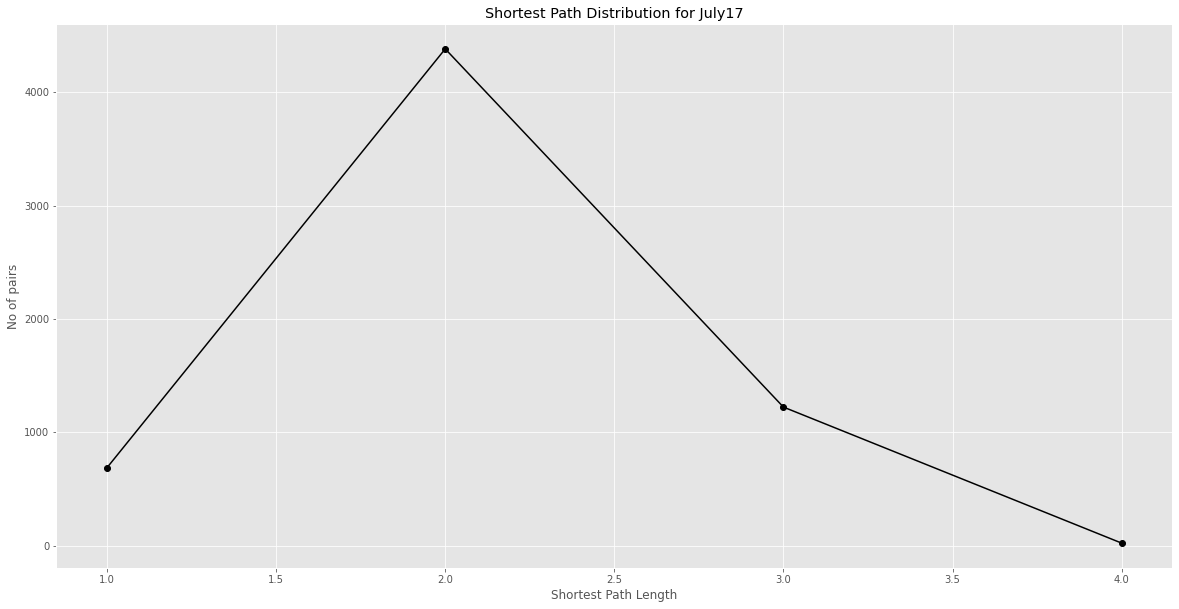



{1: 681, 2: 4314, 3: 1299, 4: 26}
Characteristic Path length for 1708  is  2.106012658227848


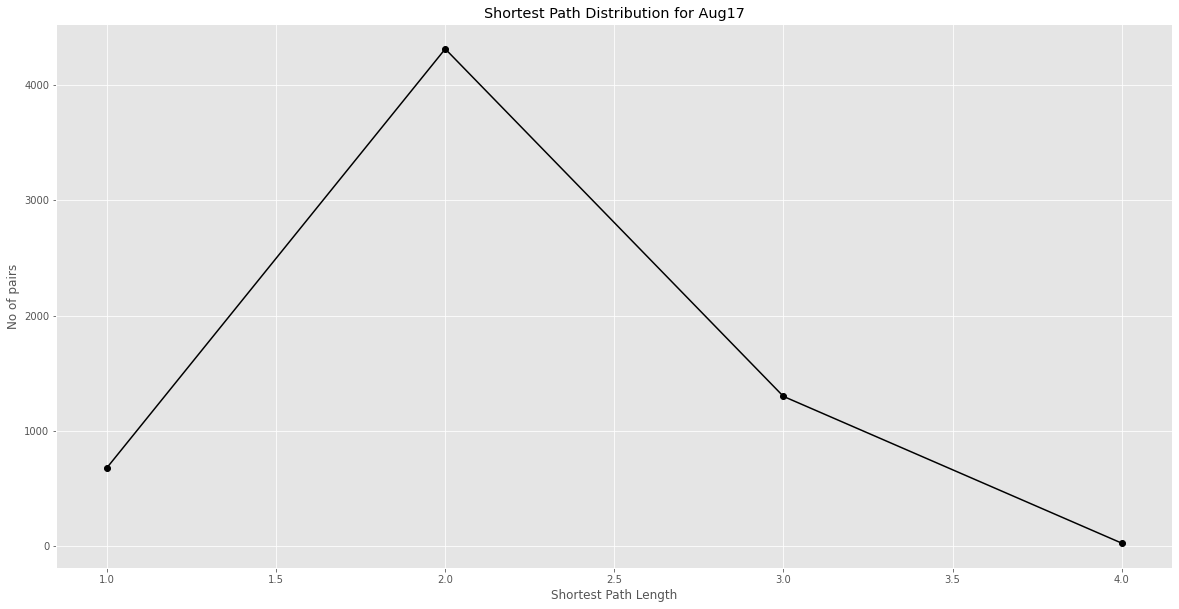



{1: 706, 2: 4659, 3: 1418, 4: 23}
Characteristic Path length for 1709  is  2.1113723185424624


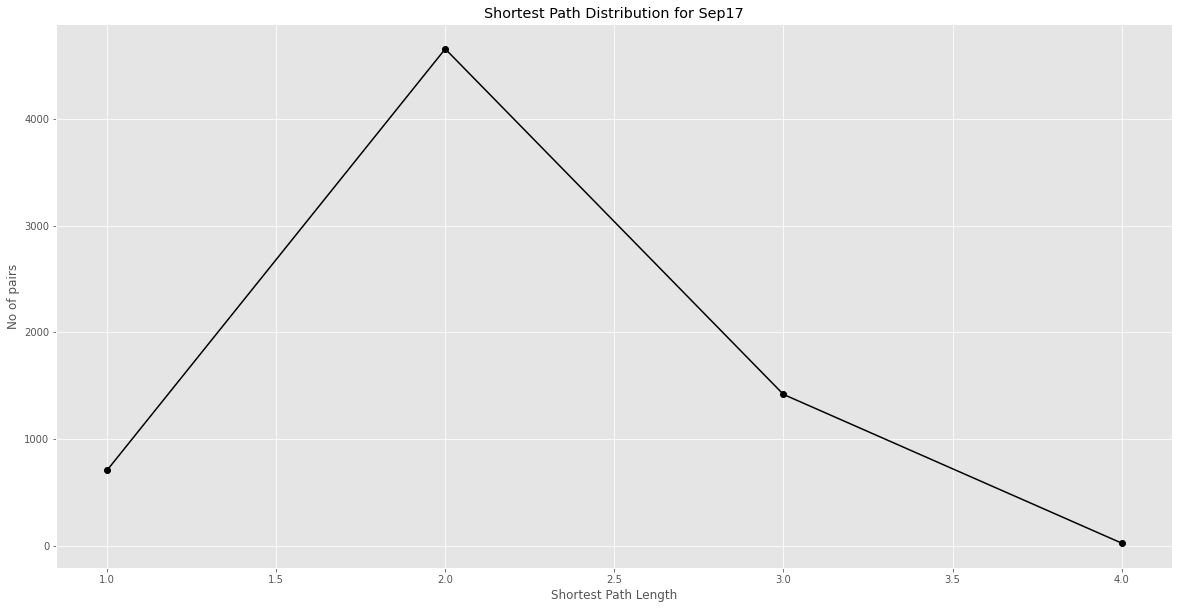



{1: 746, 2: 5029, 3: 1513, 4: 22}
Characteristic Path length for 1710  is  2.1109439124487004


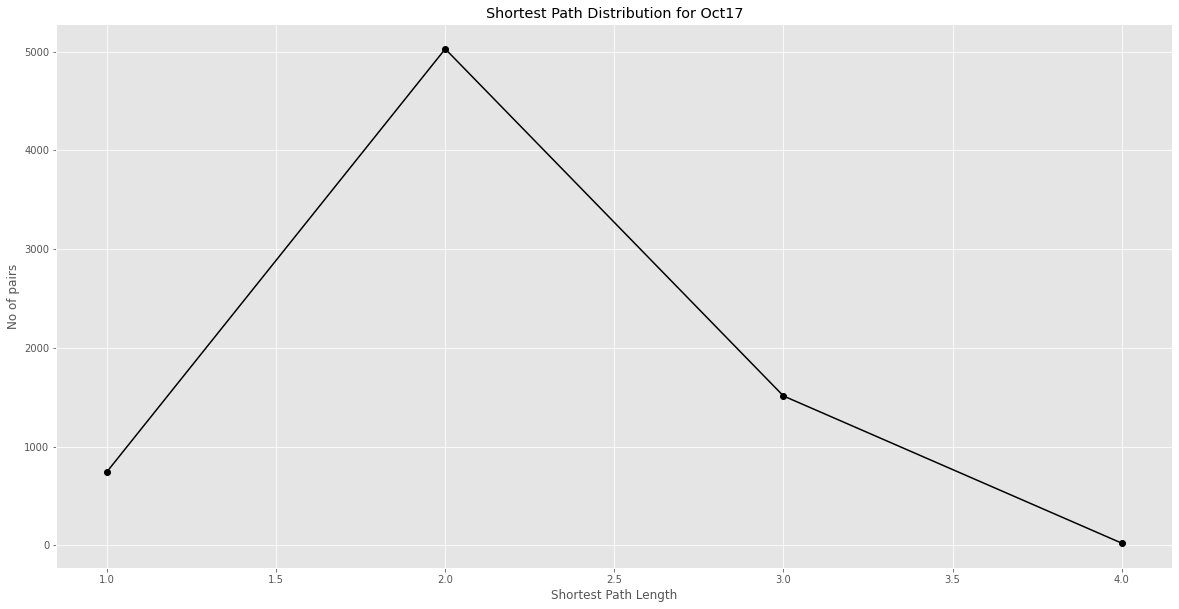



{1: 744, 2: 5076, 3: 1468, 4: 22}
Characteristic Path length for 1711  is  2.105061559507524


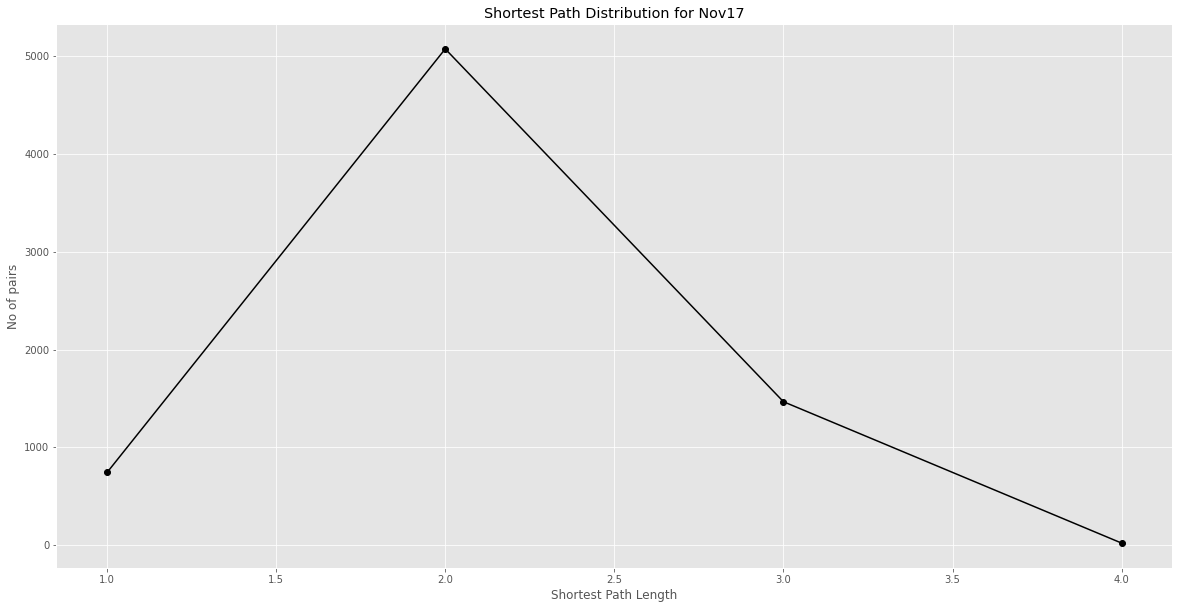



{1: 780, 2: 5219, 3: 1483}
Characteristic Path length for 1712  is  2.0939588345362203


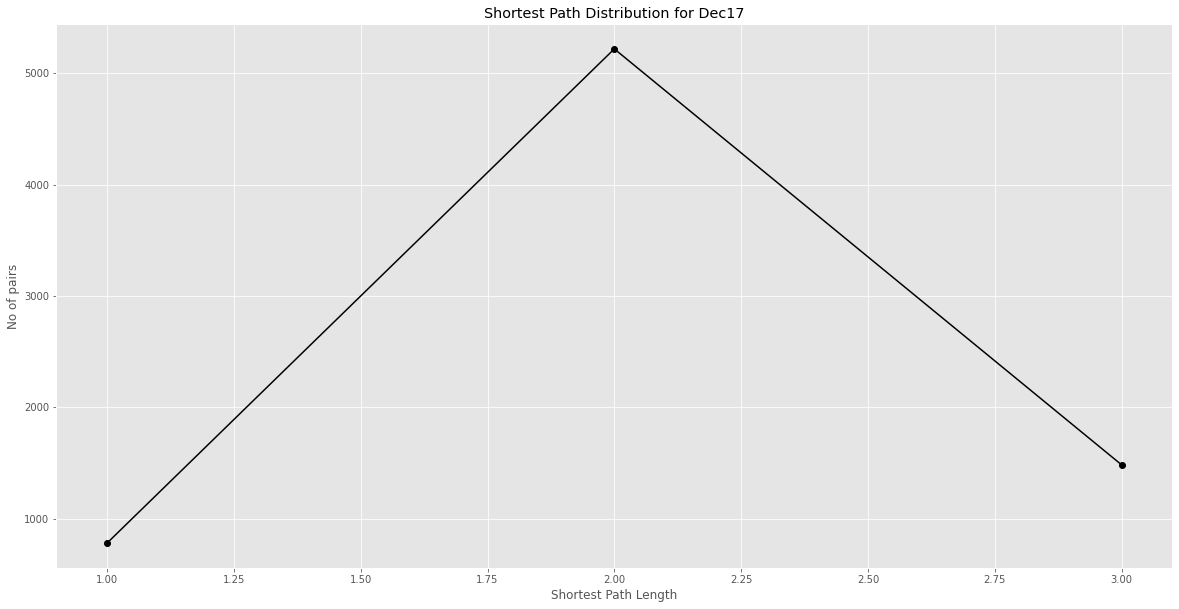



{1: 784, 2: 5235, 3: 1462, 4: 1}
Characteristic Path length for 1801  is  2.090884790163058


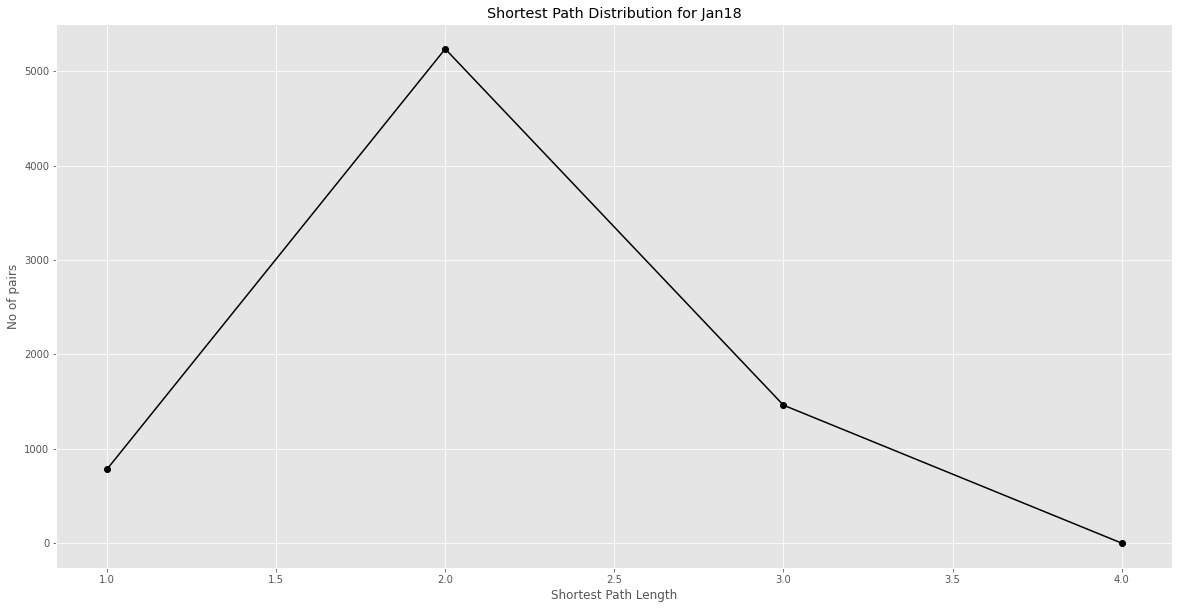



{1: 821, 2: 5440, 3: 1570, 4: 1}
Characteristic Path length for 1802  is  2.095888661899898


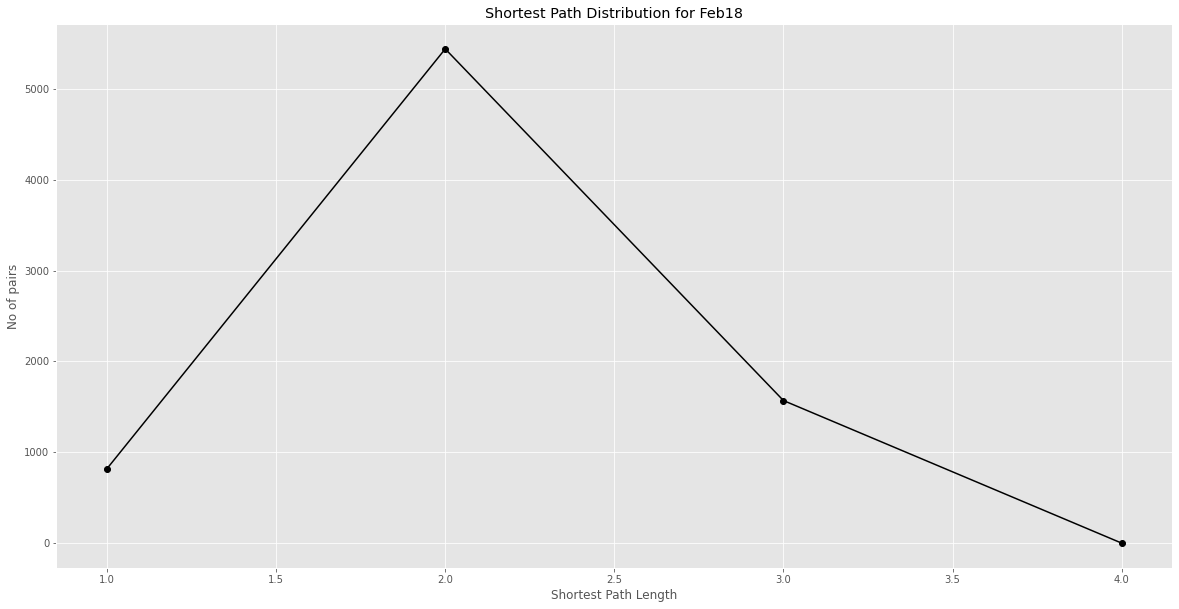



{1: 840, 2: 5581, 3: 1566, 4: 23}
Characteristic Path length for 1803  is  2.096379525593009


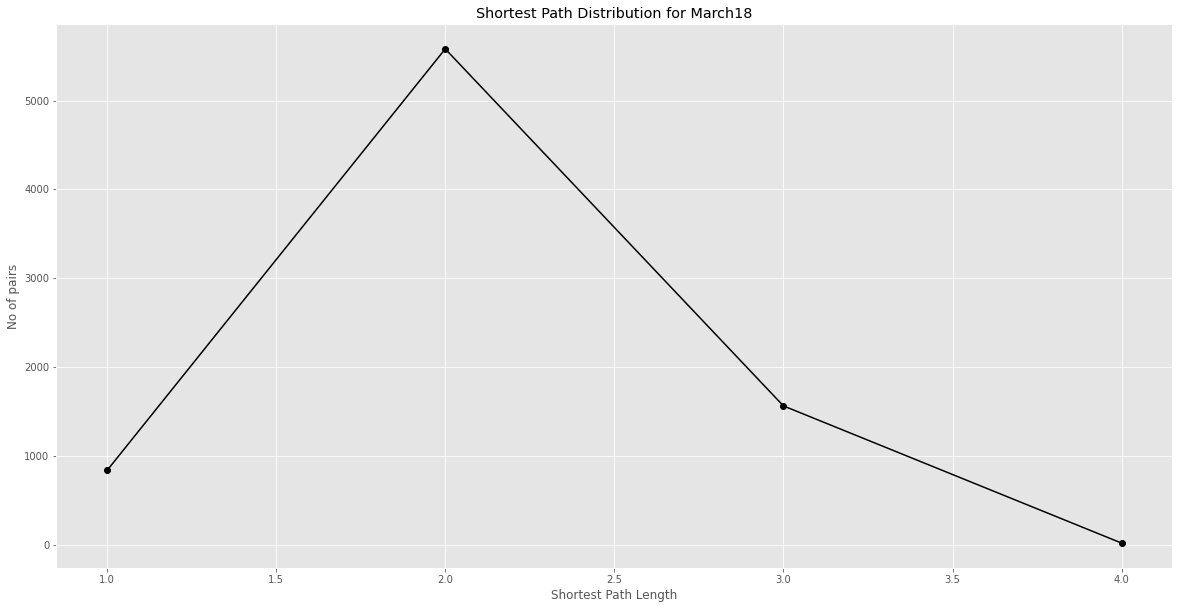



{1: 810, 2: 5966, 3: 1753, 4: 27}
Characteristic Path length for 1804  is  2.116526414212249


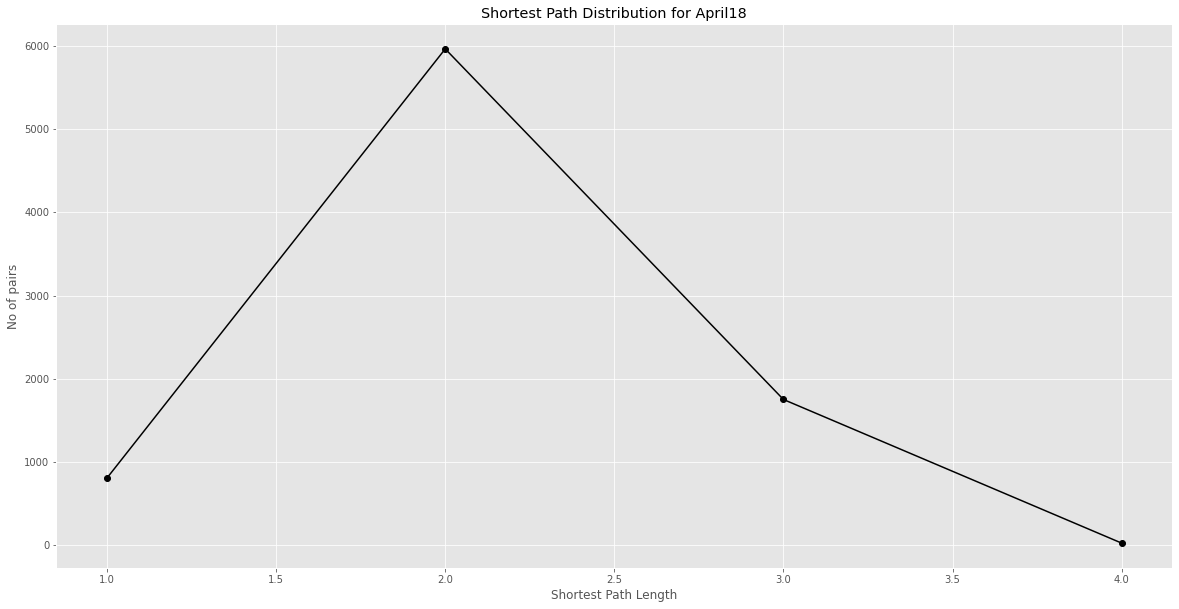



{1: 845, 2: 6303, 3: 1757, 4: 25}
Characteristic Path length for 1805  is  2.107726763717805


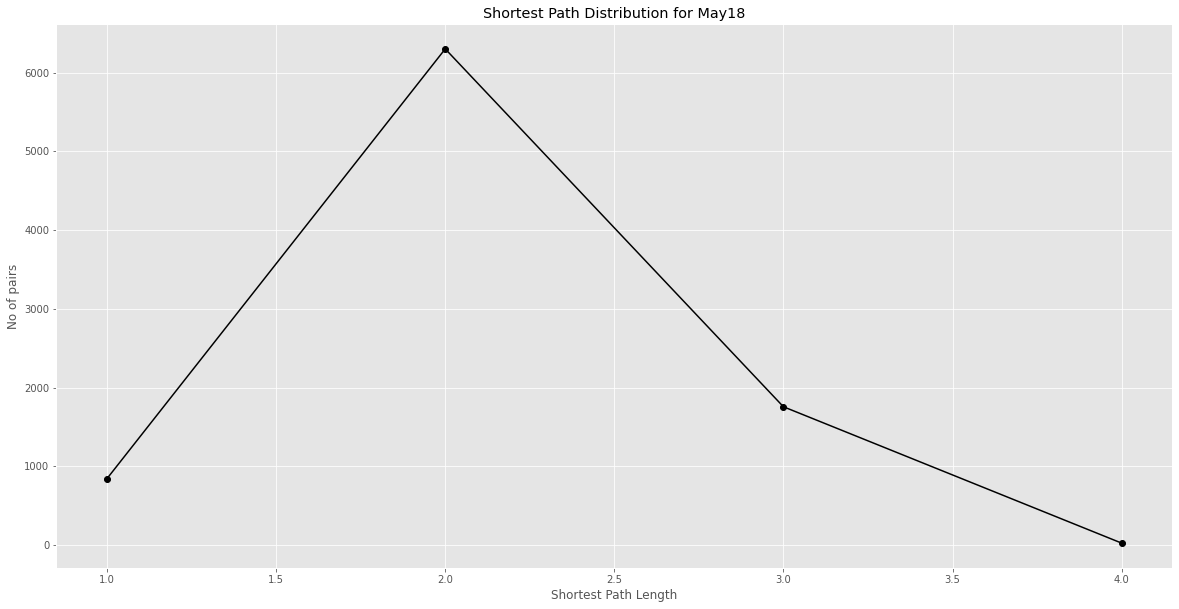



{1: 852, 2: 6216, 3: 1836, 4: 26}
Characteristic Path length for 1806  is  2.116013437849944


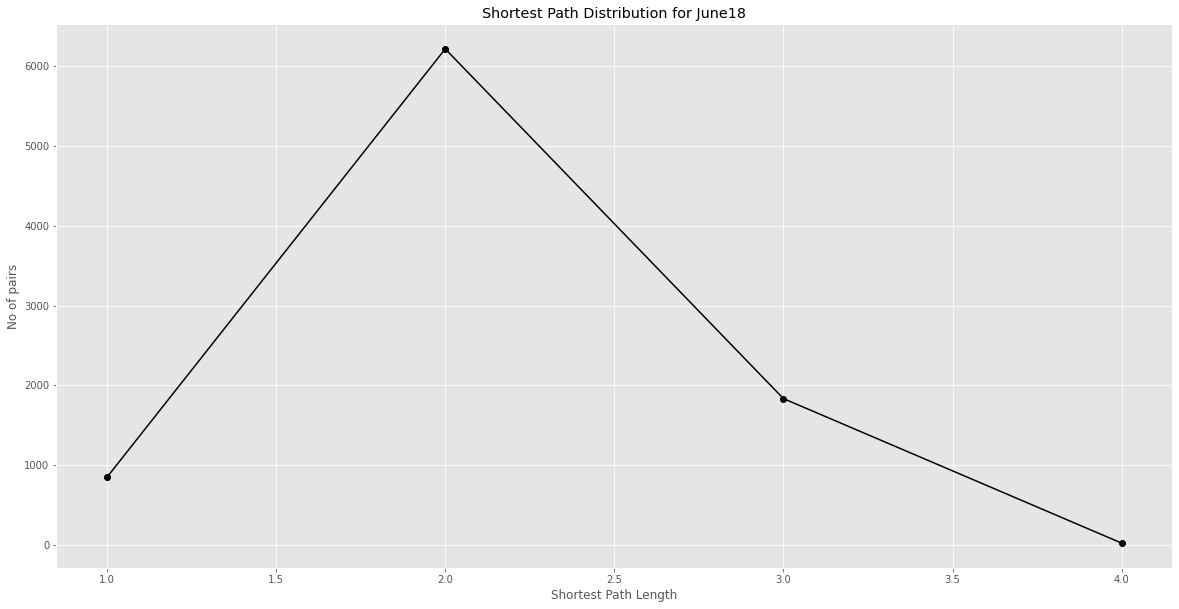



{1: 849, 2: 6295, 3: 1919, 4: 57}
Characteristic Path length for 1807  is  2.1298245614035087


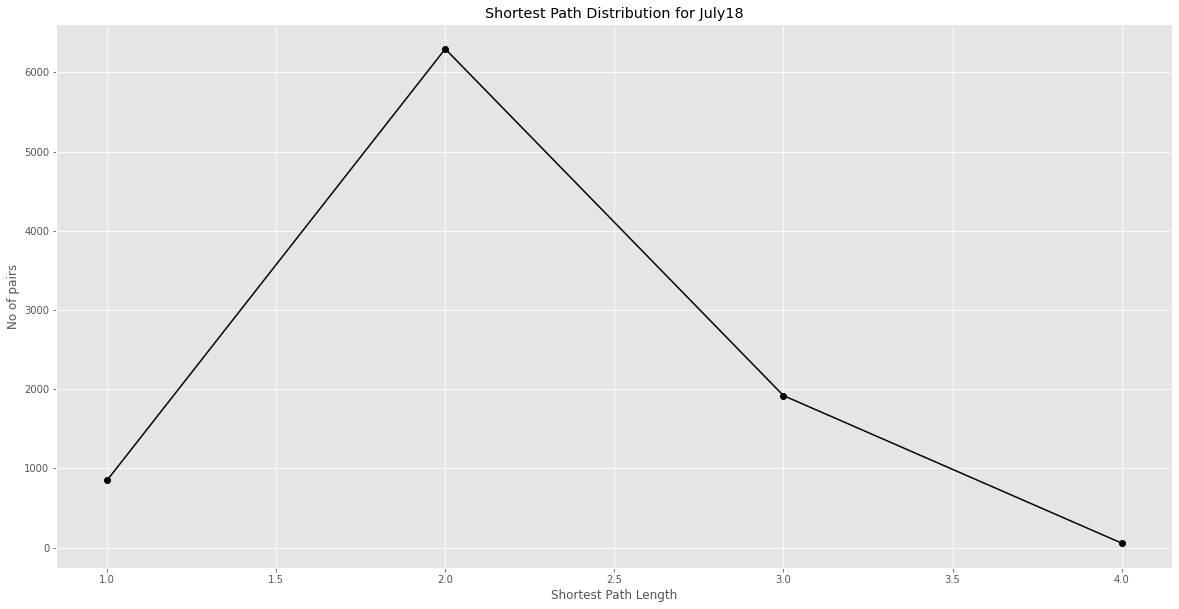



{1: 861, 2: 6325, 3: 2067, 4: 59}
Characteristic Path length for 1808  is  2.1421821305841924


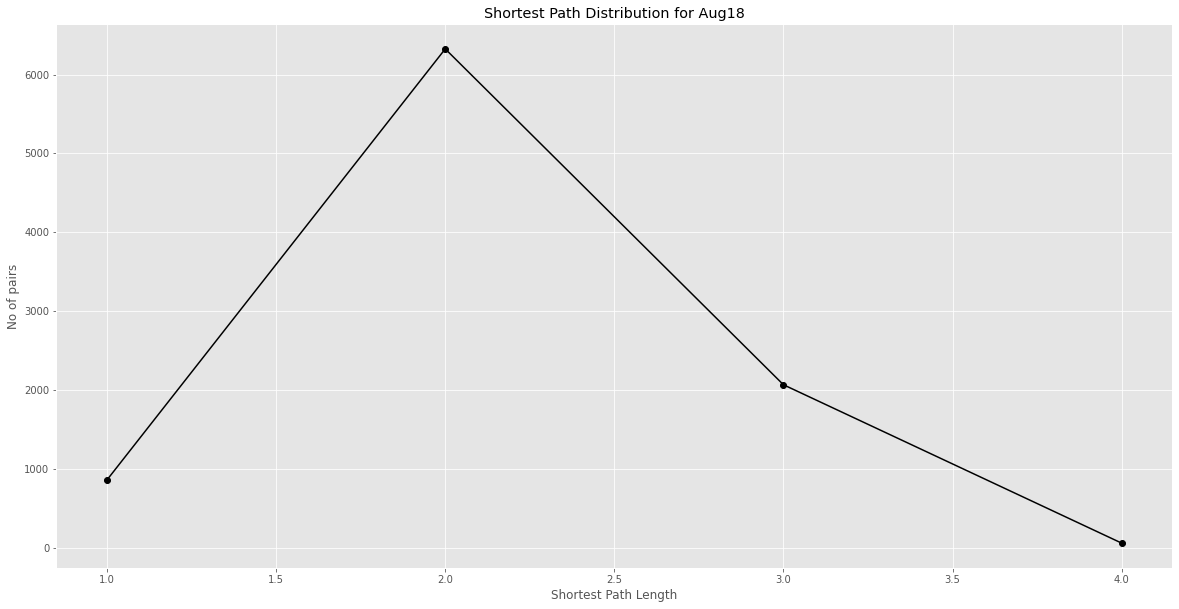



{1: 873, 2: 6333, 3: 2048, 4: 58}
Characteristic Path length for 1809  is  2.138638316151203


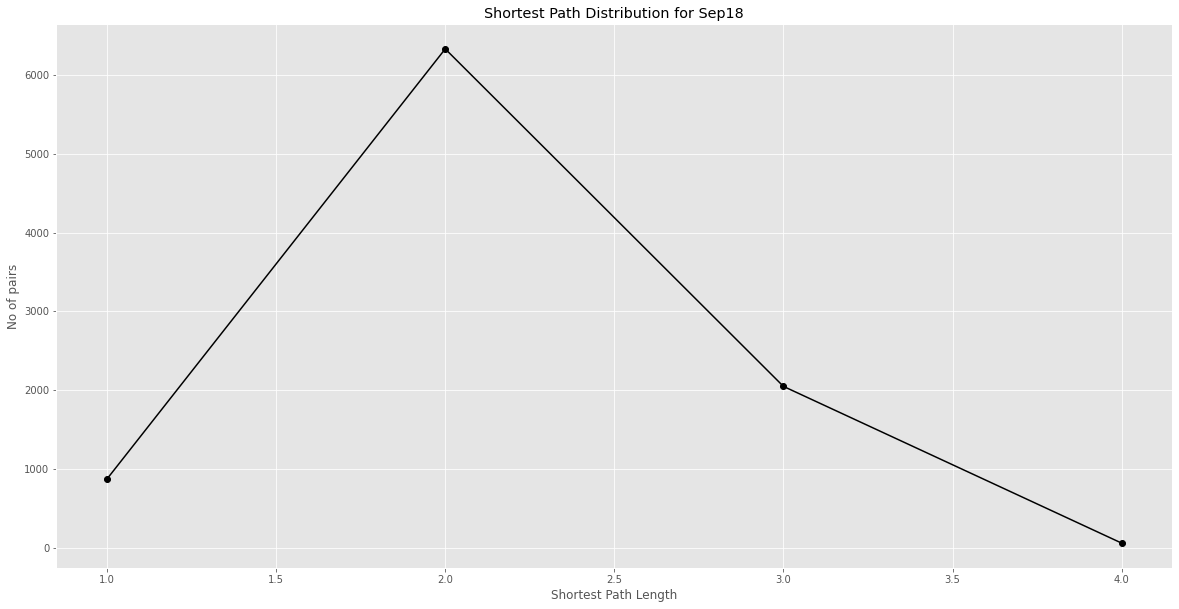



{1: 894, 2: 6406, 3: 1630}
Characteristic Path length for 1810  is  2.0824188129899217


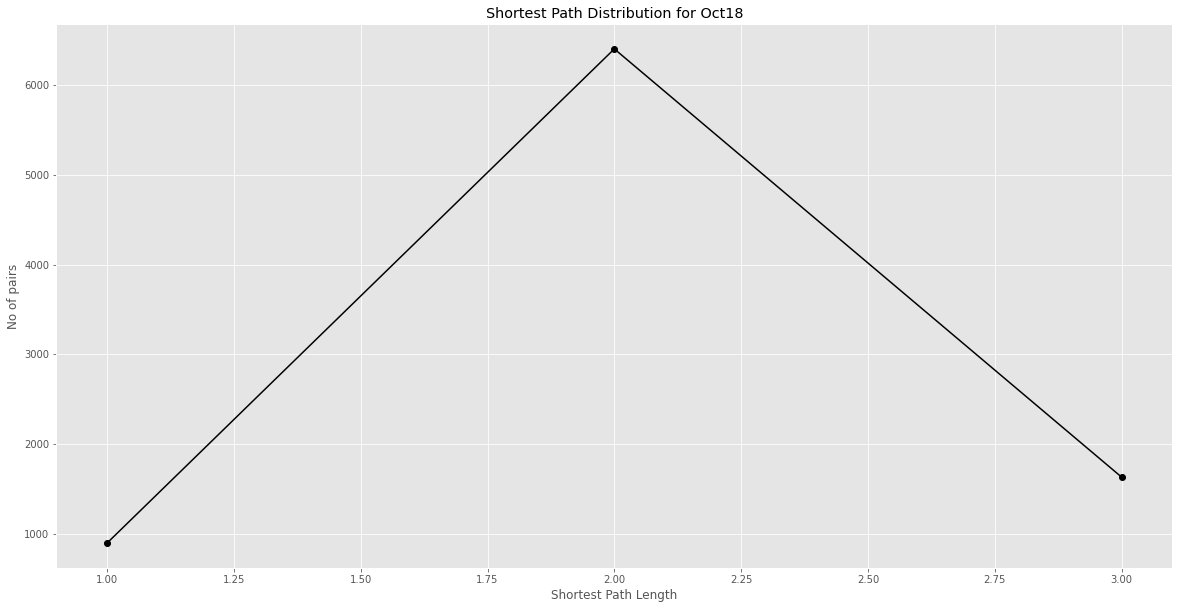



{1: 881, 2: 6074, 3: 1510}
Characteristic Path length for 1811  is  2.008579272477694


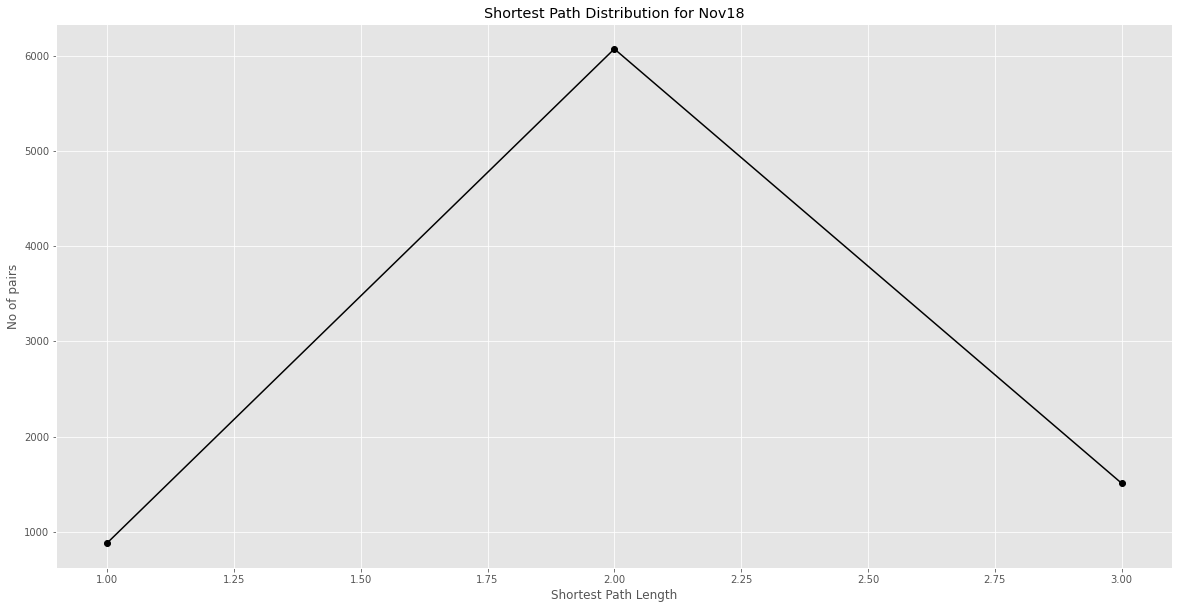



{1: 891, 2: 6326, 3: 1620}
Characteristic Path length for 1812  is  2.017872807017544


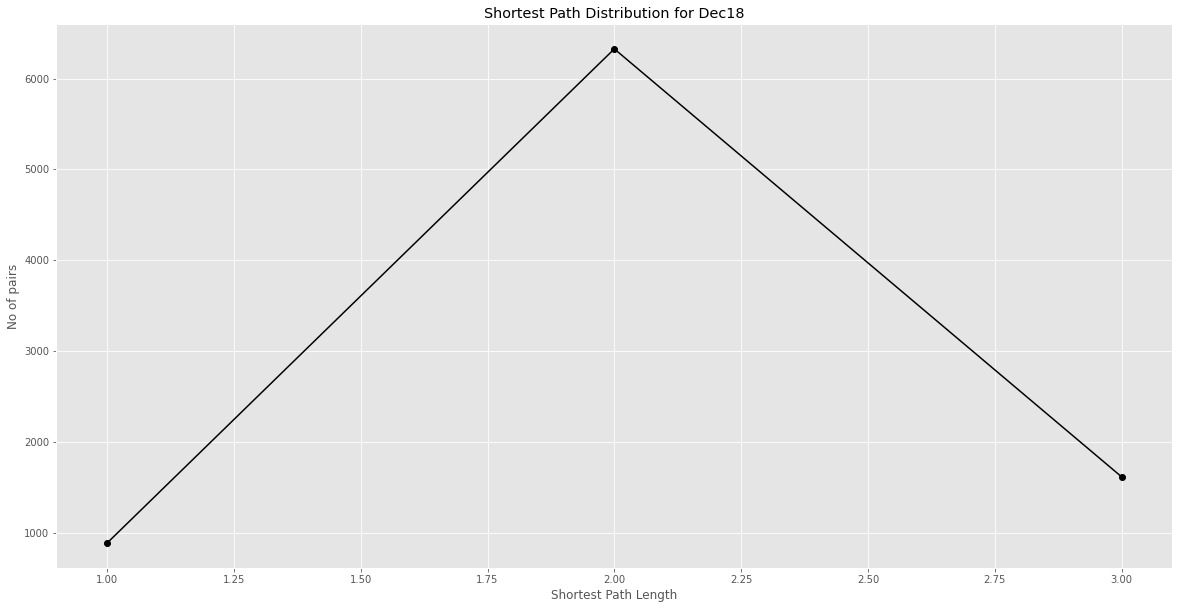



{1: 954, 2: 6648, 3: 1842, 4: 61, 5: 1}
Characteristic Path length for 1901  is  2.106564275194614


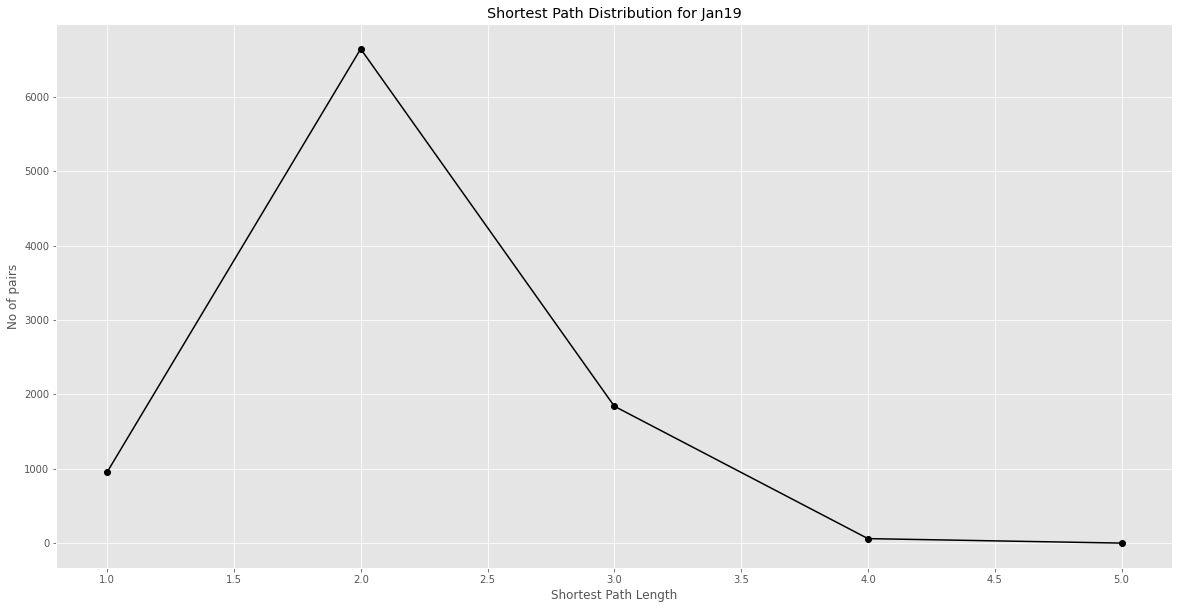



{1: 949, 2: 6393, 3: 1677, 4: 7}
Characteristic Path length for 1902  is  2.0182560137457046


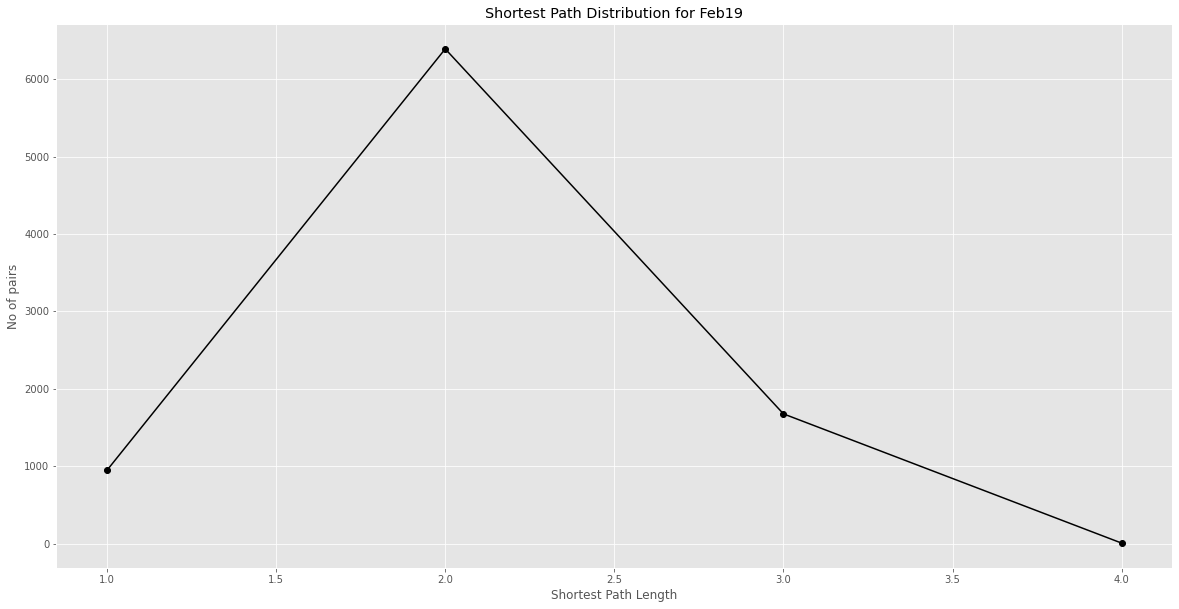



{1: 967, 2: 6584, 3: 1761}
Characteristic Path length for 1903  is  2.085266323024055


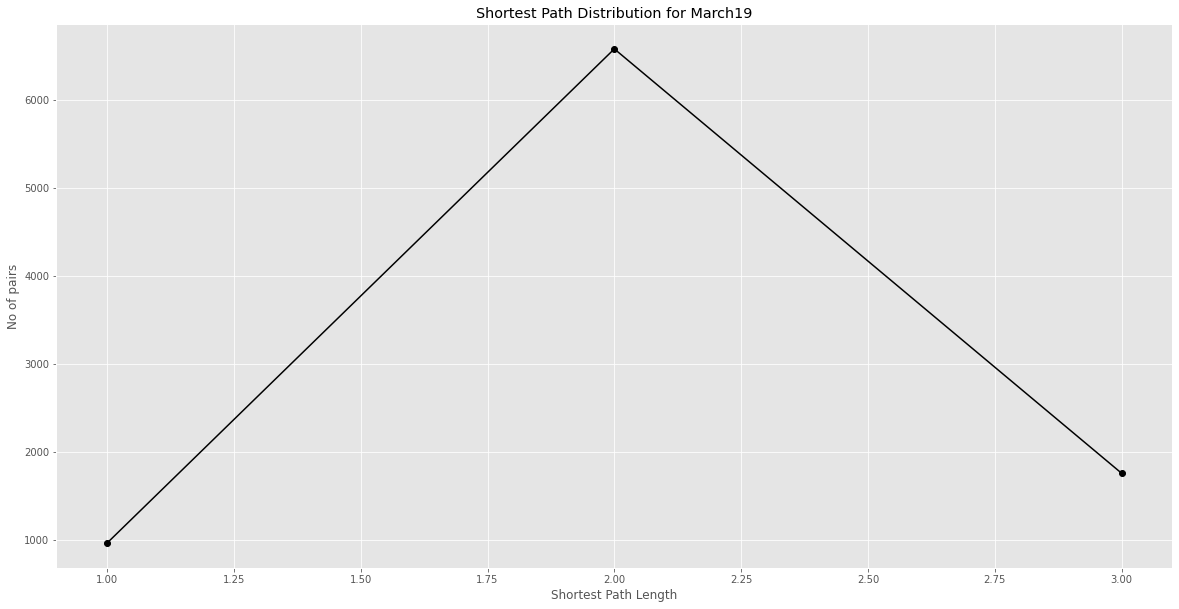



{1: 922, 2: 6586, 3: 1947, 4: 51}
Characteristic Path length for 1904  is  2.118556701030928


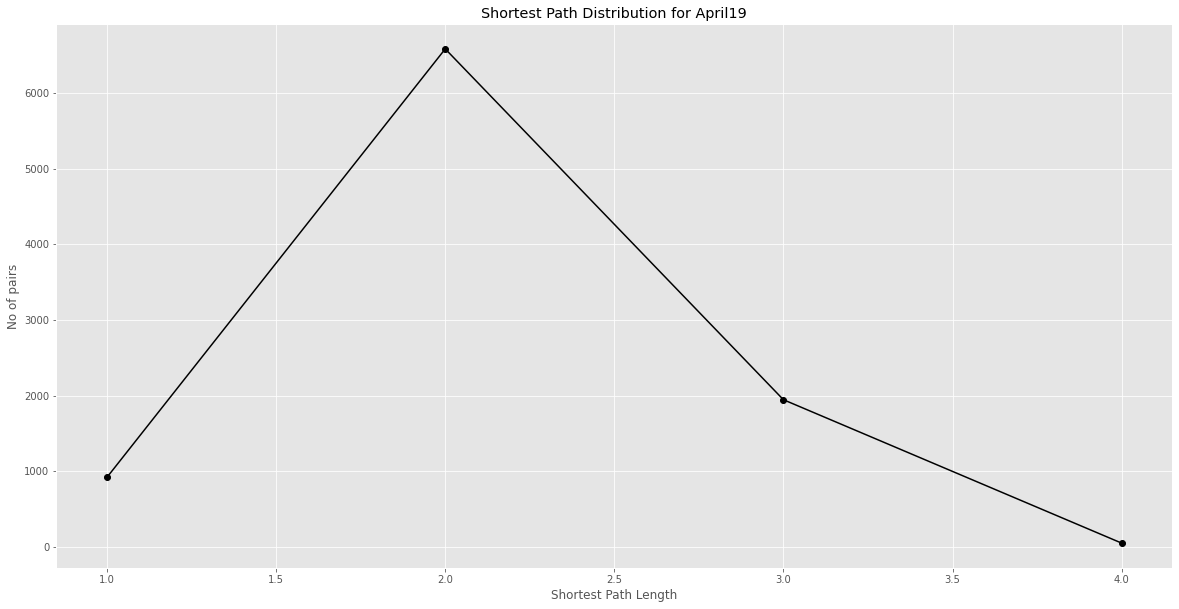



{1: 925, 2: 6610, 3: 1919, 4: 52}
Characteristic Path length for 1905  is  2.115505996212918


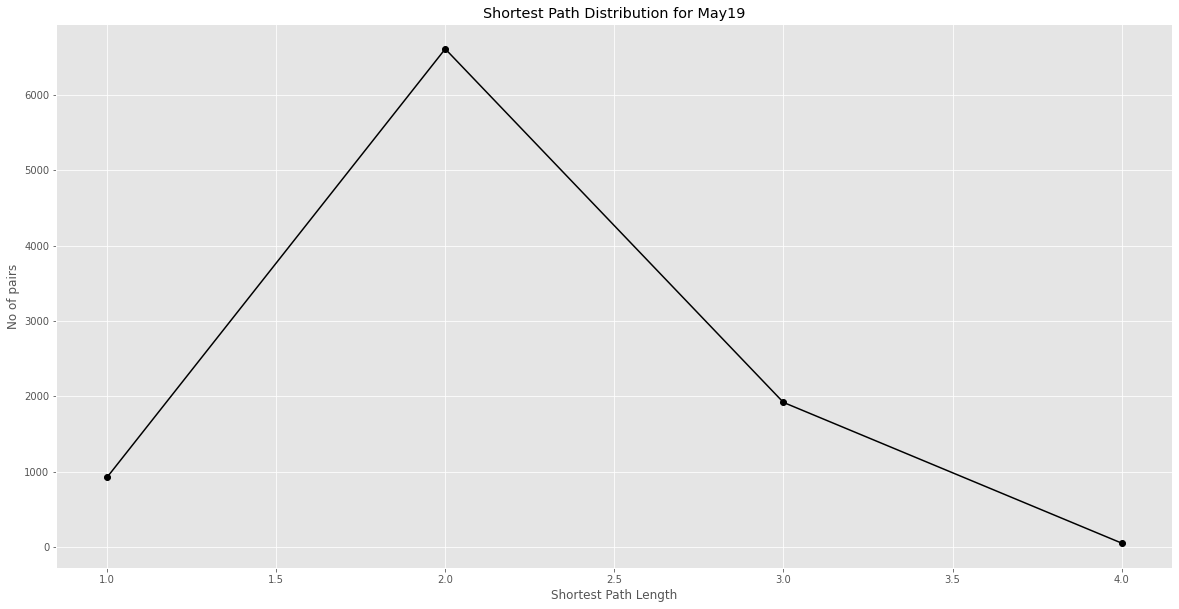



{1: 945, 2: 6528, 3: 1789, 4: 50}
Characteristic Path length for 1906  is  2.1013745704467355


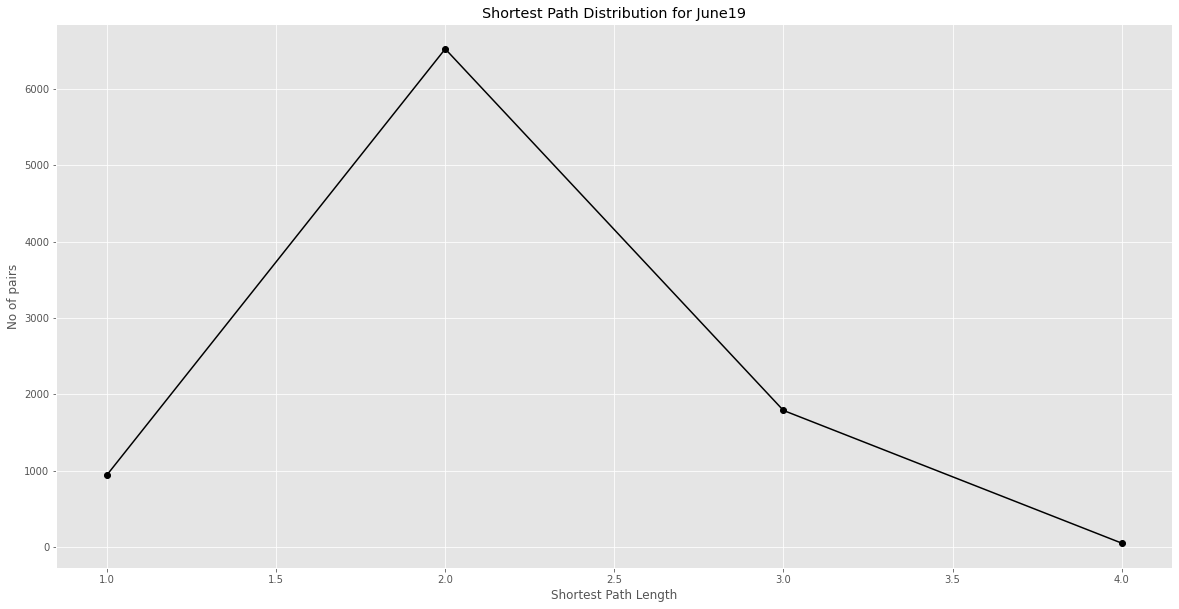



{1: 932, 2: 6494, 3: 1790}
Characteristic Path length for 1907  is  2.071520618556701


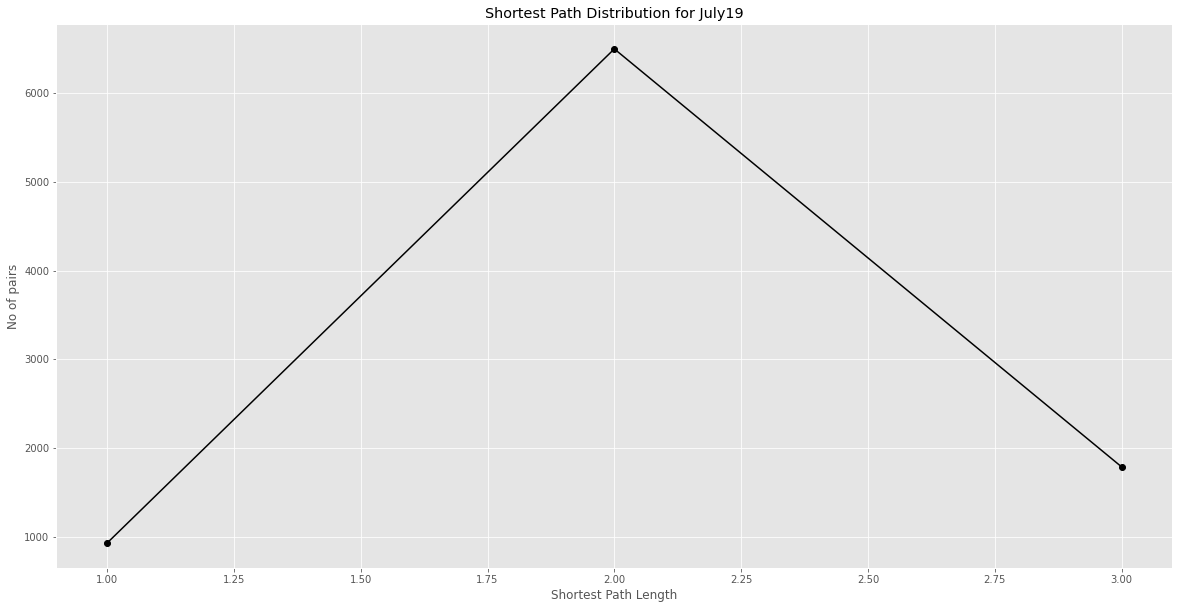



{1: 907, 2: 6584, 3: 1821}
Characteristic Path length for 1908  is  2.098152920962199


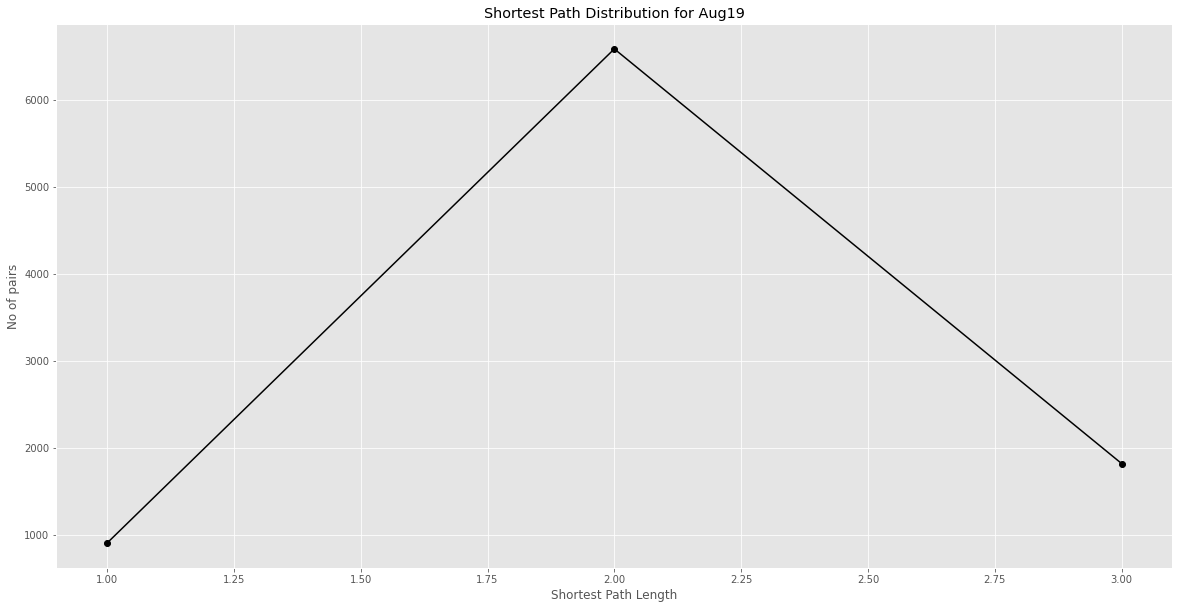



{1: 939, 2: 6830, 3: 1920, 4: 13}
Characteristic Path length for 1909  is  2.103793032364461


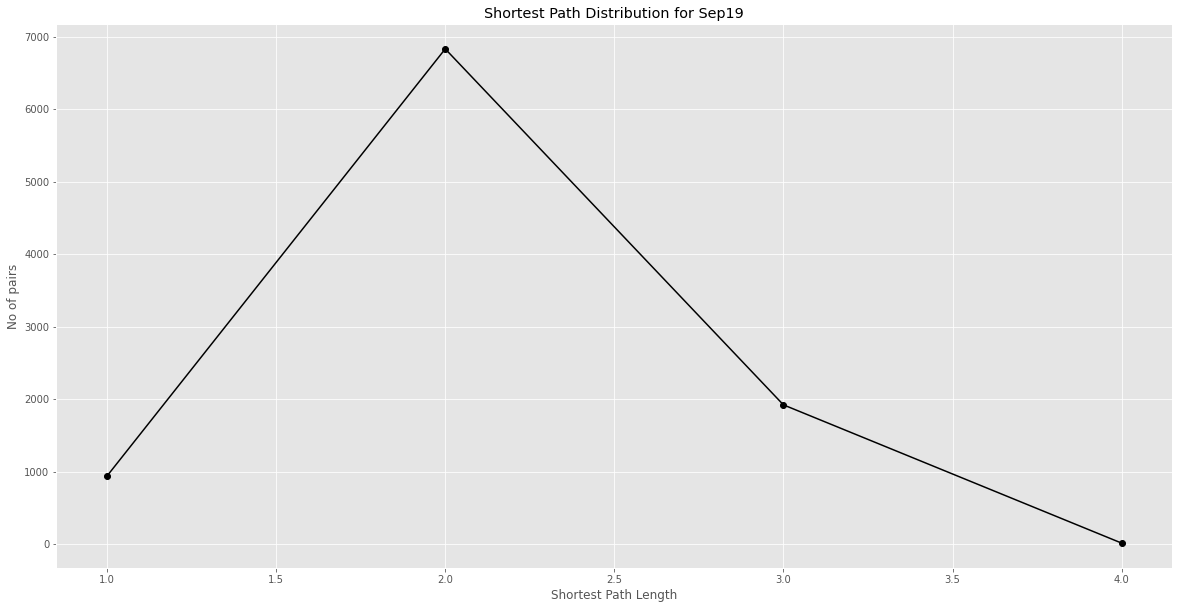



{1: 1025, 2: 6974, 3: 1729, 4: 171, 5: 1}
Characteristic Path length for 1910  is  2.105959595959596


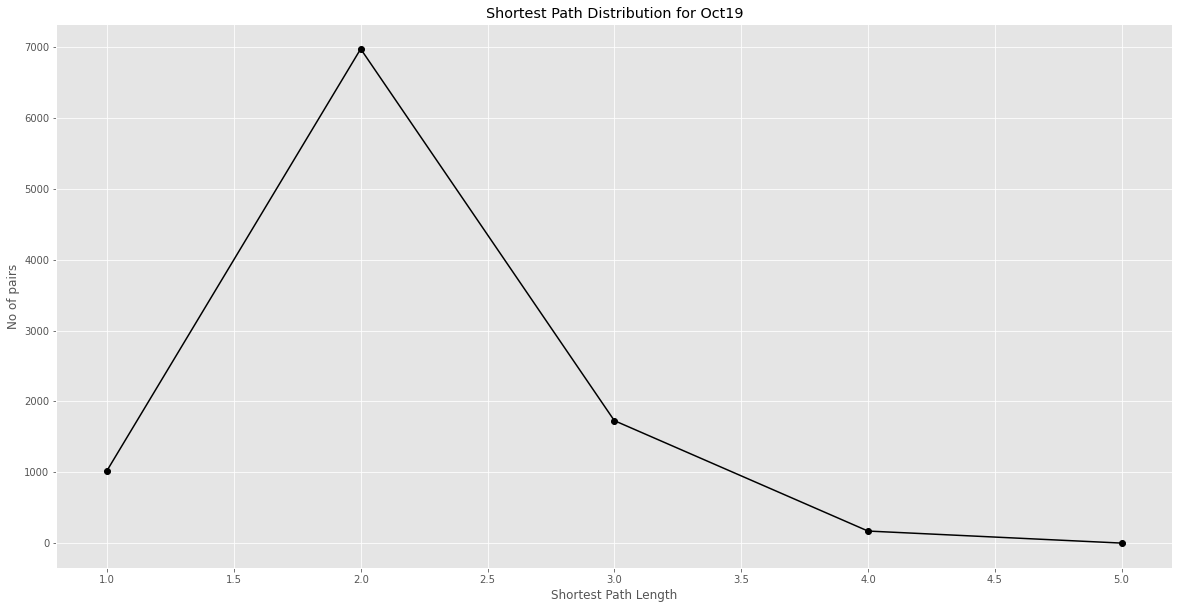



{1: 995, 2: 7084, 3: 1978, 4: 43}
Characteristic Path length for 1911  is  2.1058415841584157


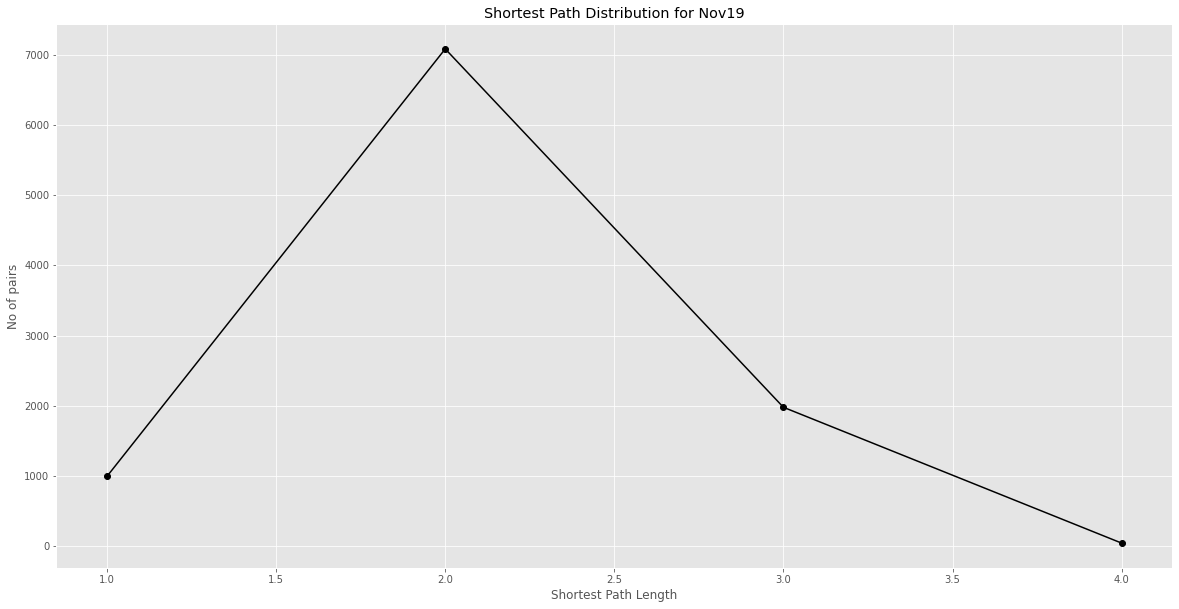



{1: 1005, 2: 7075, 3: 1977, 4: 43}
Characteristic Path length for 1912  is  2.104752475247525


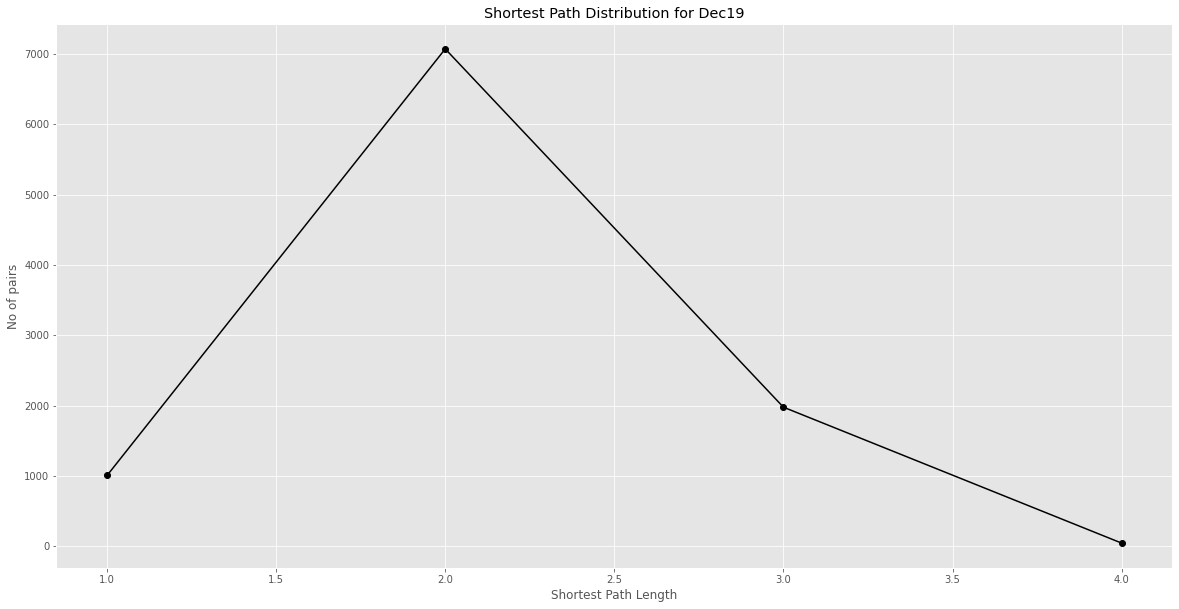



{1: 1008, 2: 7061, 3: 2186, 4: 47}
Characteristic Path length for 2001  is  2.1234711706464764


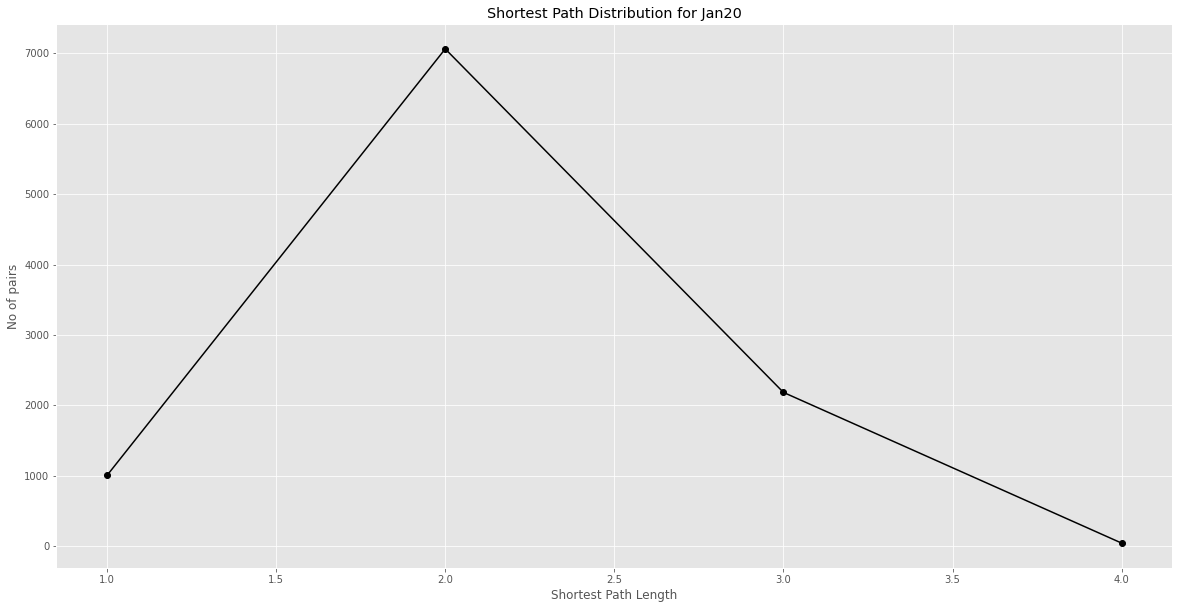



{1: 1017, 2: 7061, 3: 2177, 4: 47}
Characteristic Path length for 2002  is  2.1217239370995924


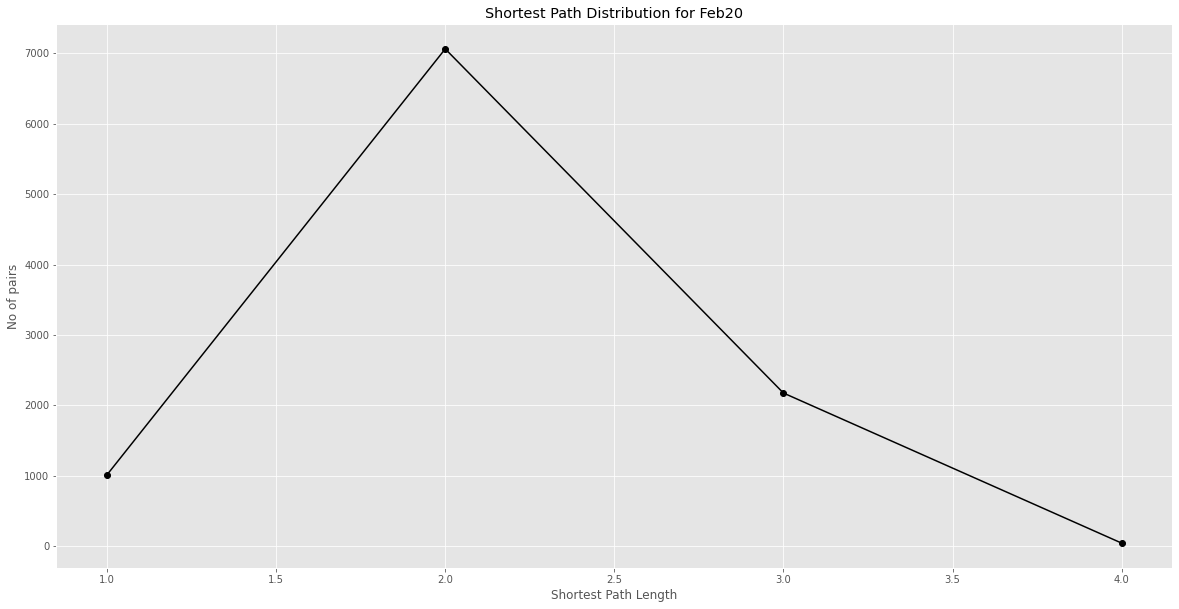



{1: 1033, 2: 7099, 3: 2327, 4: 47}
Characteristic Path length for 2003  is  2.132114981915096


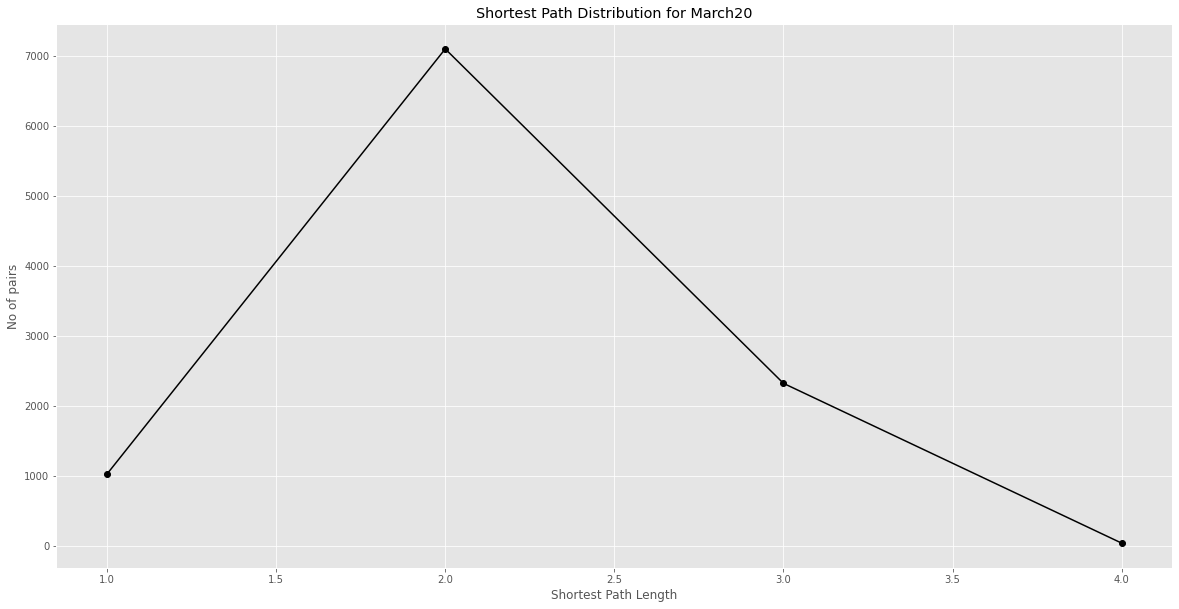



{}
Characteristic Path length for 2004  can't be defined


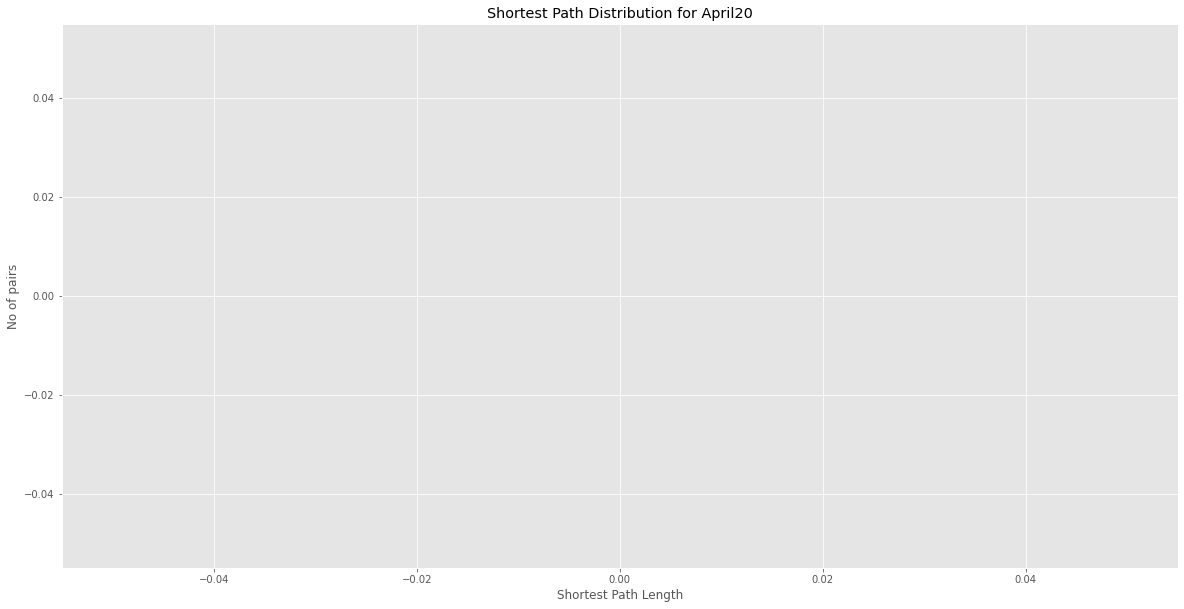



{1: 391, 2: 3617, 3: 2204, 4: 185, 5: 2}
Characteristic Path length for 2005  is  2.256398675097862


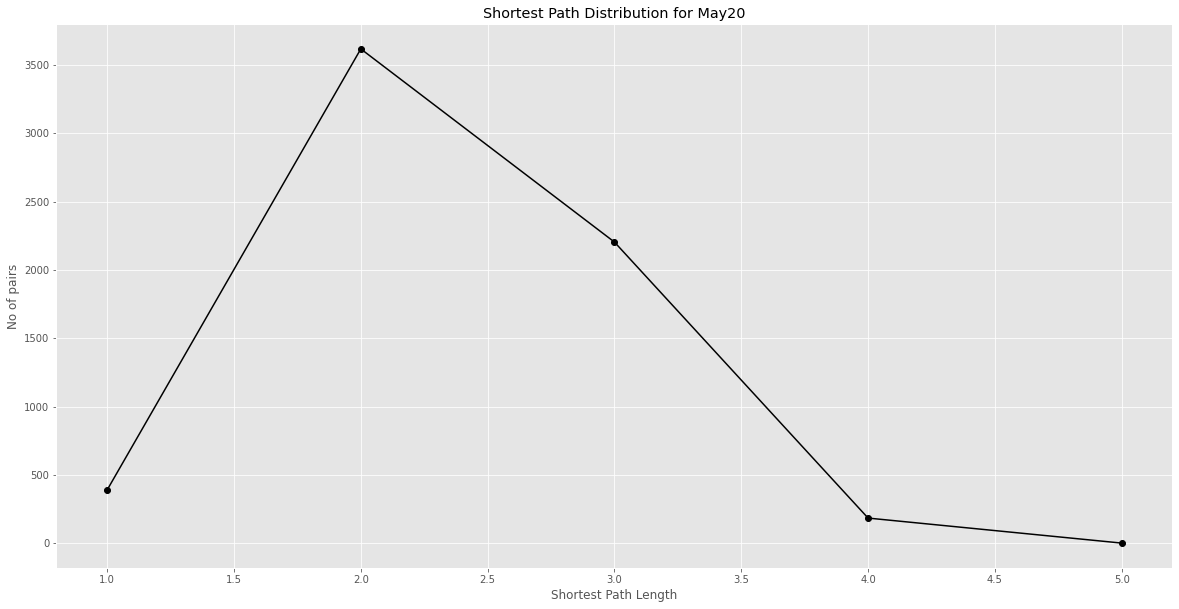



{1: 574, 2: 4600, 3: 2444, 4: 181, 5: 34}
Characteristic Path length for 2006  is  2.247191011235955


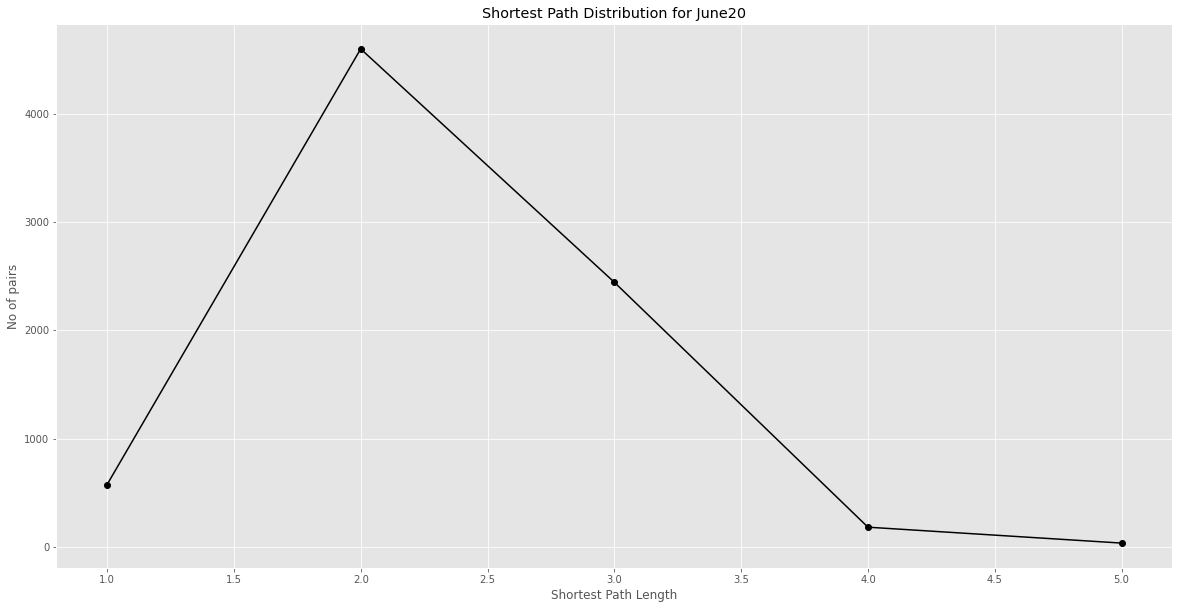



{1: 621, 2: 5319, 3: 2234, 4: 16}
Characteristic Path length for 2007  is  2.153010033444816


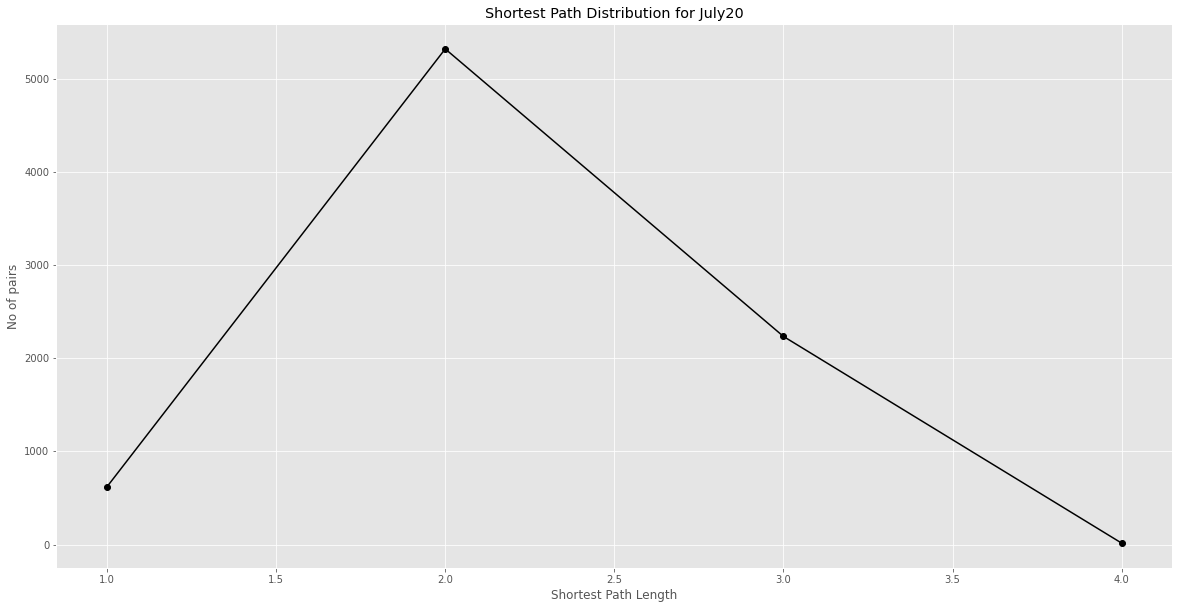



{1: 684, 2: 5330, 3: 1973, 4: 111, 5: 2}
Characteristic Path length for 2008  is  2.163247863247863


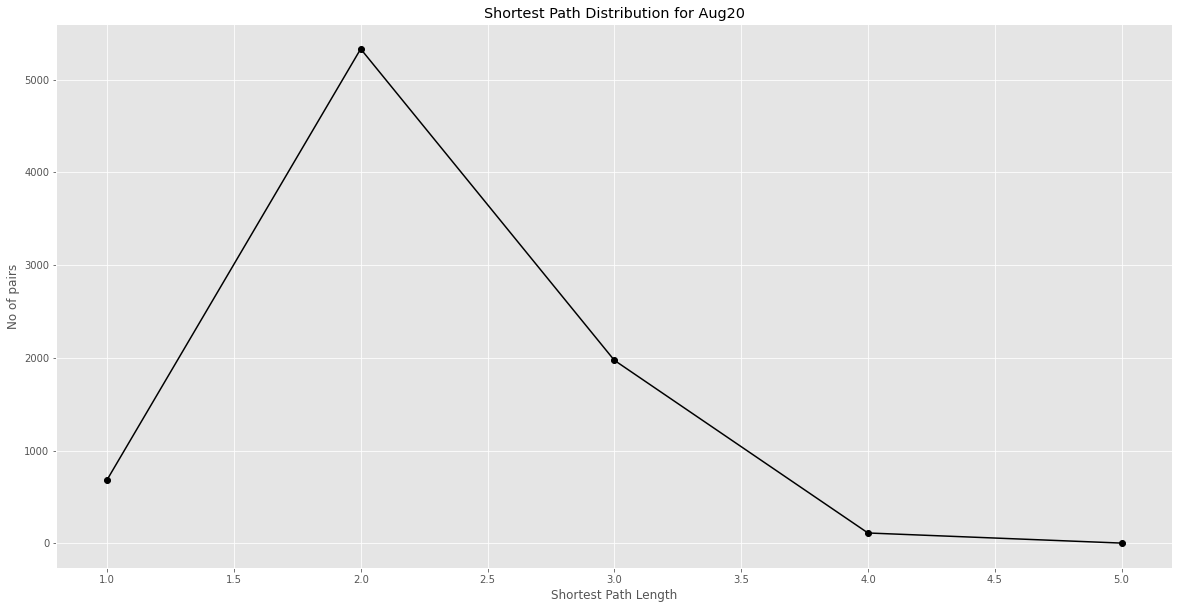



{1: 787, 2: 5909, 3: 1820, 4: 40}
Characteristic Path length for 2009  is  2.130084151472651


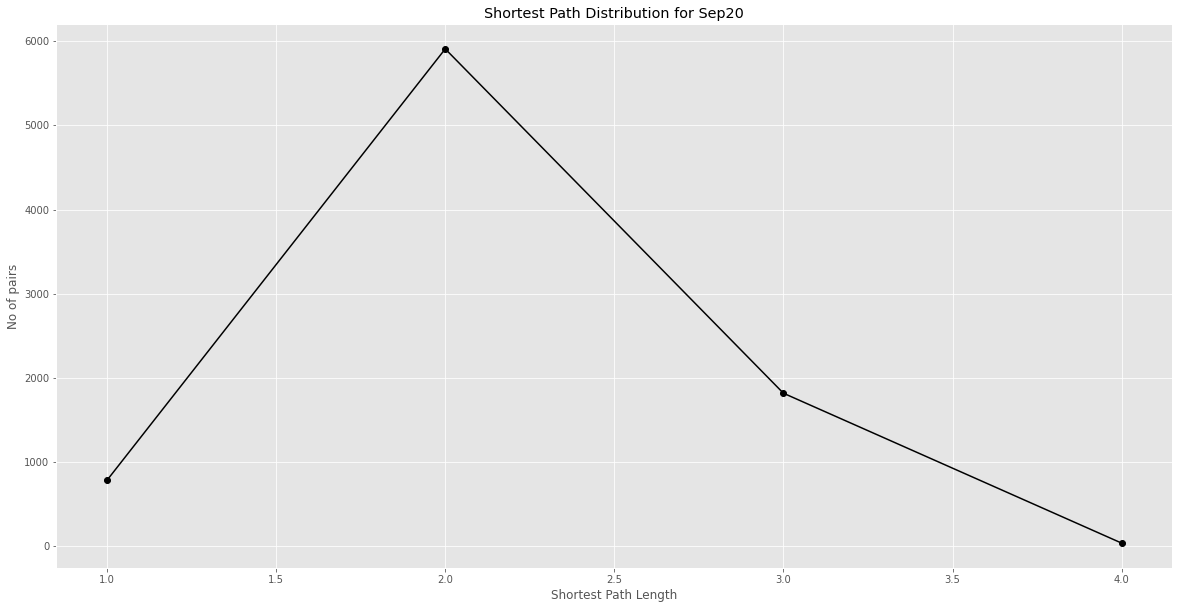



{1: 830, 2: 6286, 3: 1912, 4: 91, 5: 1}
Characteristic Path length for 2010  is  2.138925438596491


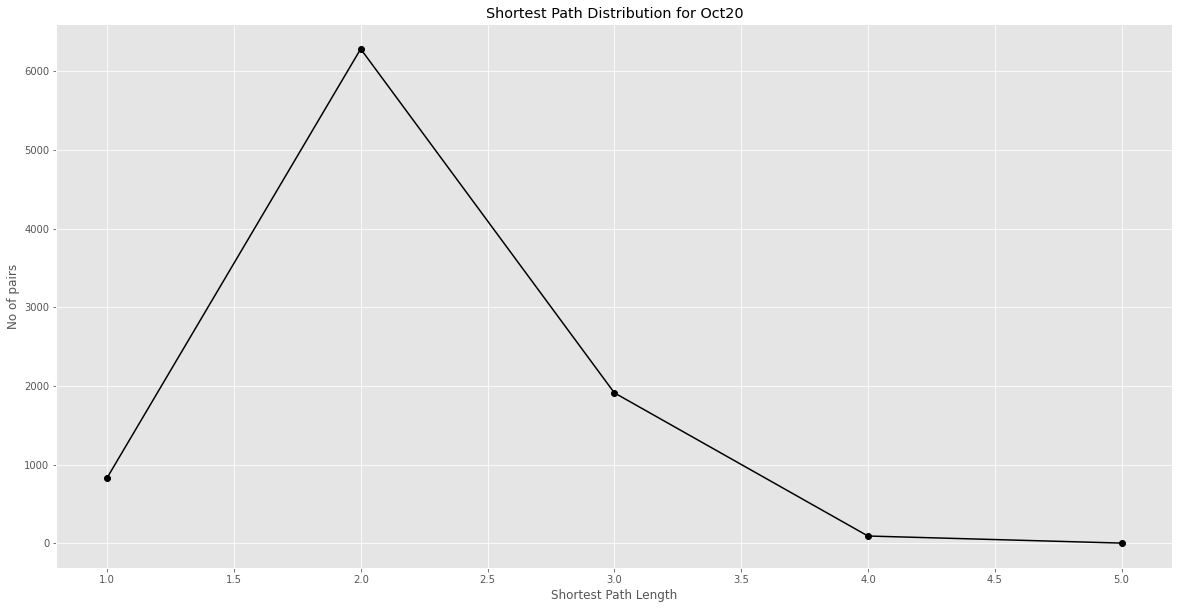



{1: 845, 2: 6713, 3: 1852, 4: 95, 5: 1}
Characteristic Path length for 2011  is  2.1262360614348834


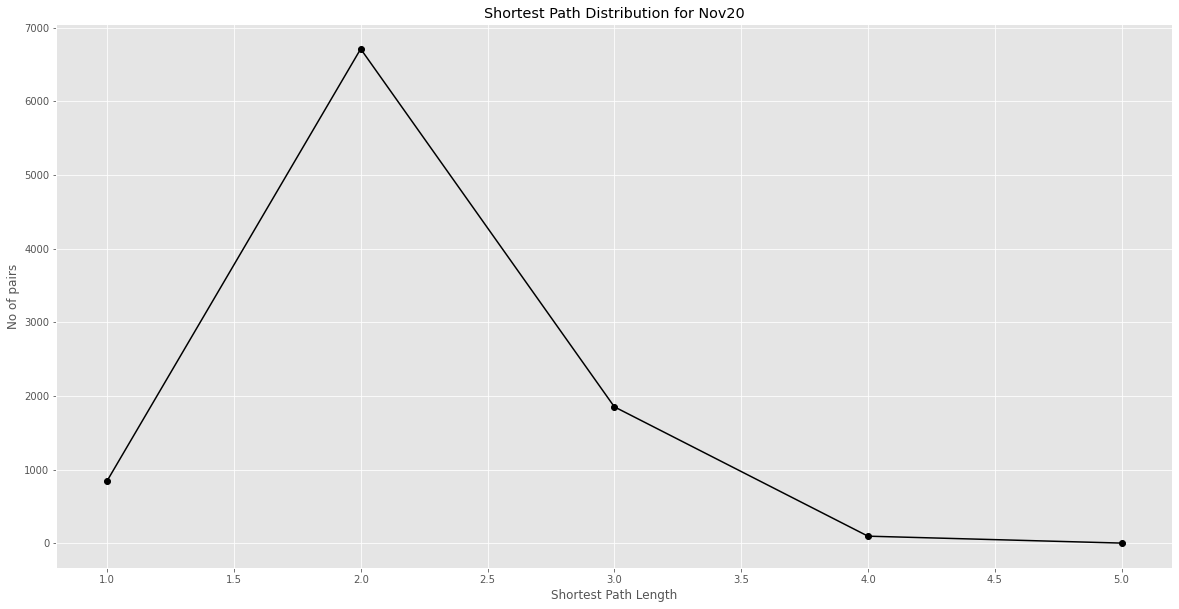



{1: 904, 2: 6815, 3: 1697, 4: 89, 5: 1}
Characteristic Path length for 2012  is  2.1024616031979804


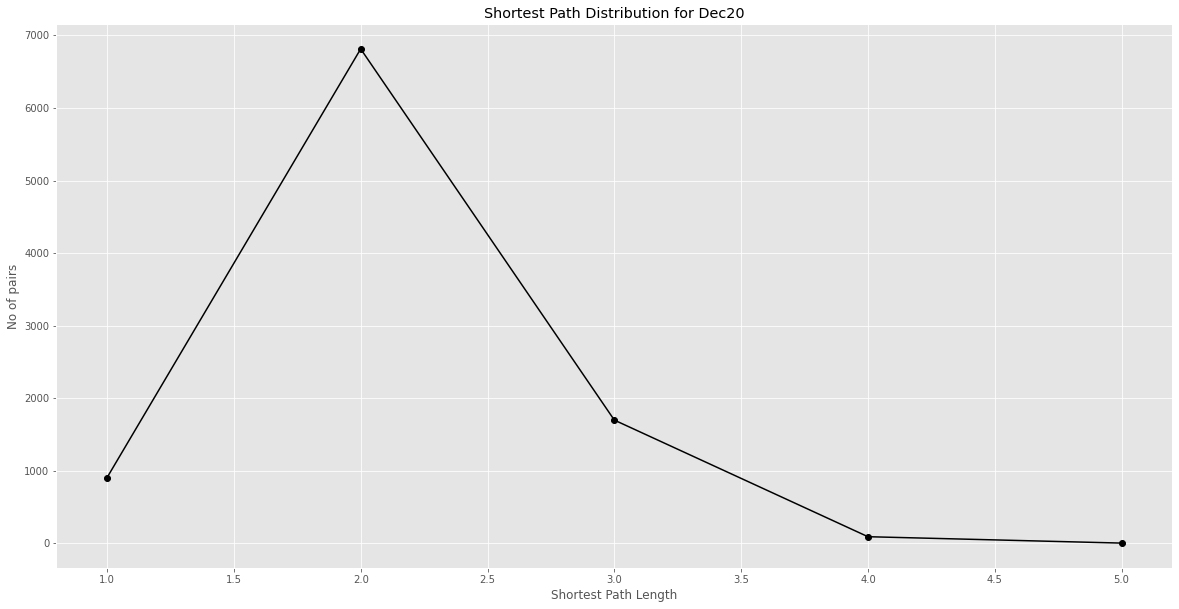

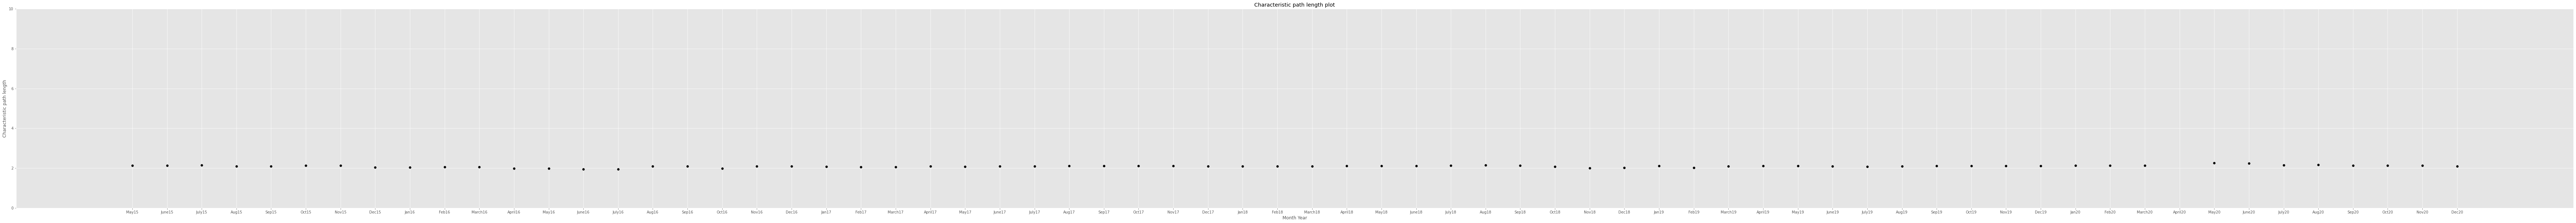

6930

In [39]:
char_path_len_list = []

for i in range(len(graphs)):
    G = graphs[i]
    d_shortest_path = {}
    all_pairs = (nx.all_pairs_shortest_path_length(G,cutoff=None))
    for pair in all_pairs:
#         print(len(pair[1]))
        for dist in pair[1].values():
            if dist != 0:
                if dist in d_shortest_path:
                    d_shortest_path[dist] += 1
                else:
                    d_shortest_path[dist] = 1
                
    print(d_shortest_path)
#     print(sum(d_shortest_path.values()))
    try:
        char_path_len_list.append(nx.average_shortest_path_length(G))
        print("Characteristic Path length for",lbls[i]," is ",char_path_len_list[-1])
#         print("Characteristic Path length for",lbls[i]," is ",nx.average_shortest_path_length(G)) 
    except:
        char_path_len_list.append(None)
        print("Characteristic Path length for",lbls[i]," can't be defined")
        
    plt.figure()
    plt.title("Shortest Path Distribution for " + lbls1[i])
    plt.xlabel("Shortest Path Length")
    plt.ylabel("No of pairs")
    plt.plot(d_shortest_path.keys(),d_shortest_path.values(), color="black",  marker="o")

    plt.savefig('Output_Files/matplotlib/Shortest_Path_Dist/ ' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close()
    print("\n")
    gc.collect()

plt.figure(figsize = (125, 10))
plt.title("Characteristic path length plot")
plt.xlabel("Month Year")
plt.ylabel("Characteristic path length")
plt.ylim(0,10)
plt.scatter(lbls1, char_path_len_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Characteristic path length')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



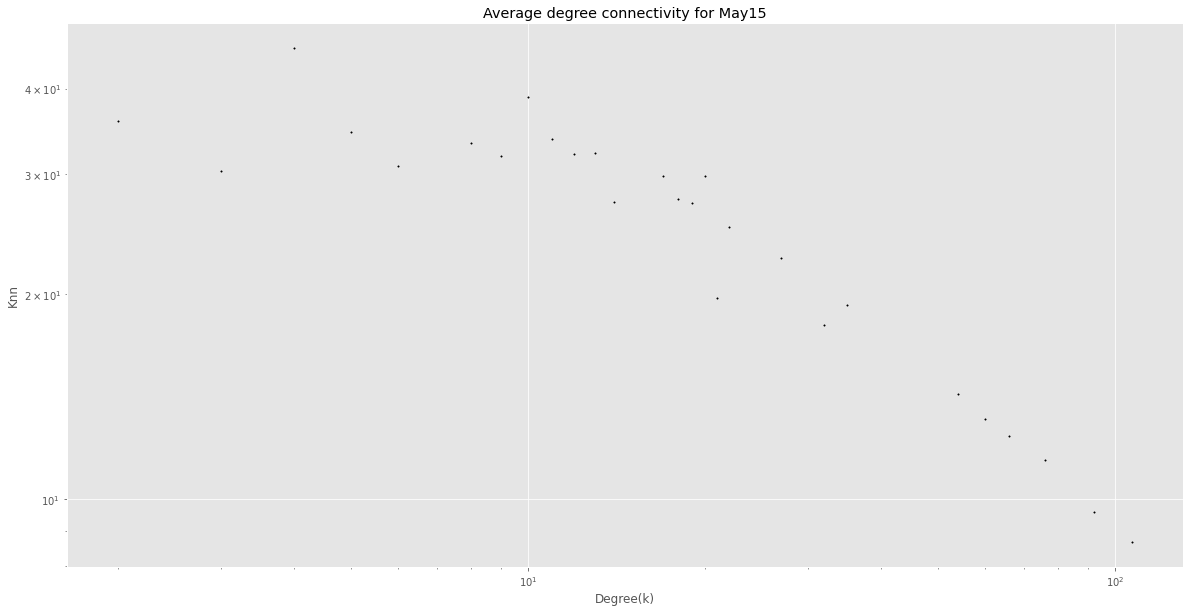

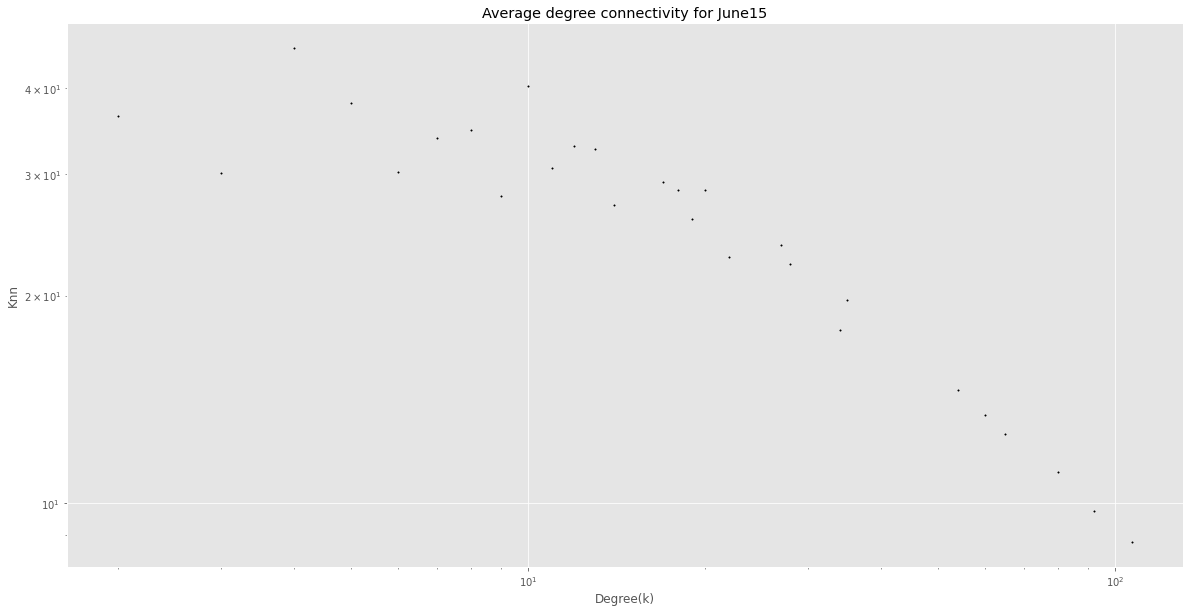

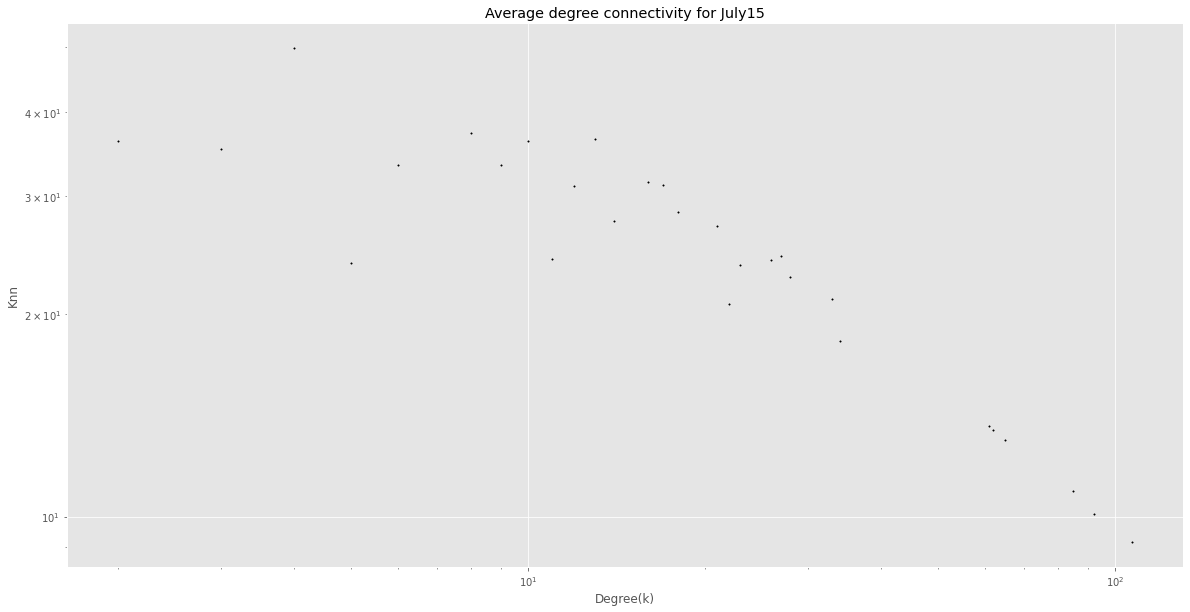

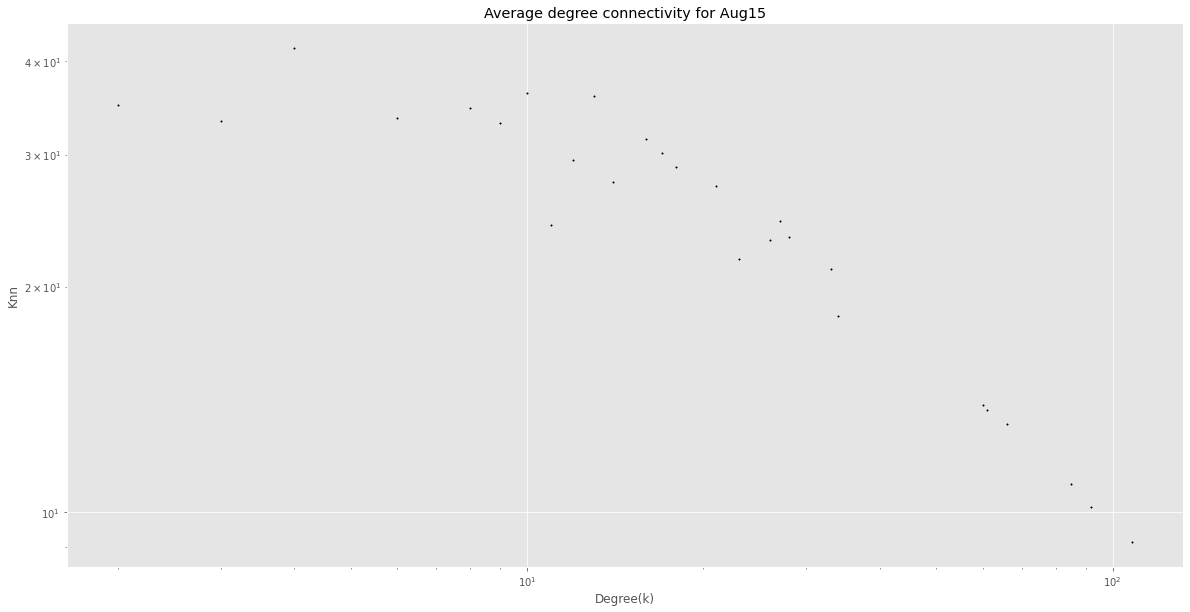

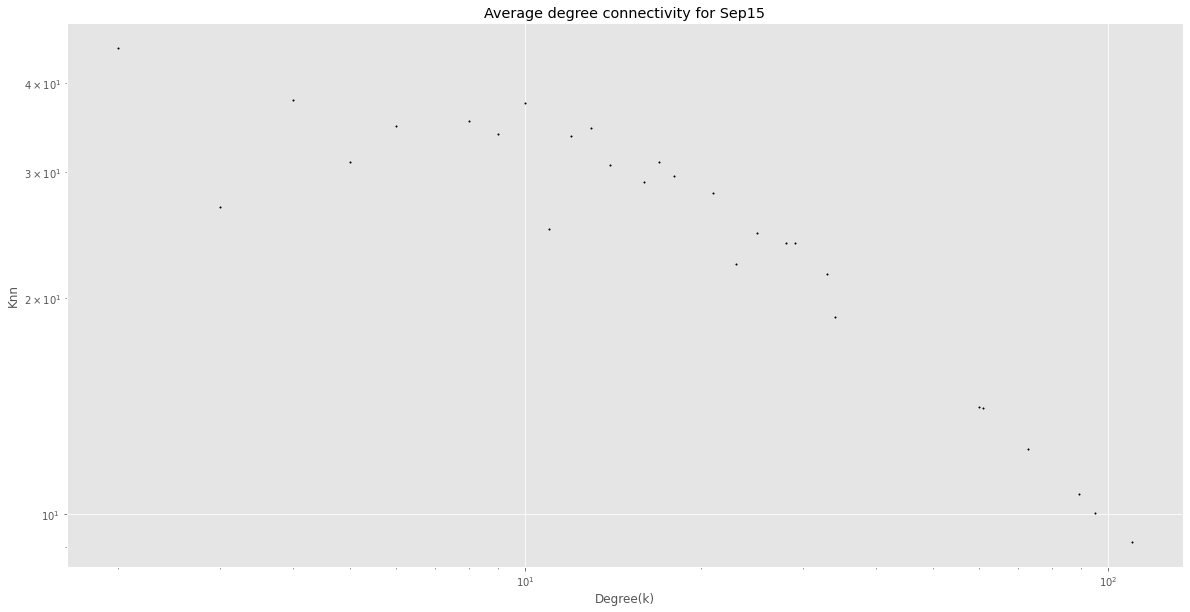

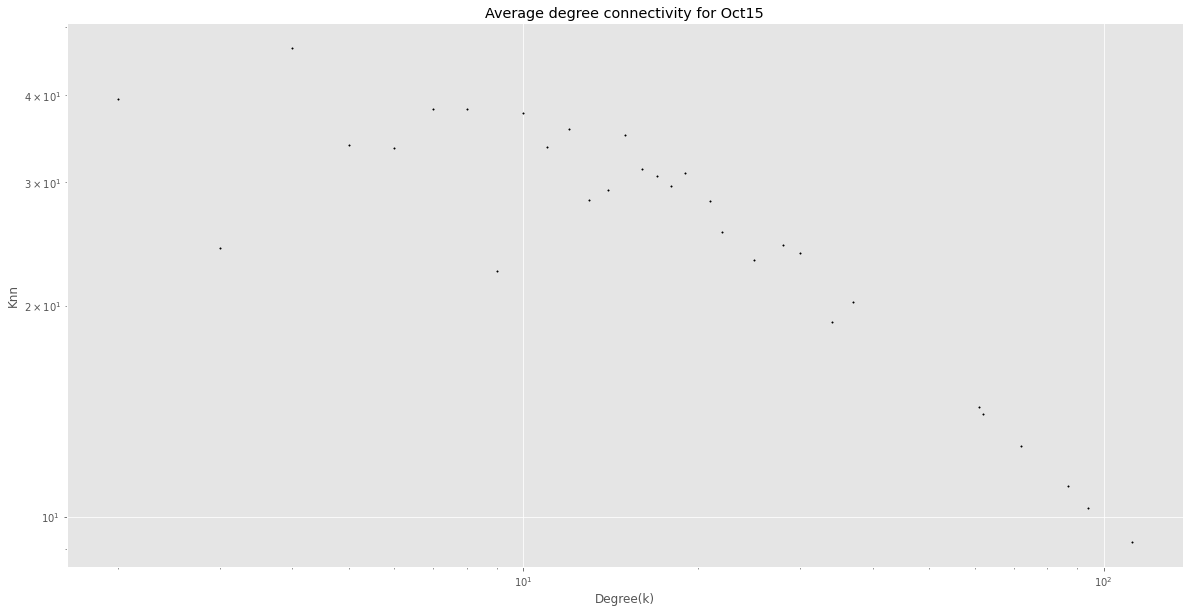

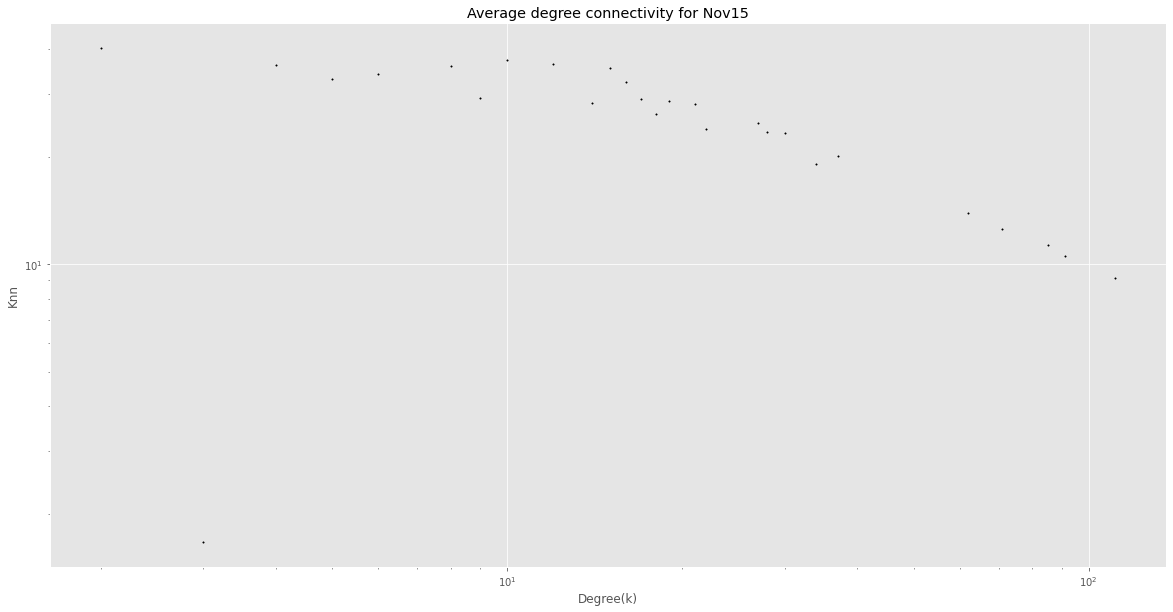

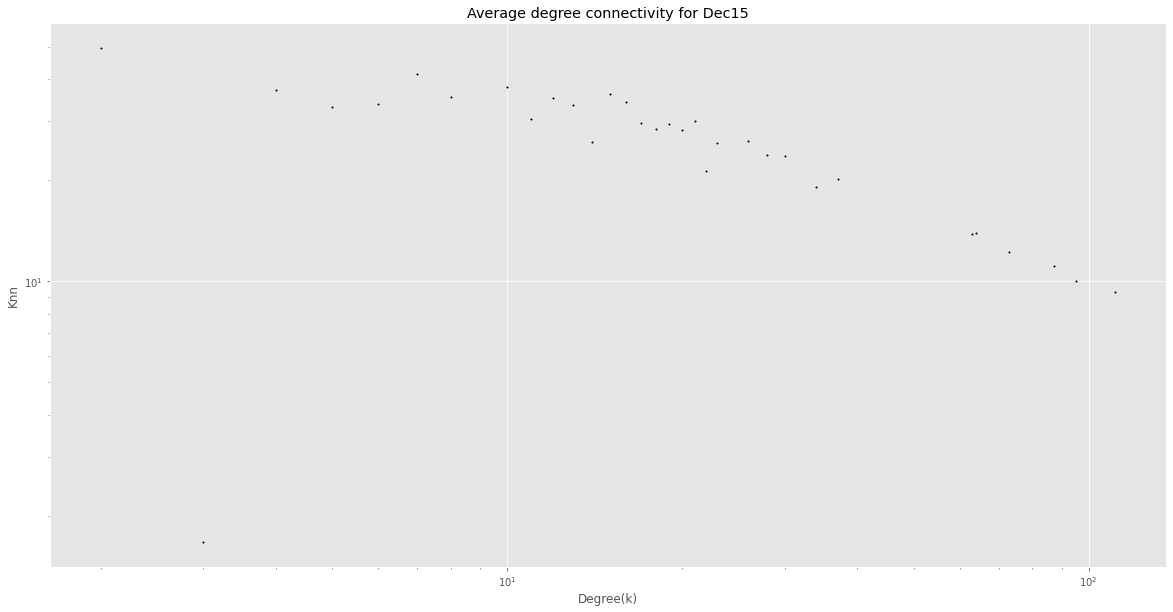

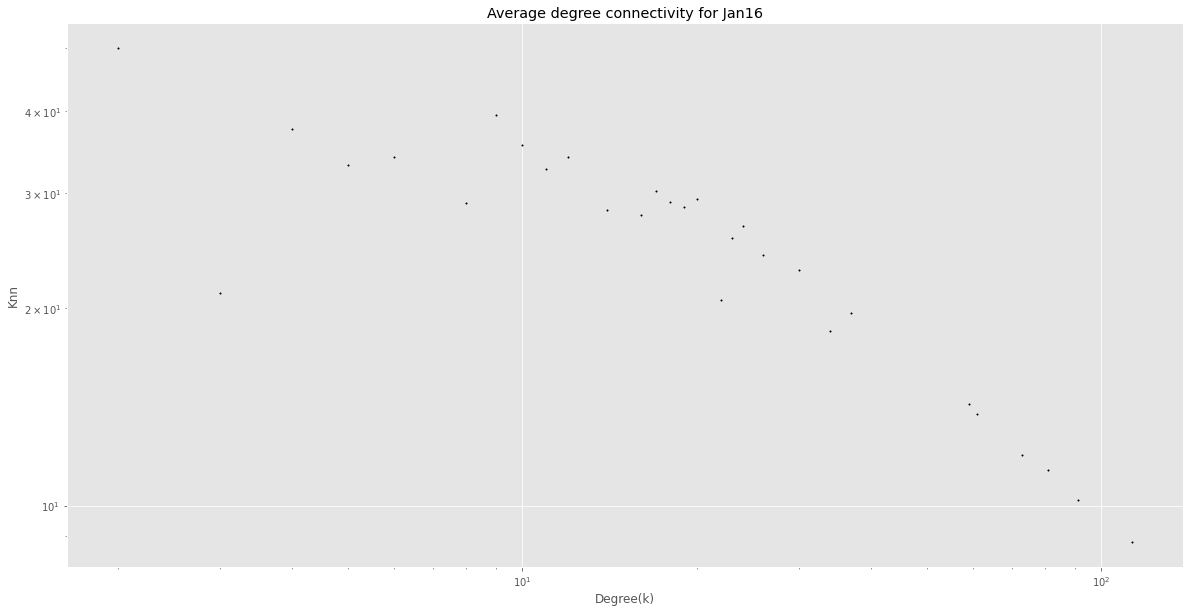

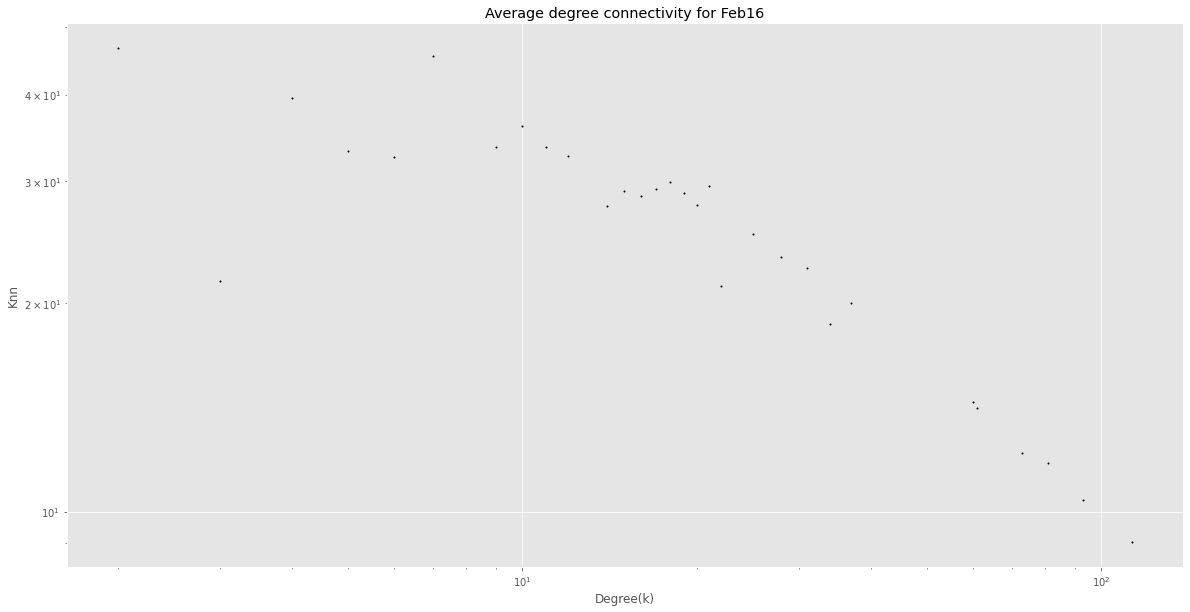

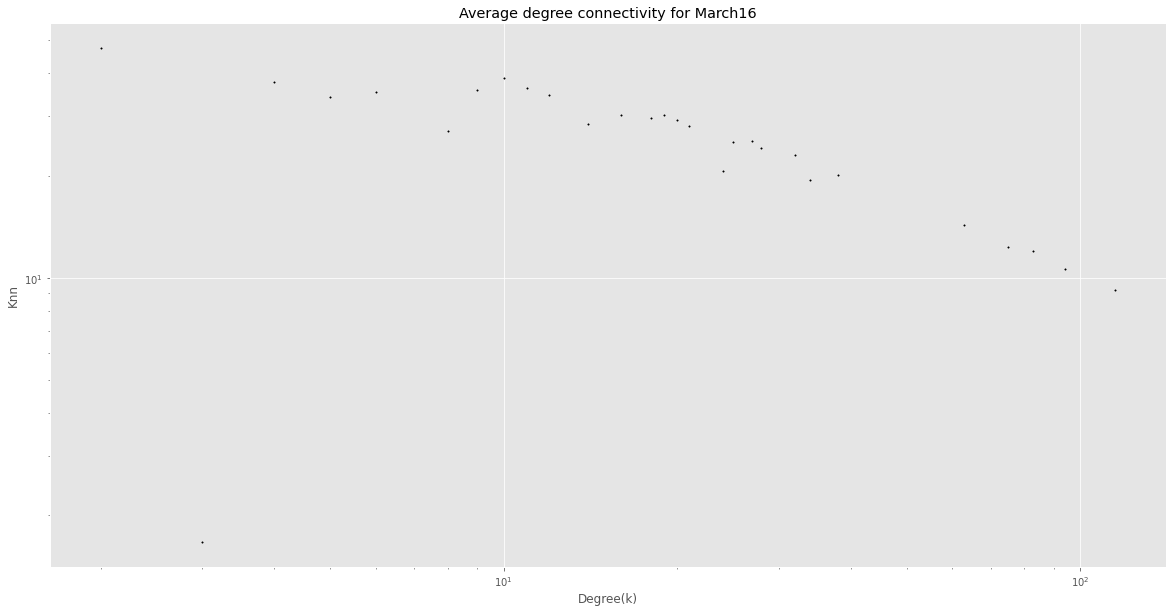

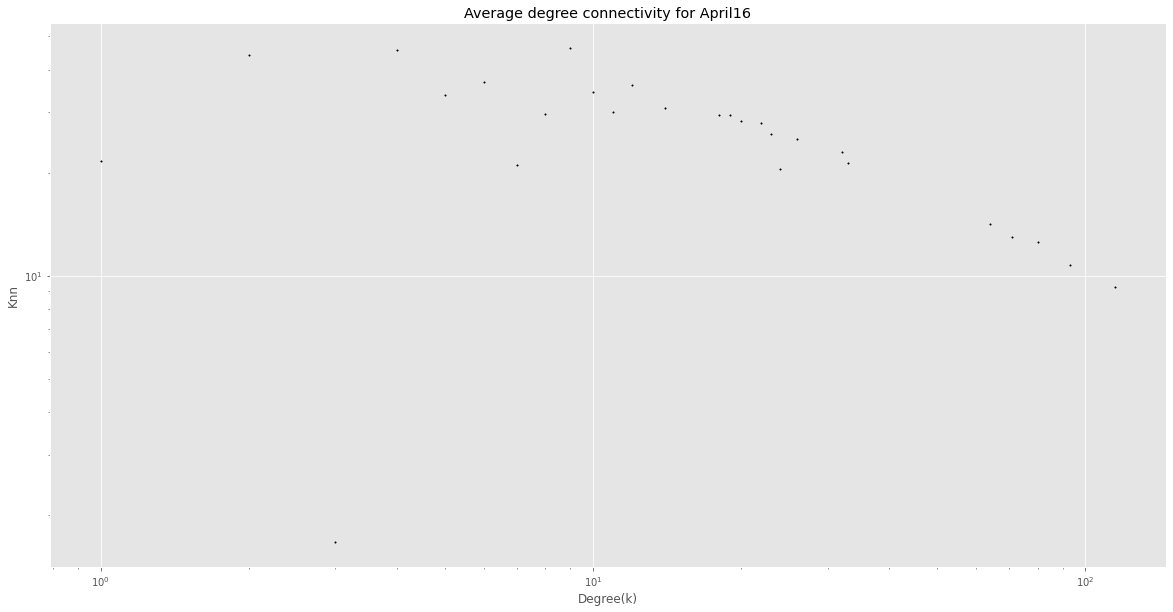

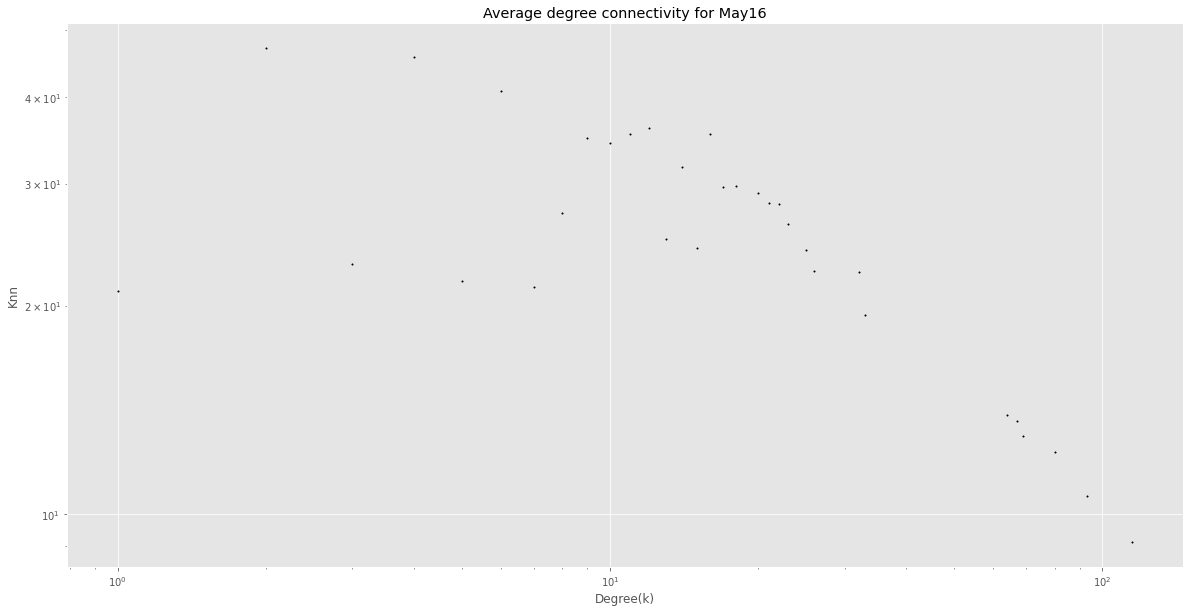

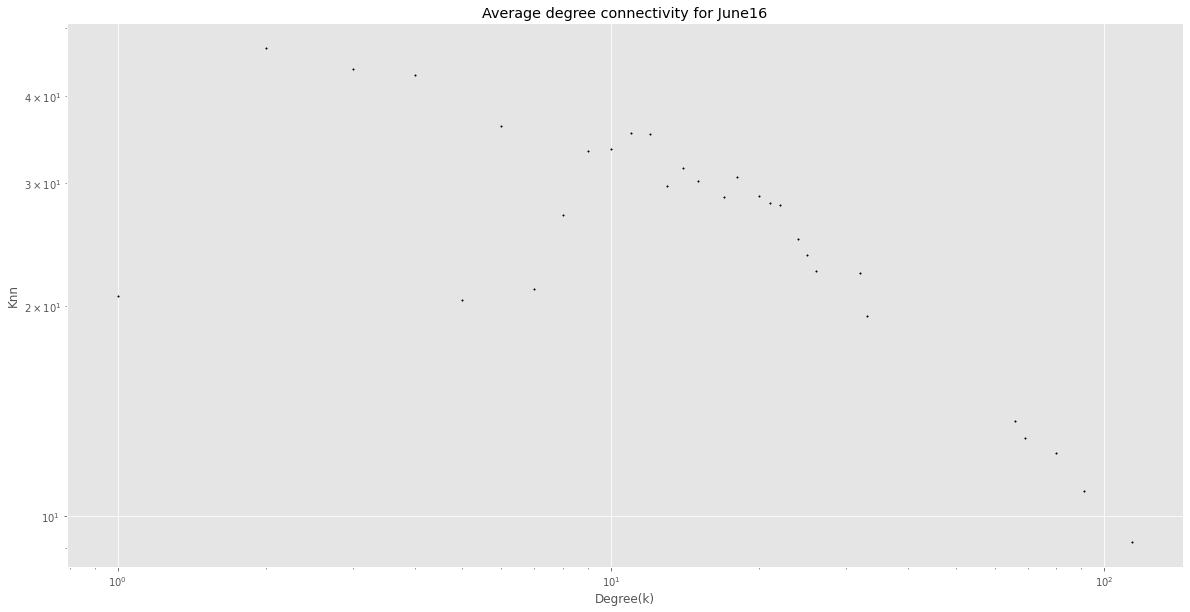

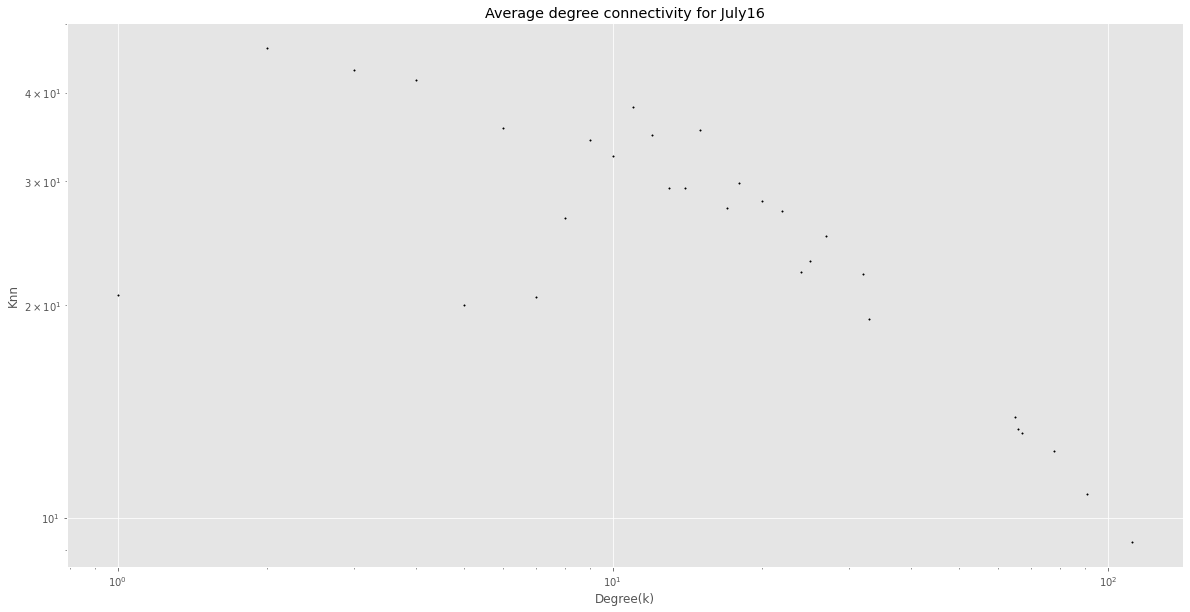

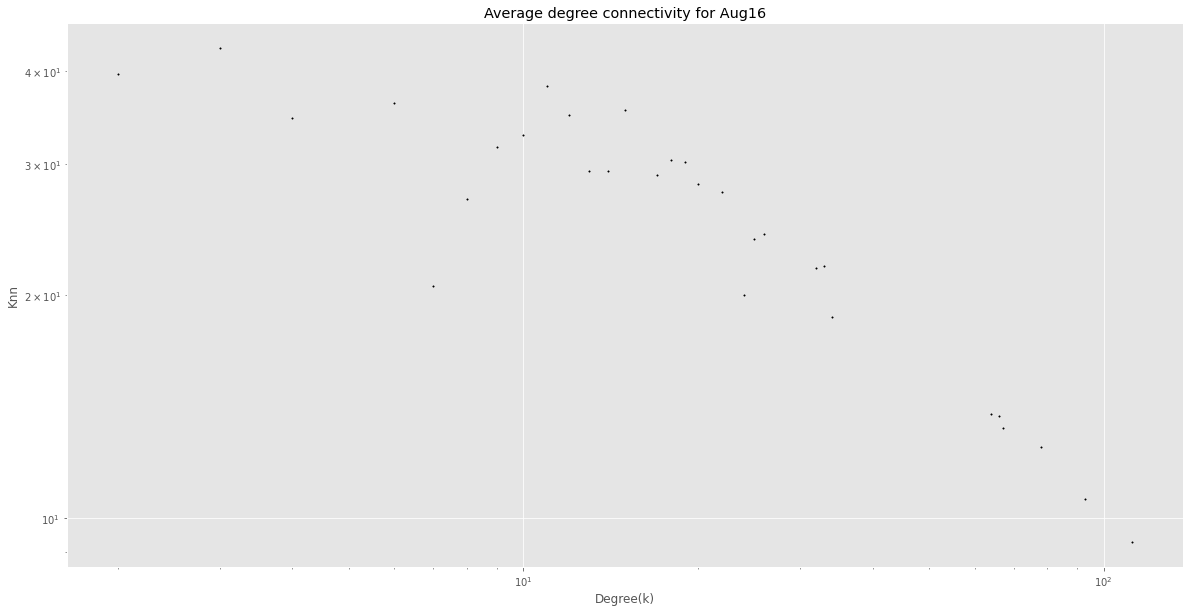

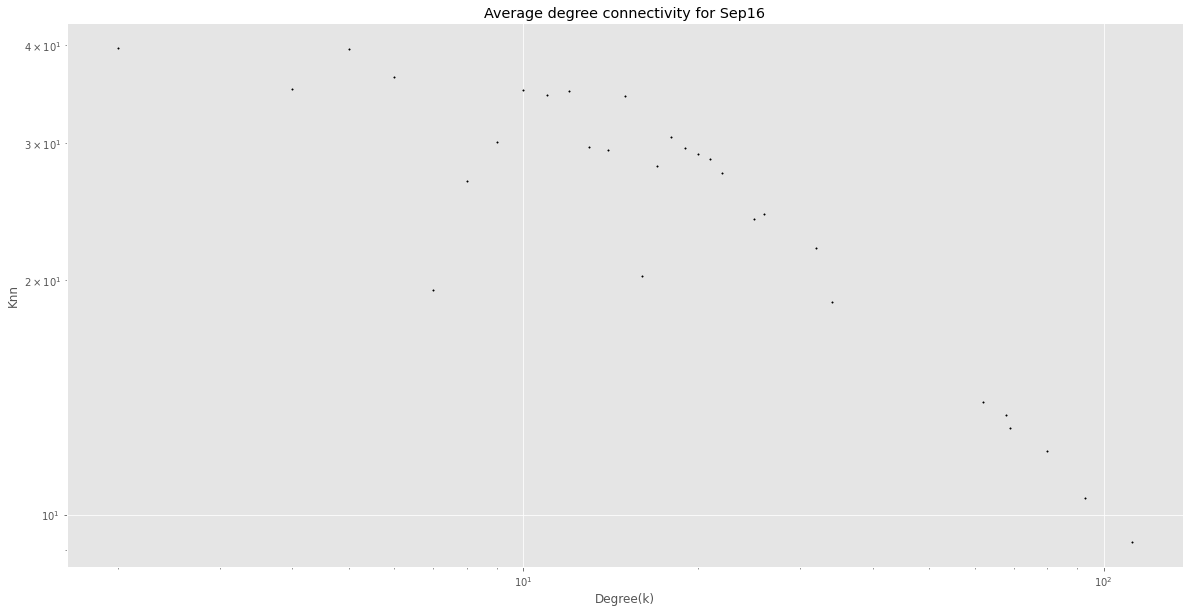

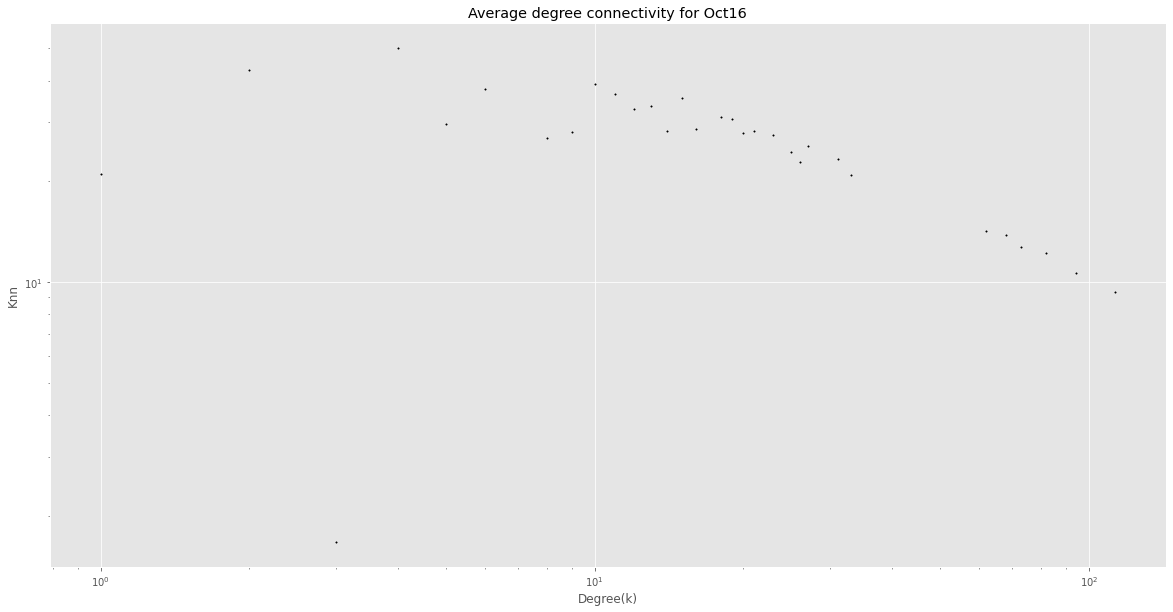

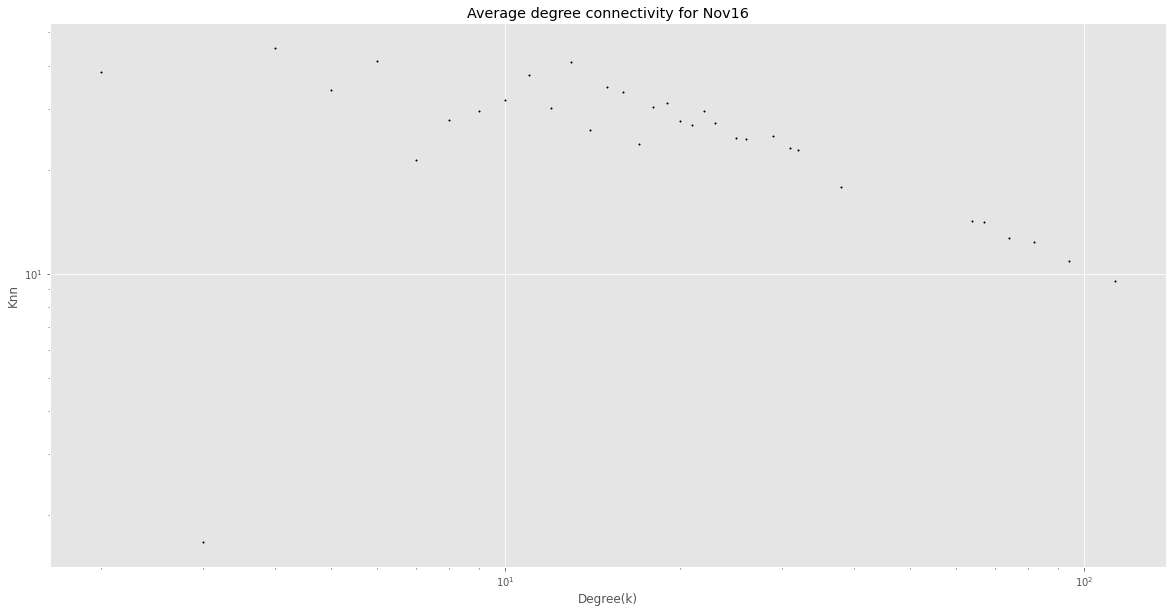

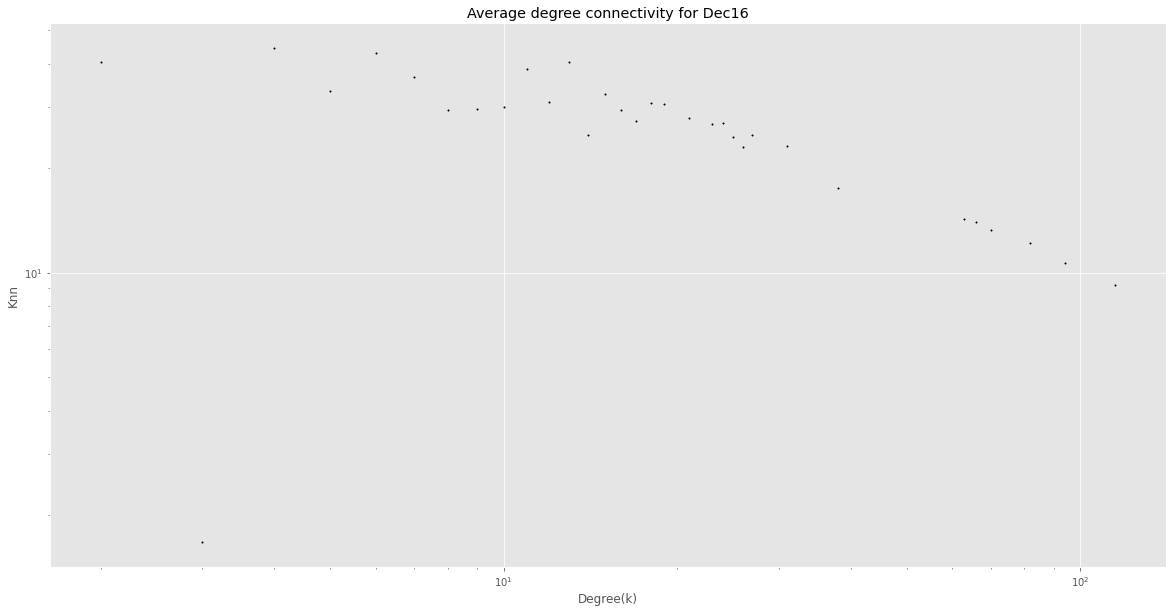

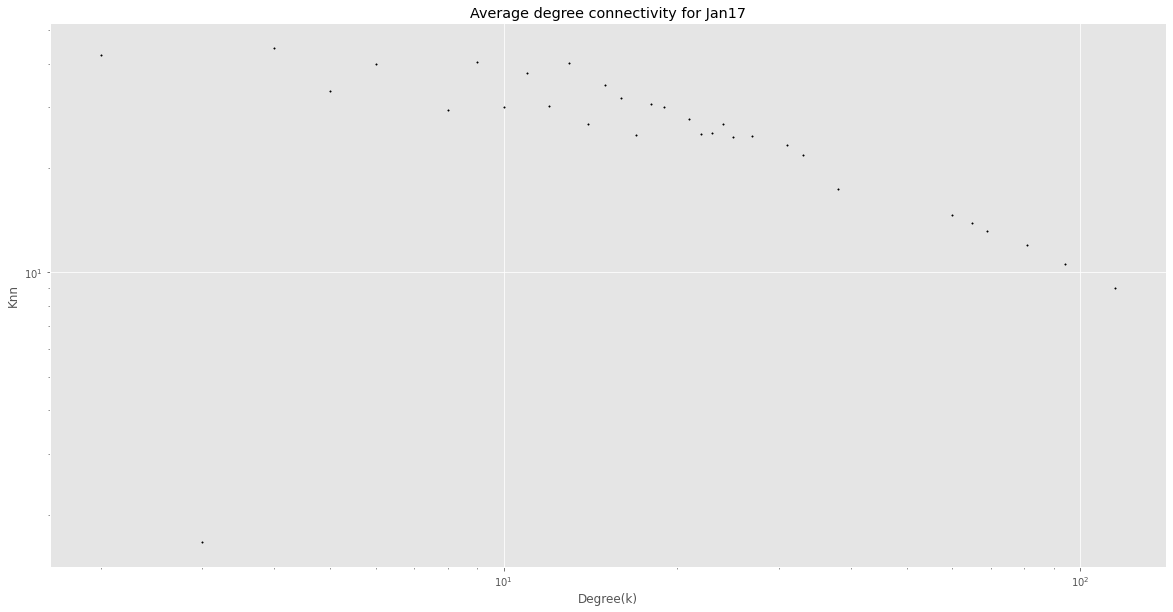

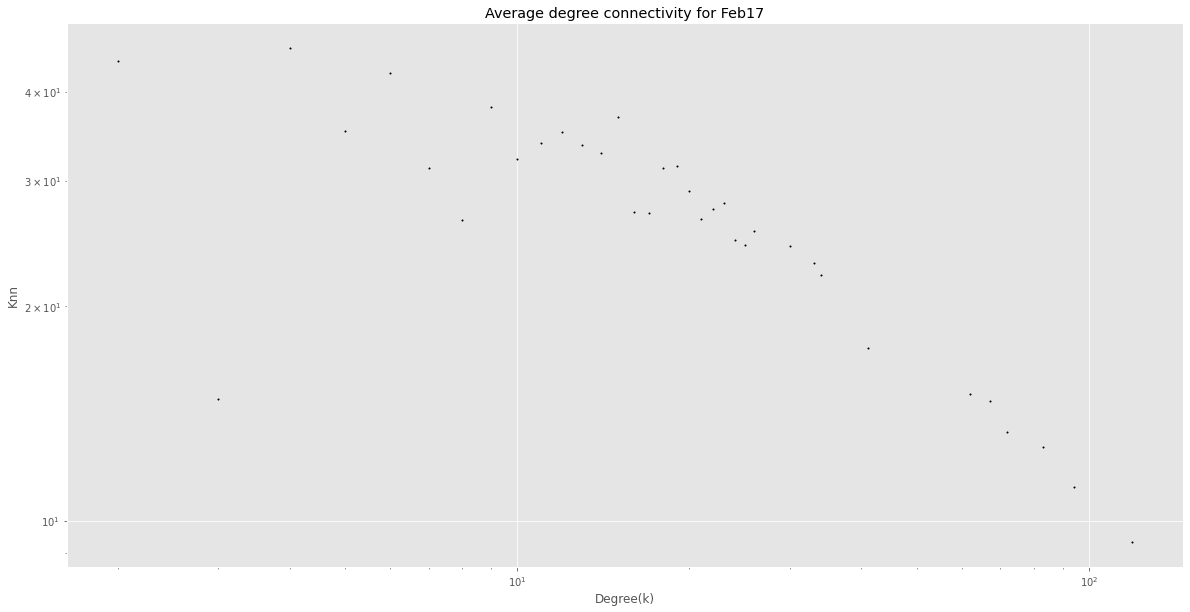

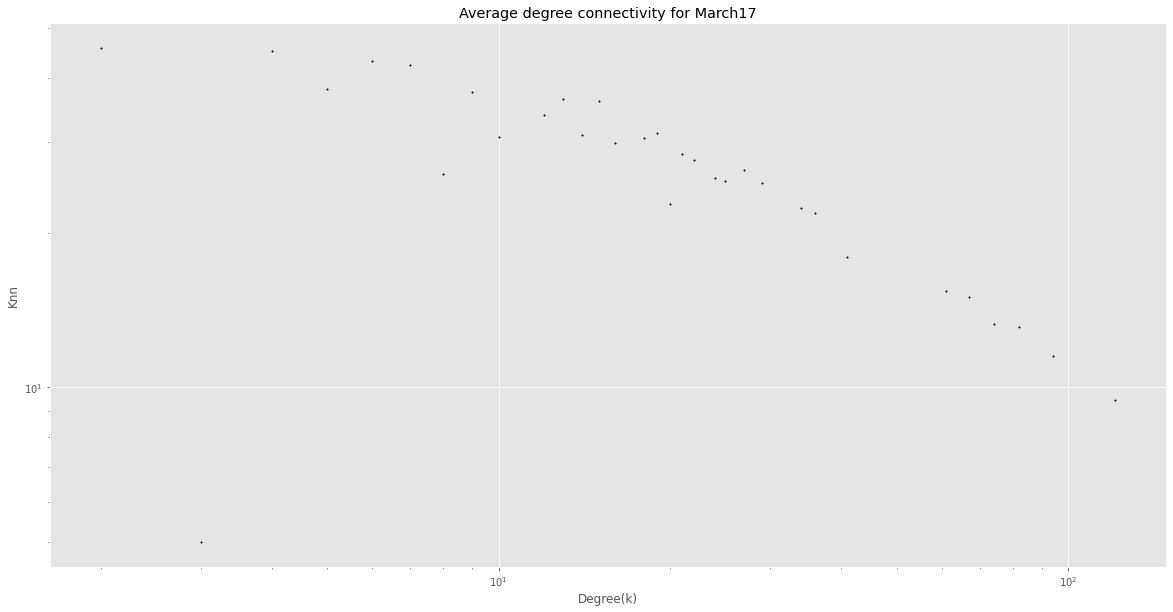

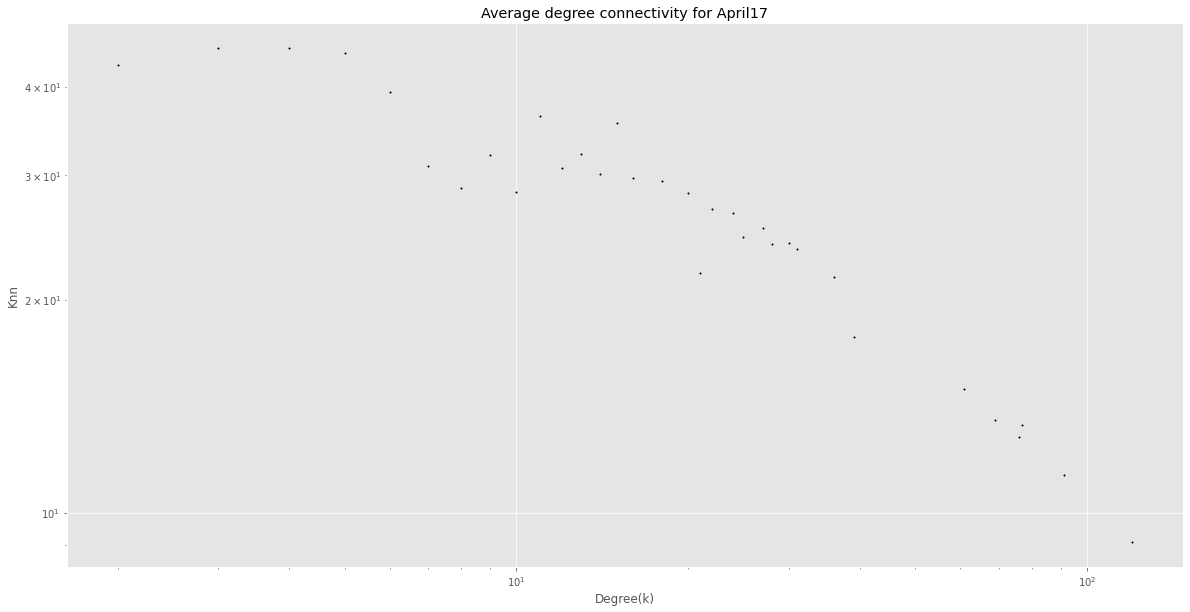

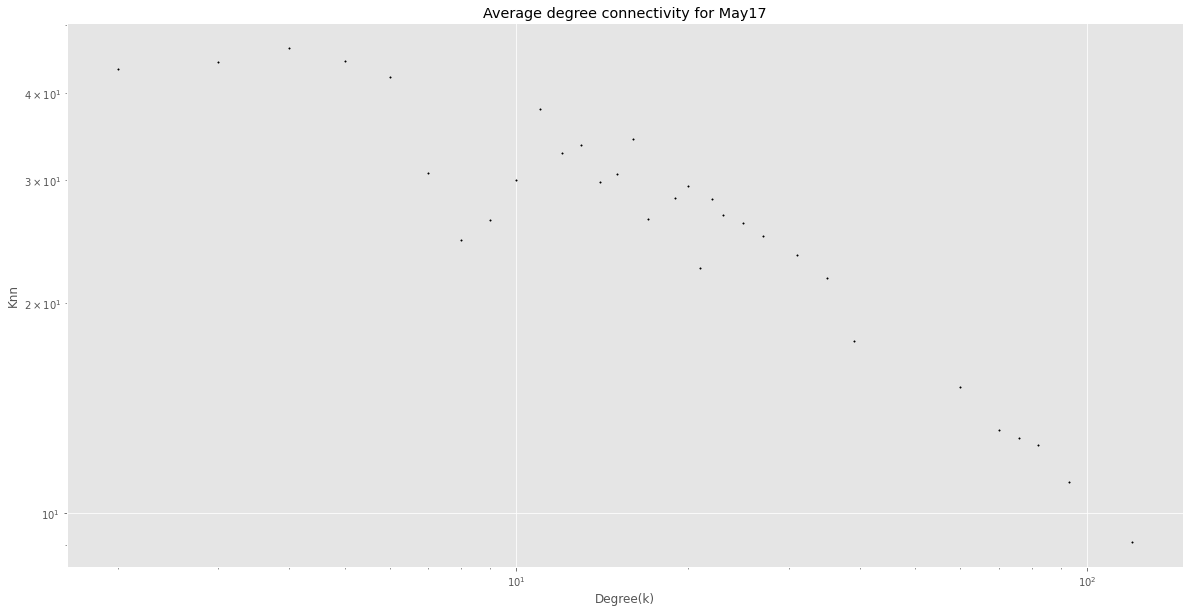

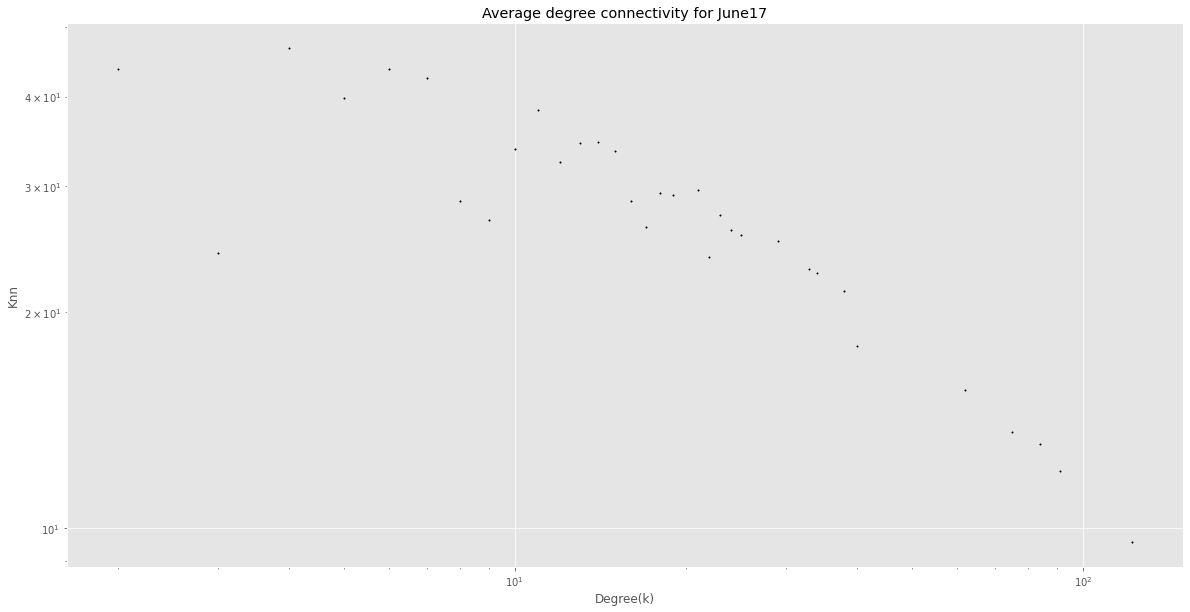

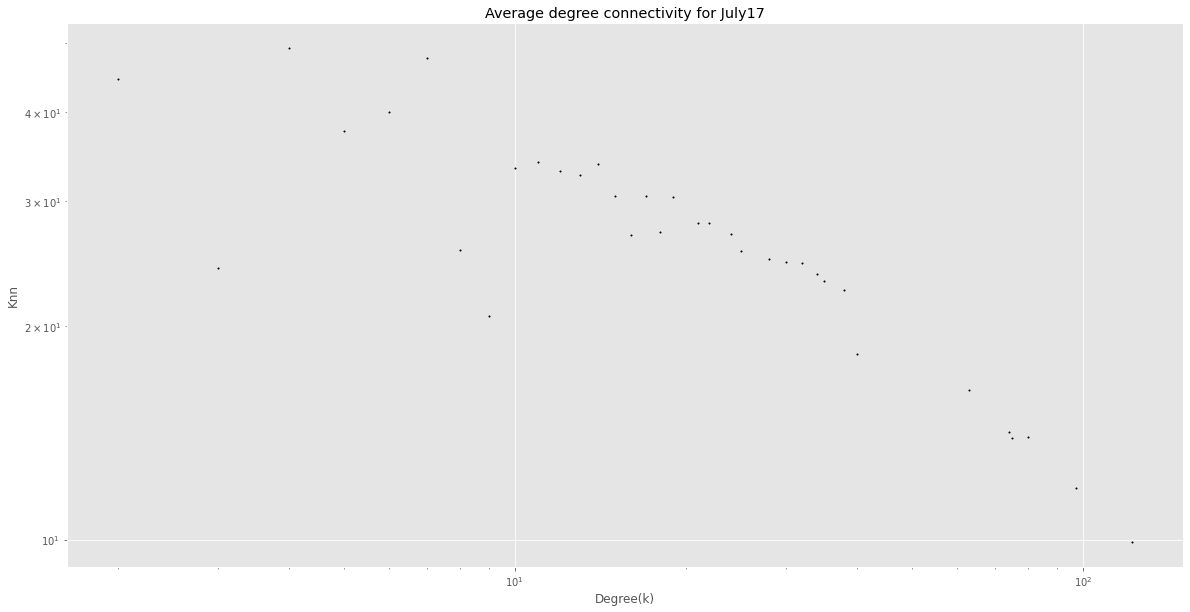

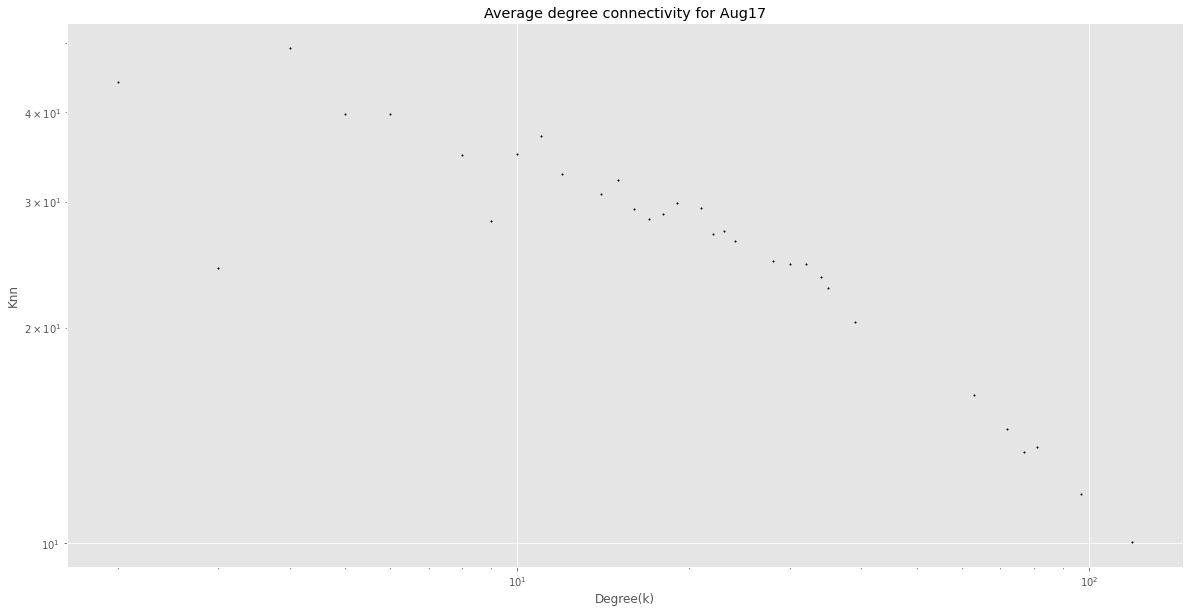

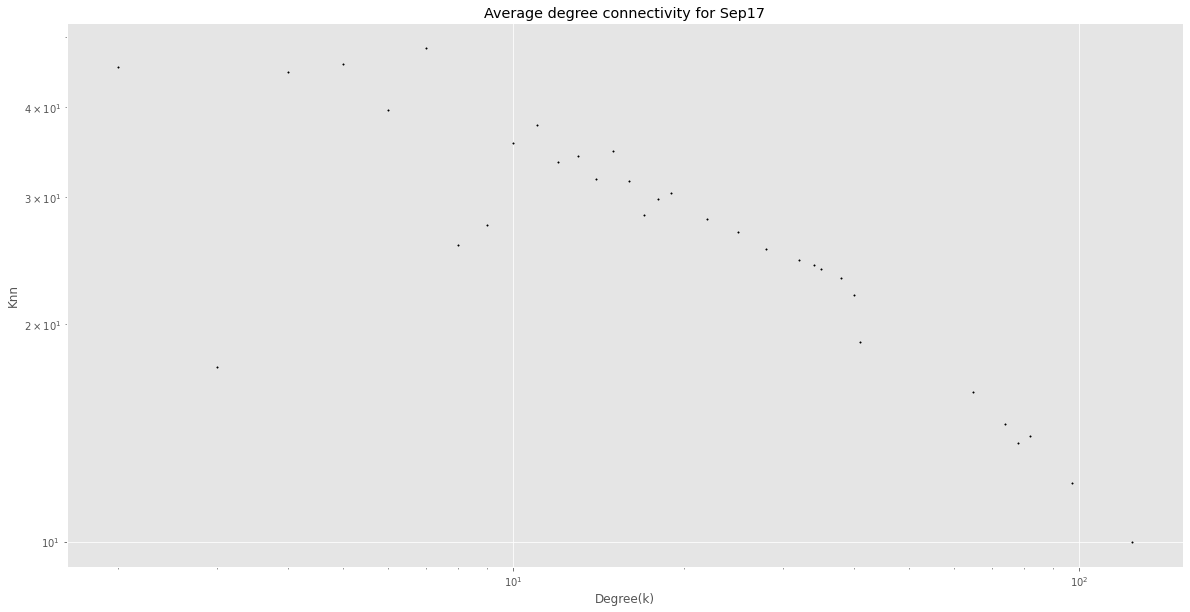

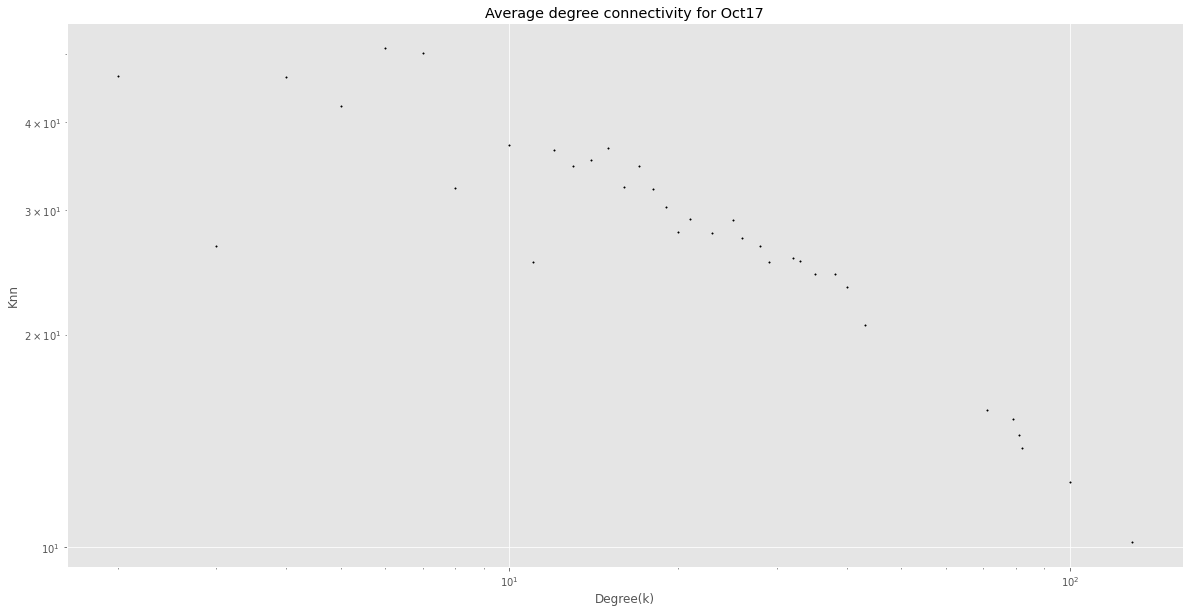

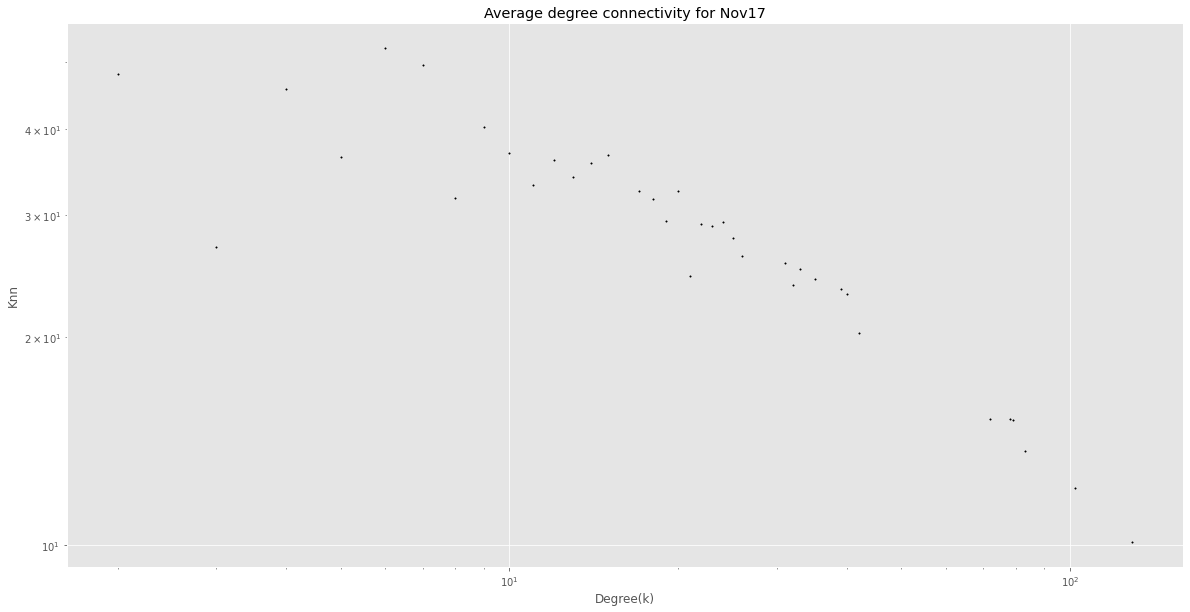

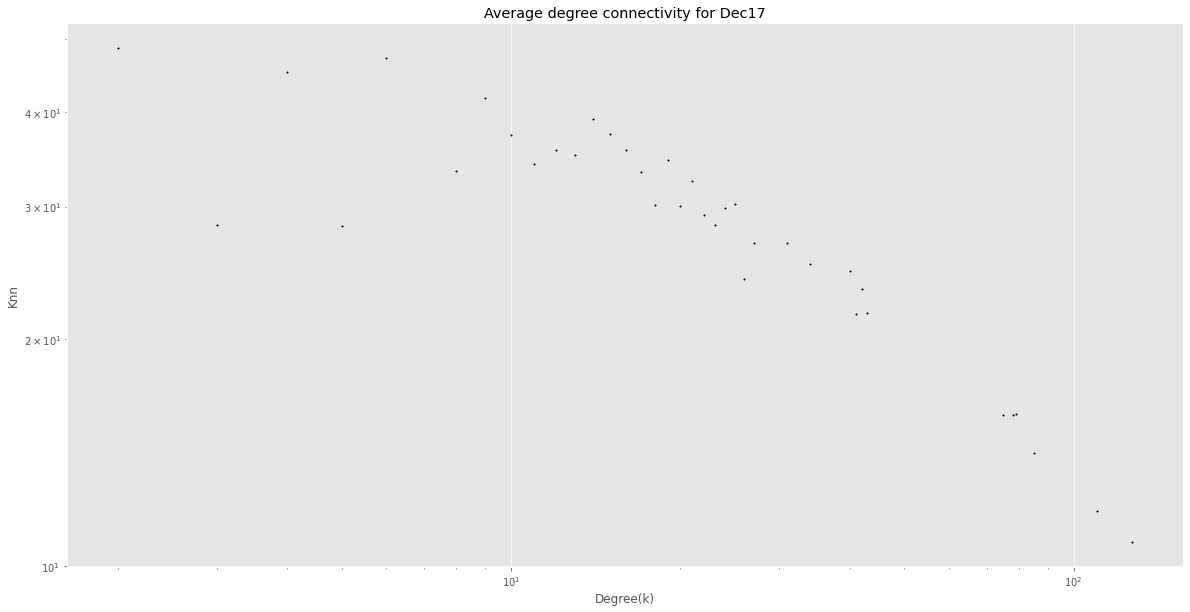

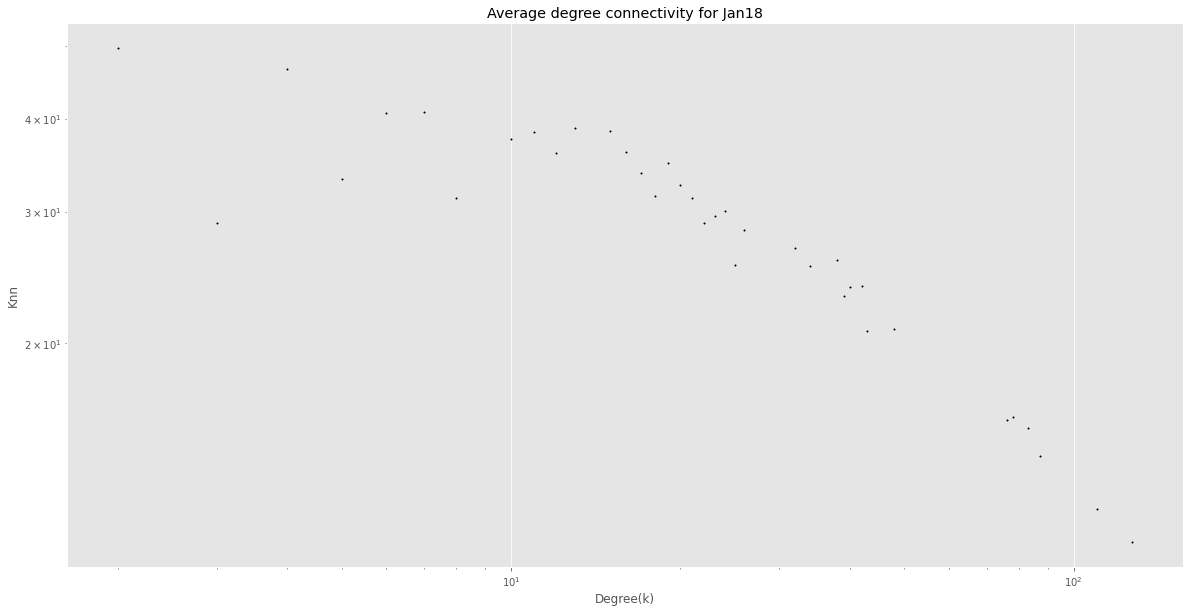

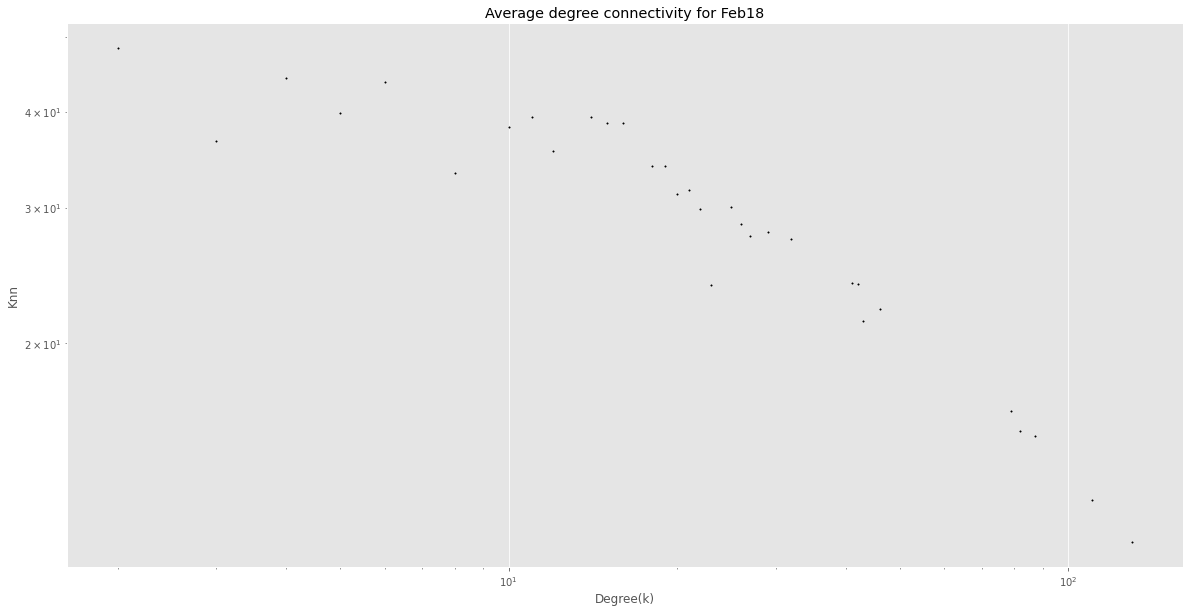

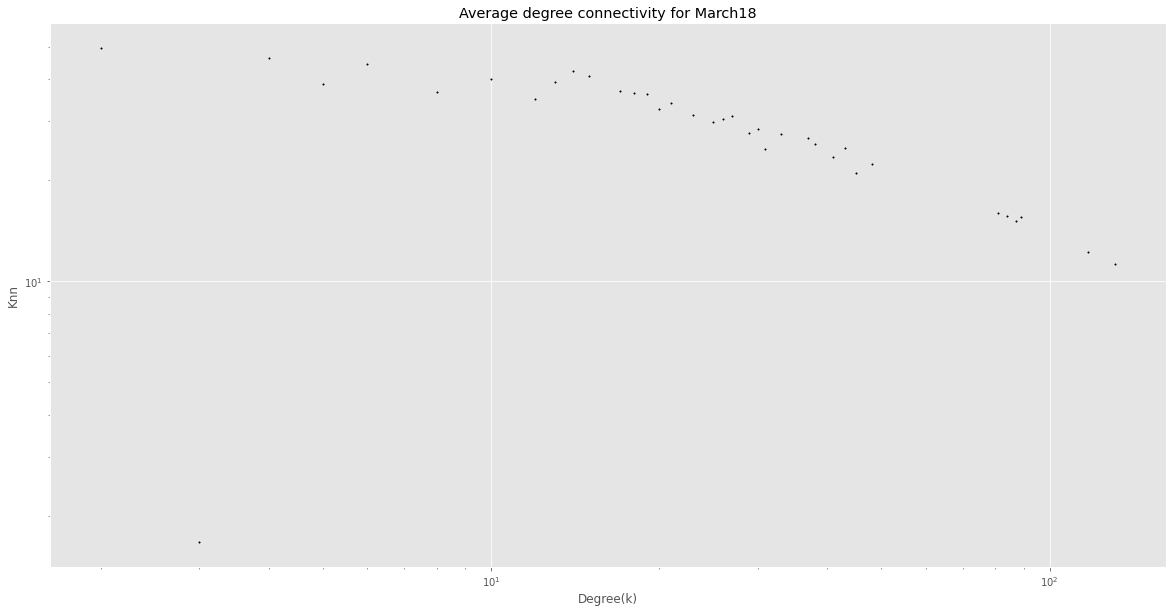

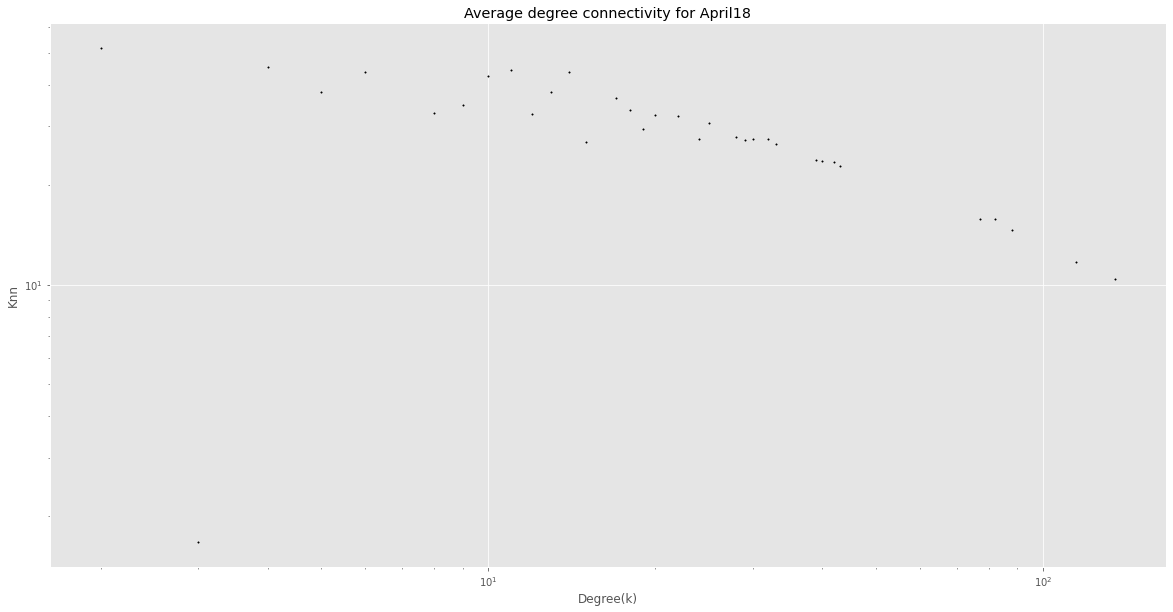

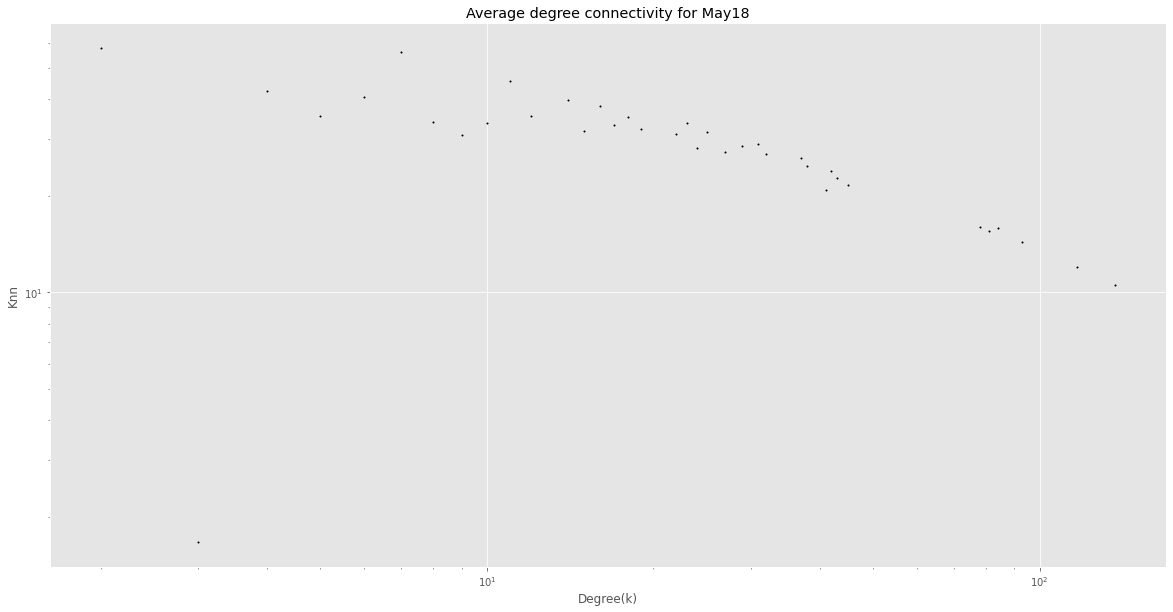

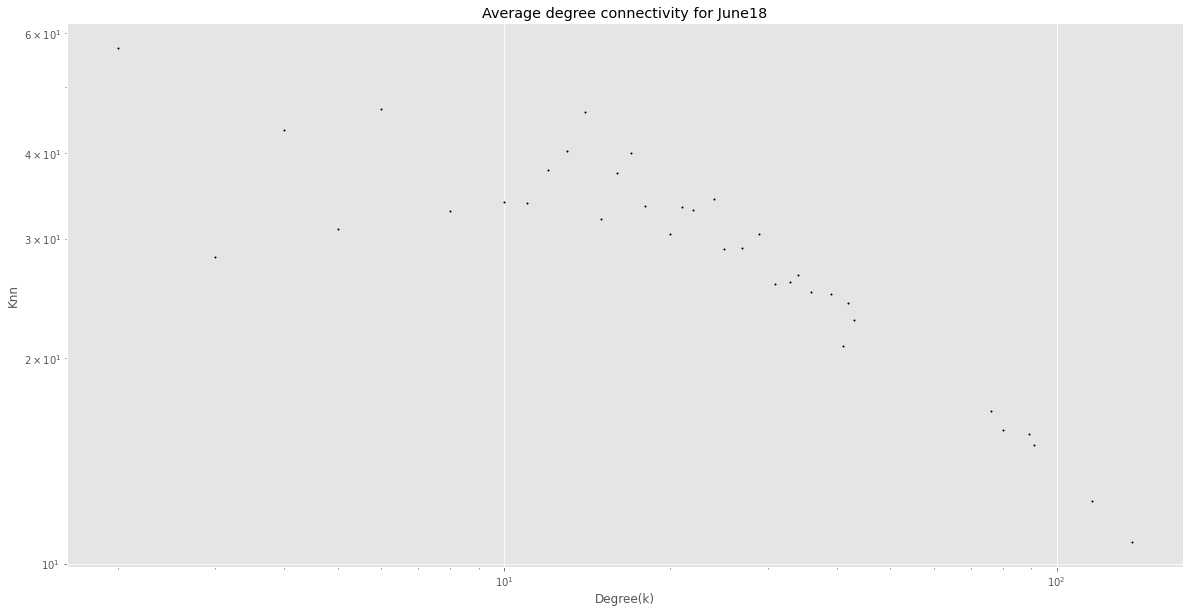

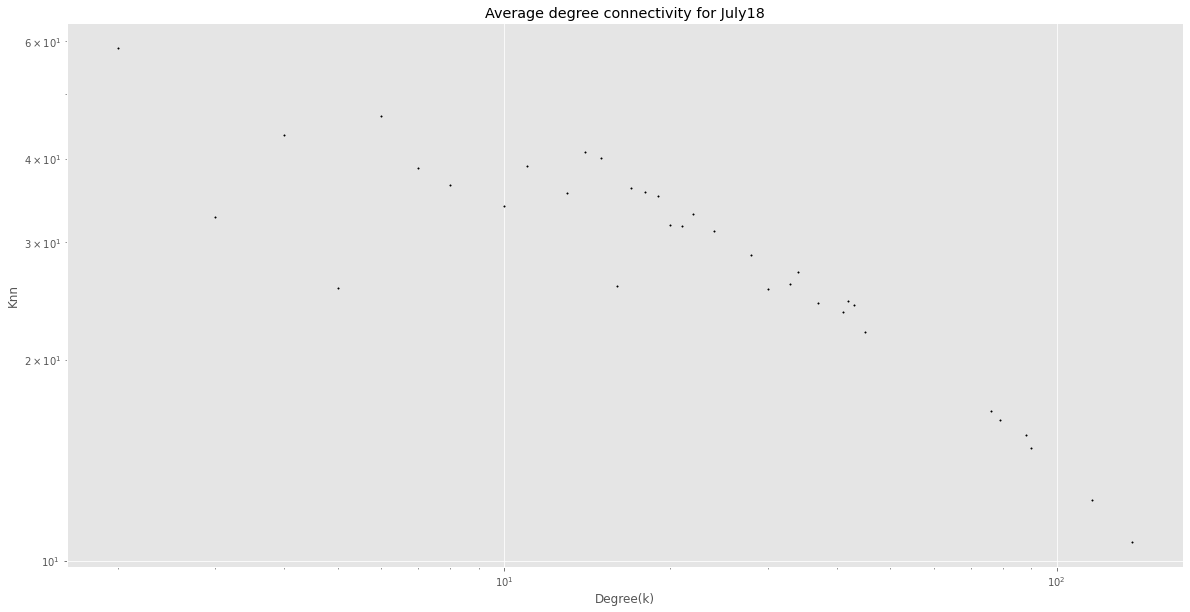

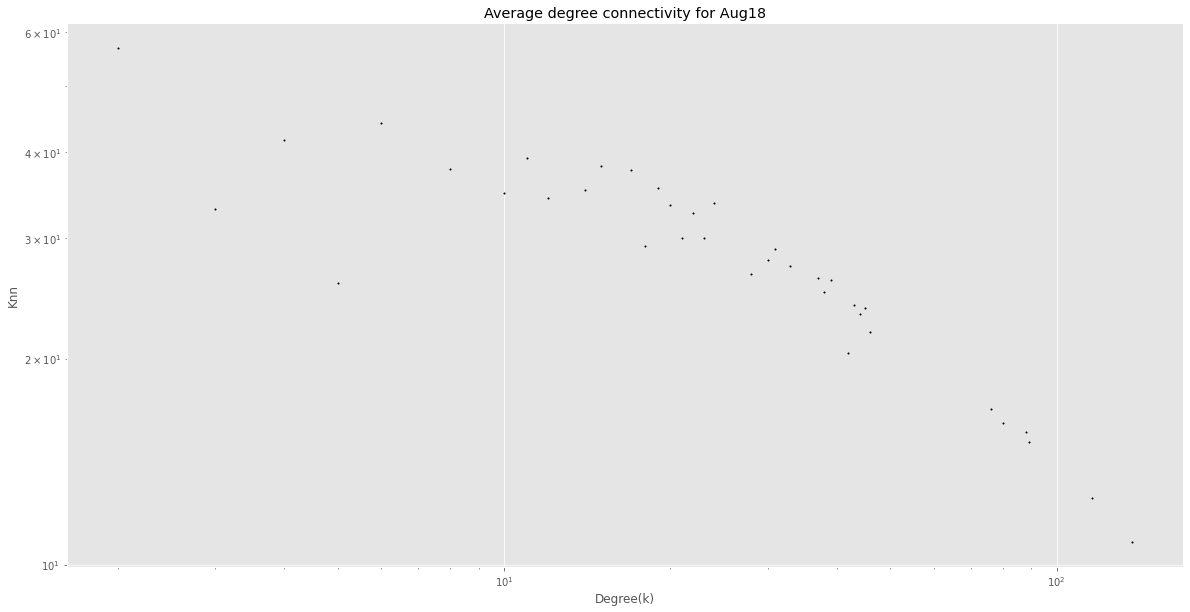

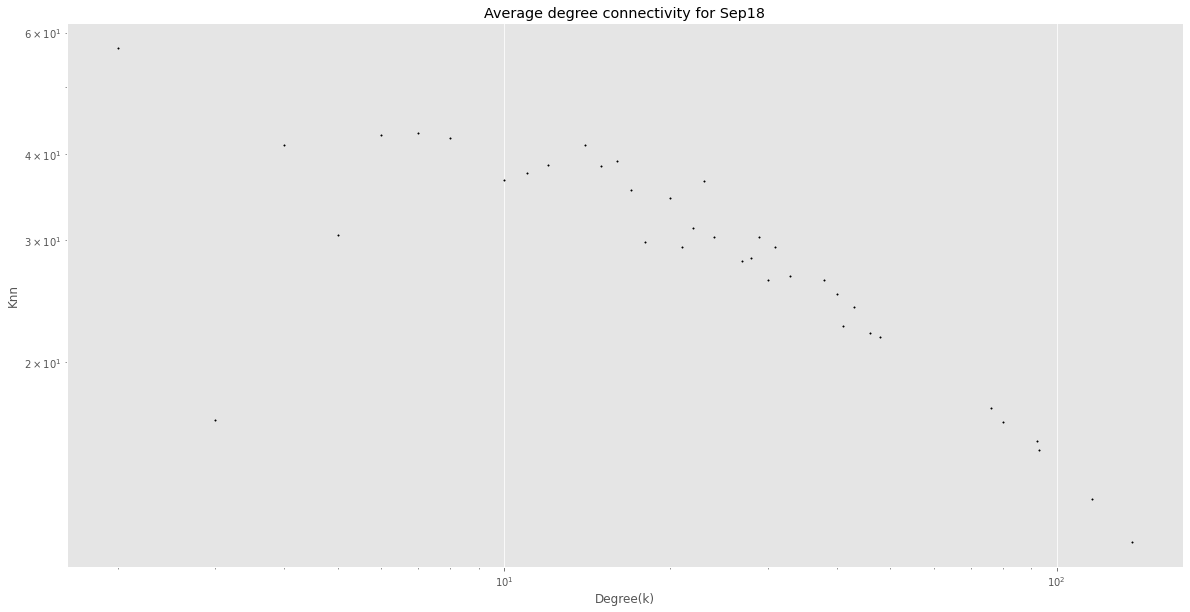

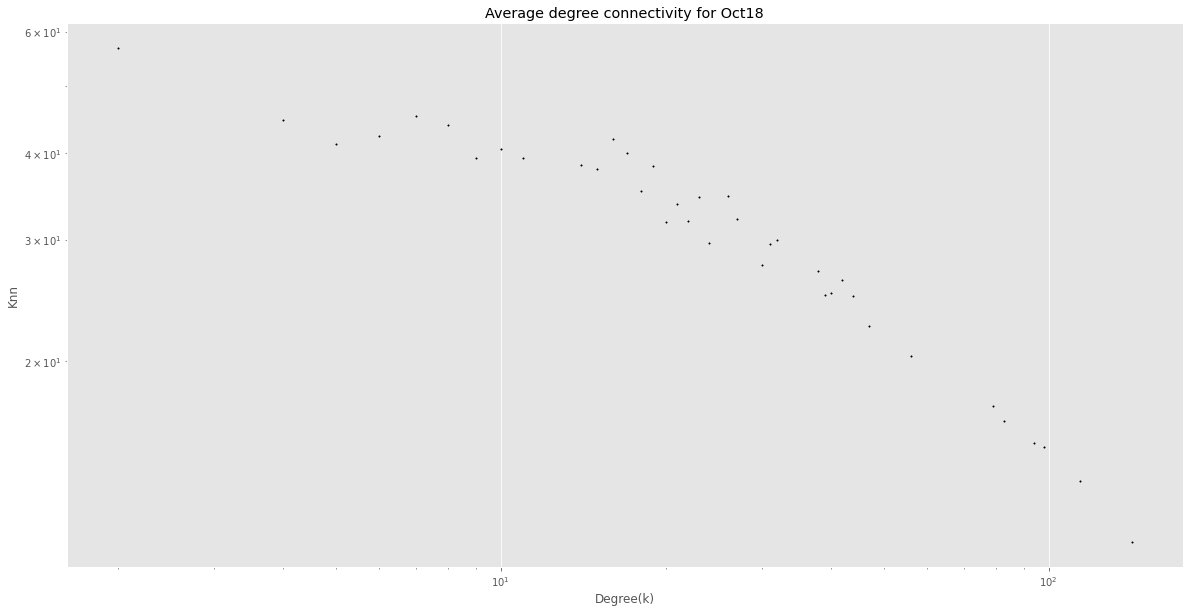

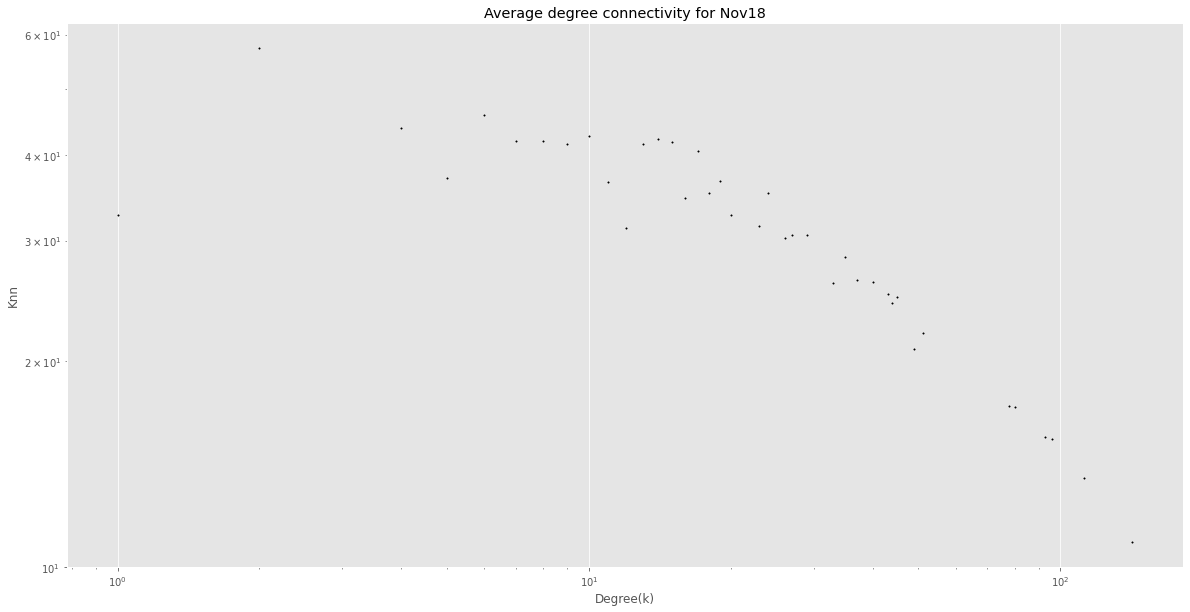

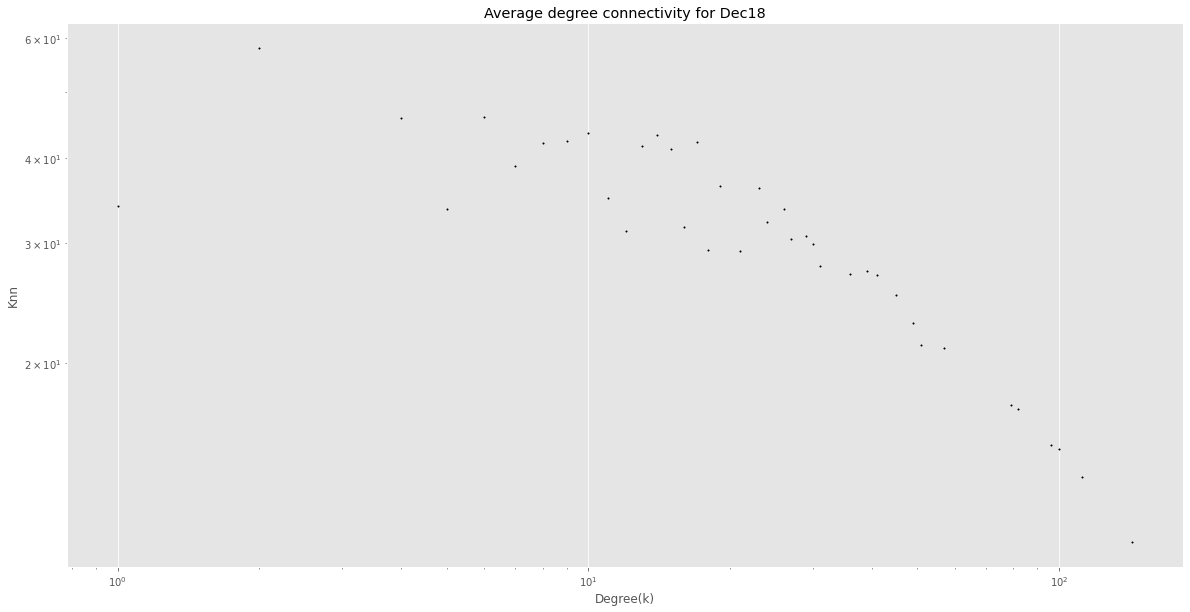

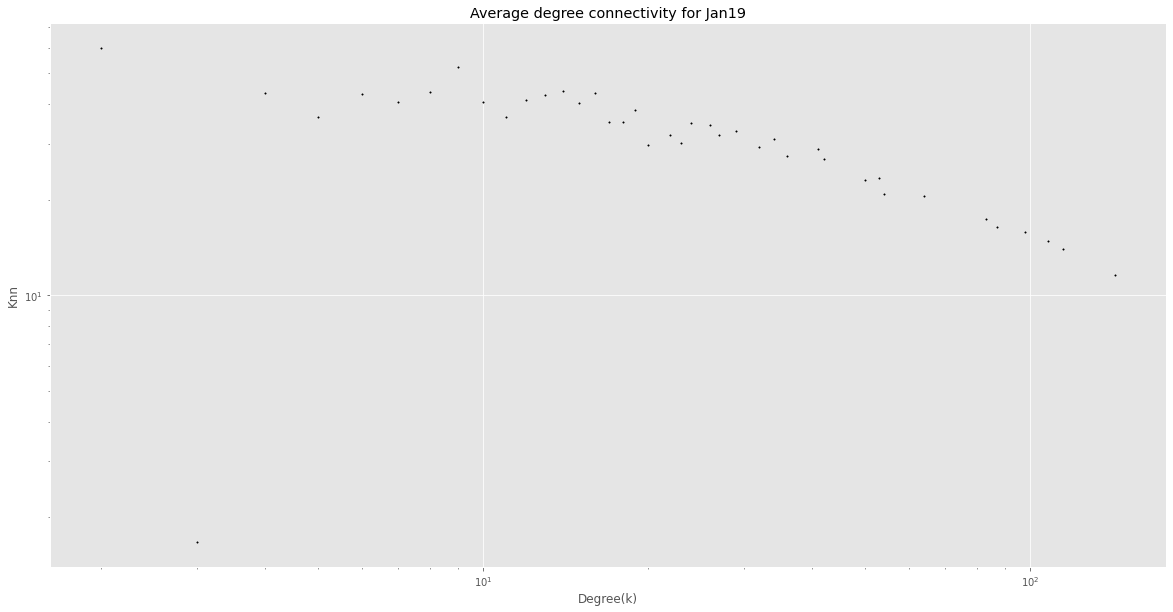

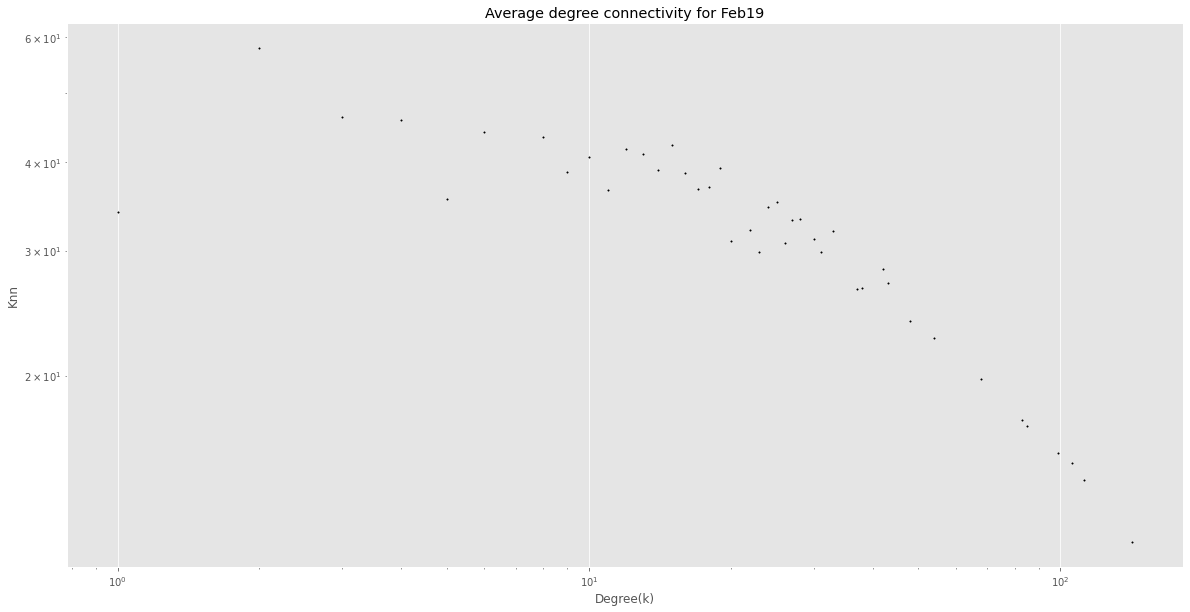

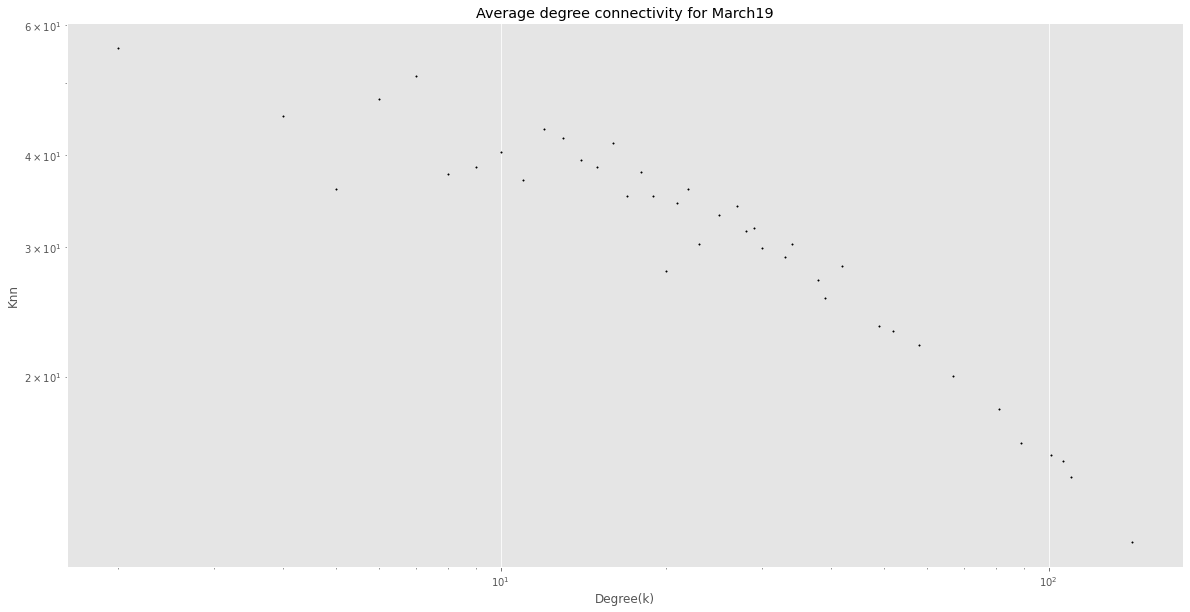

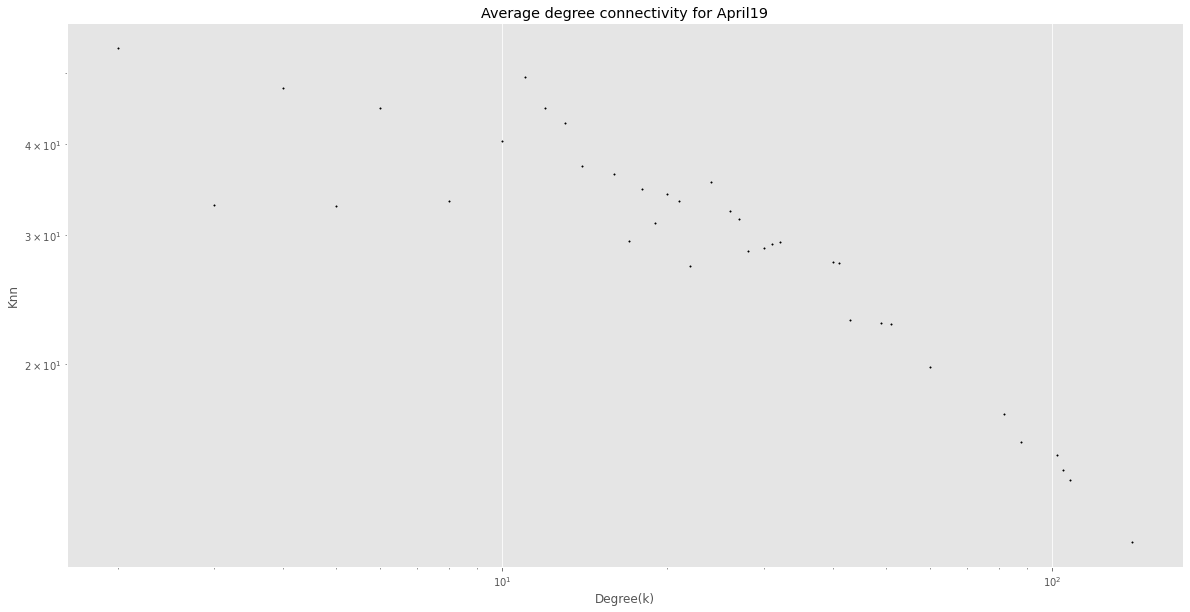

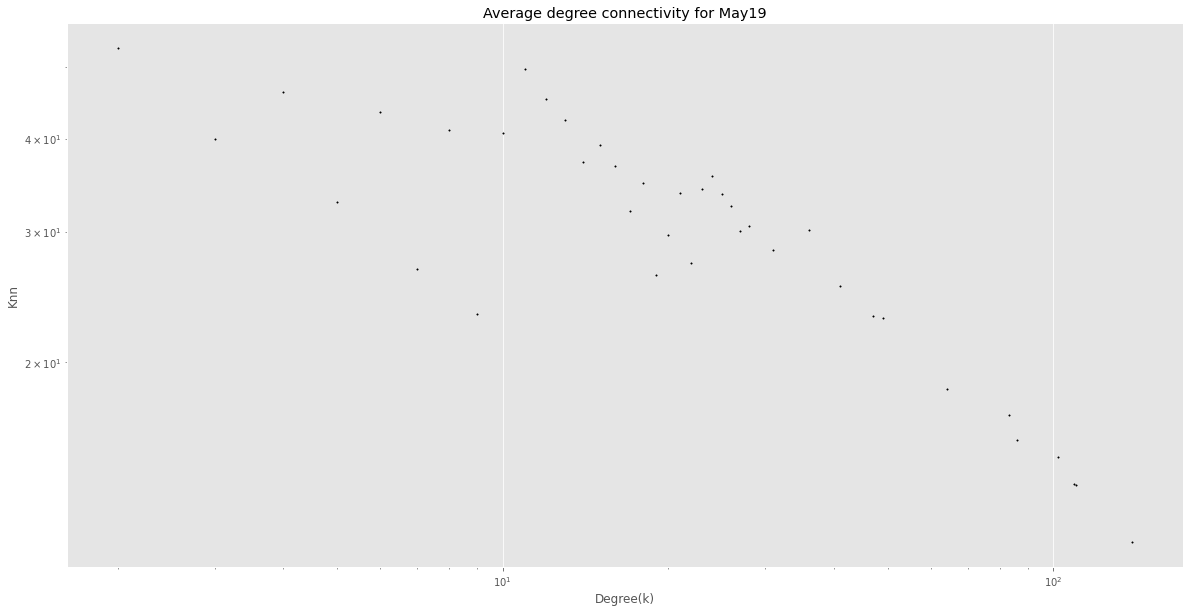

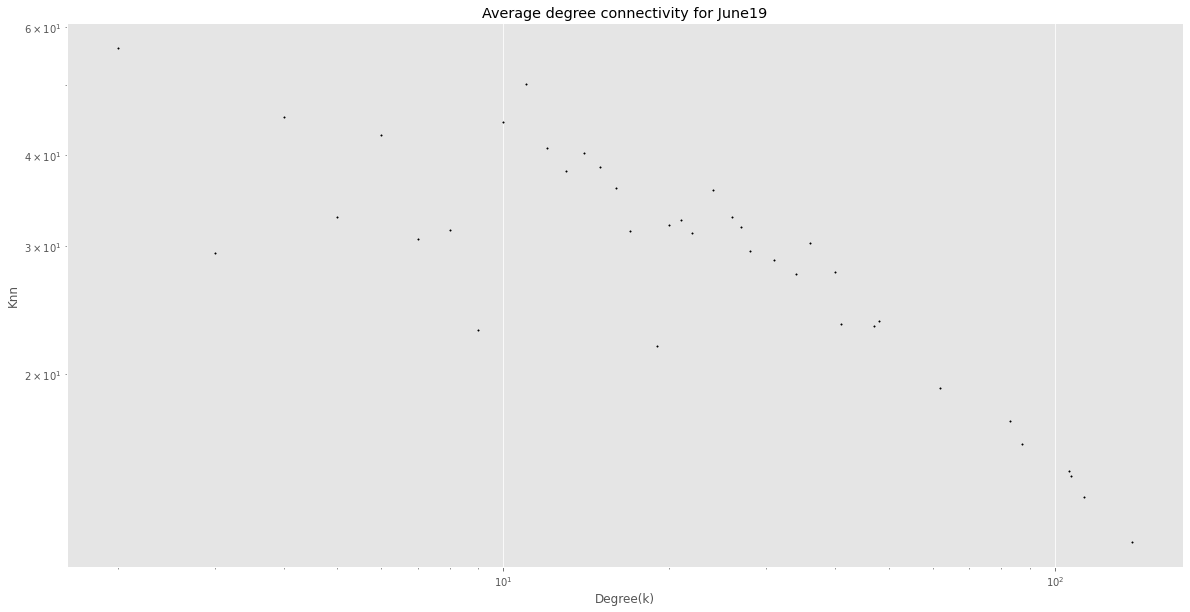

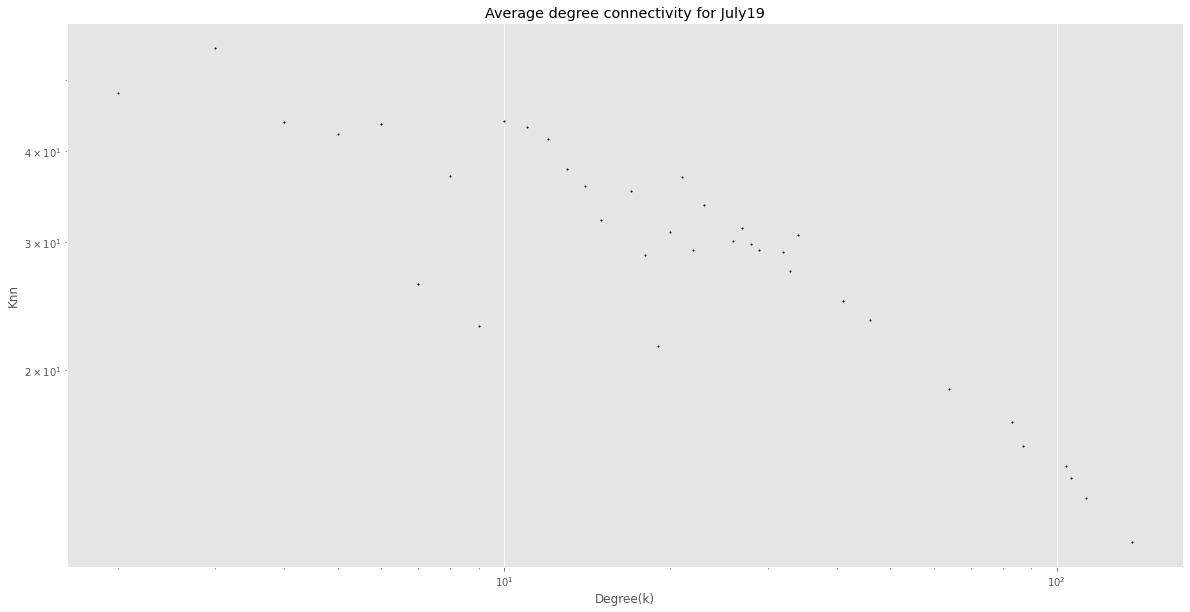

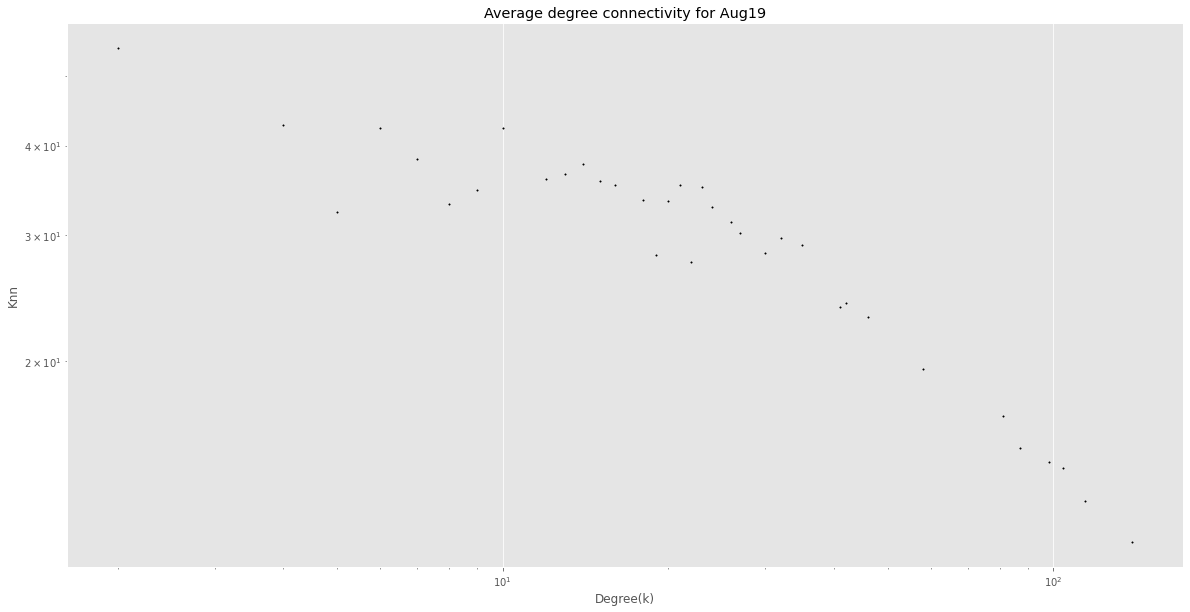

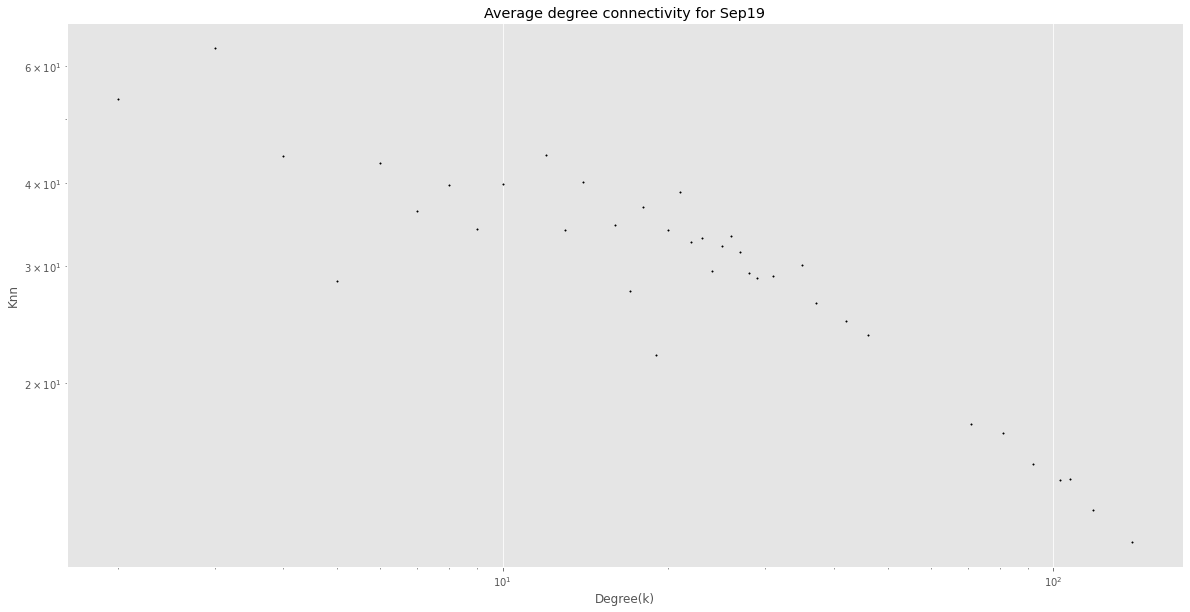

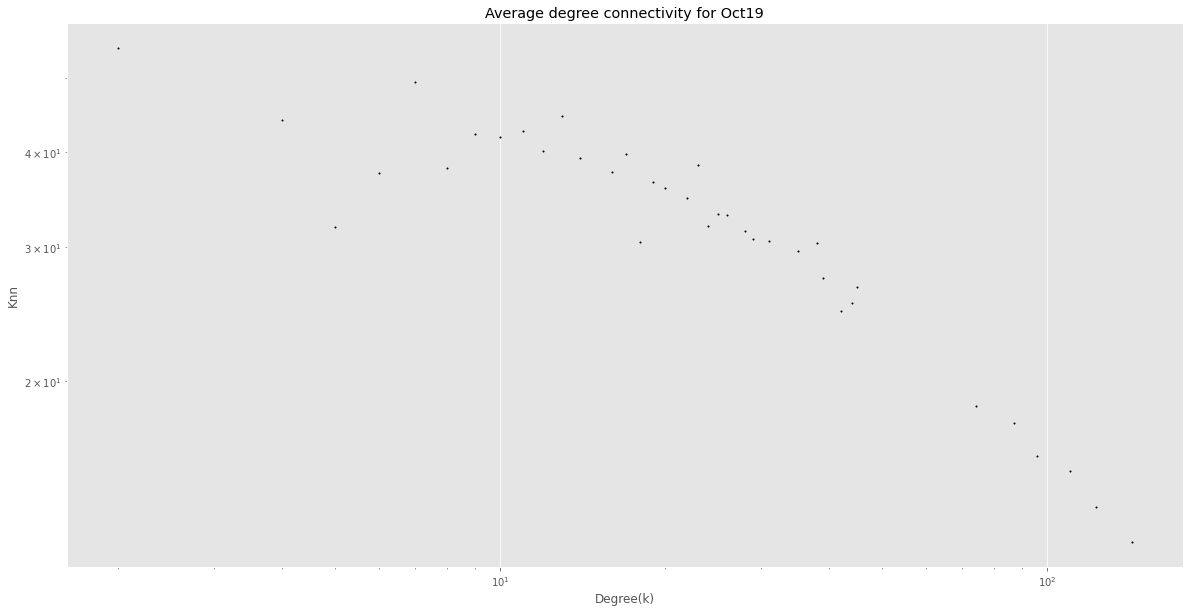

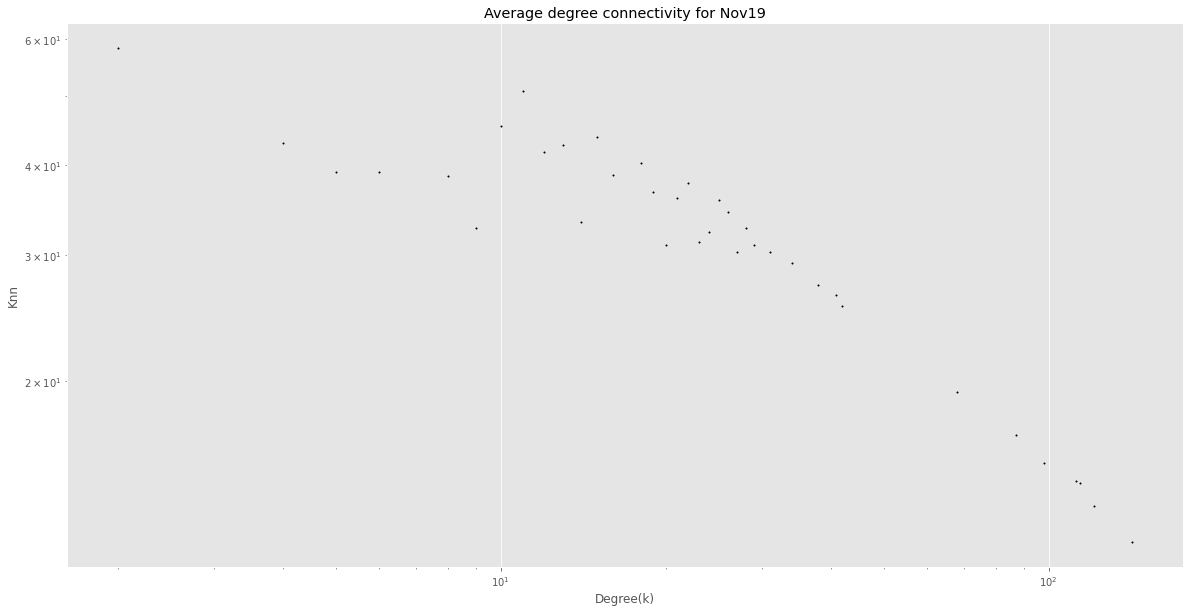

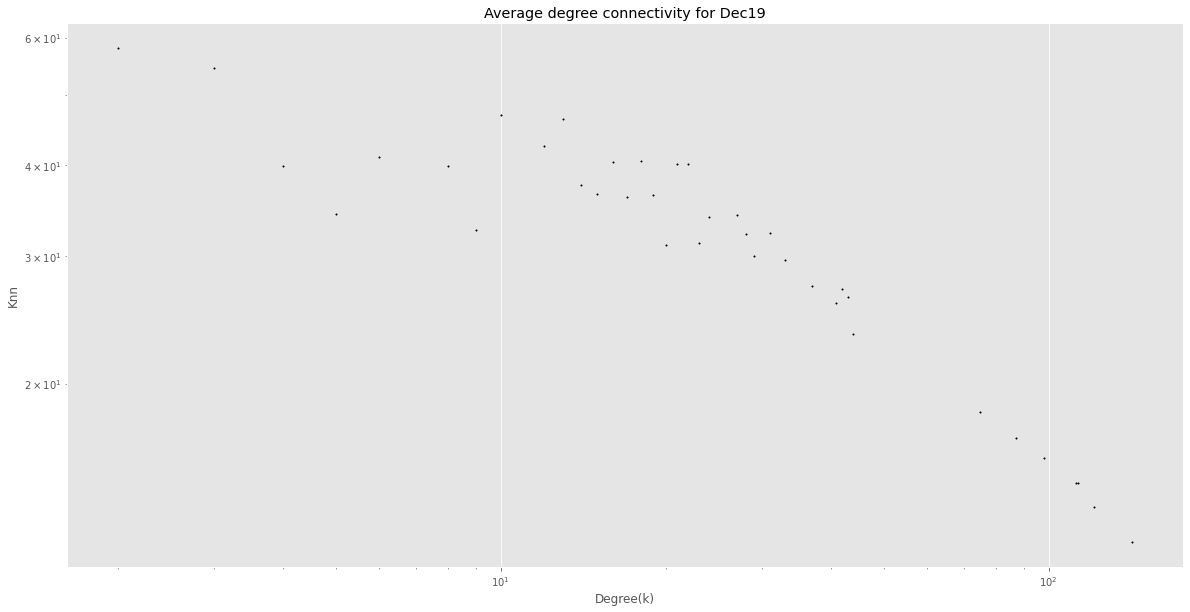

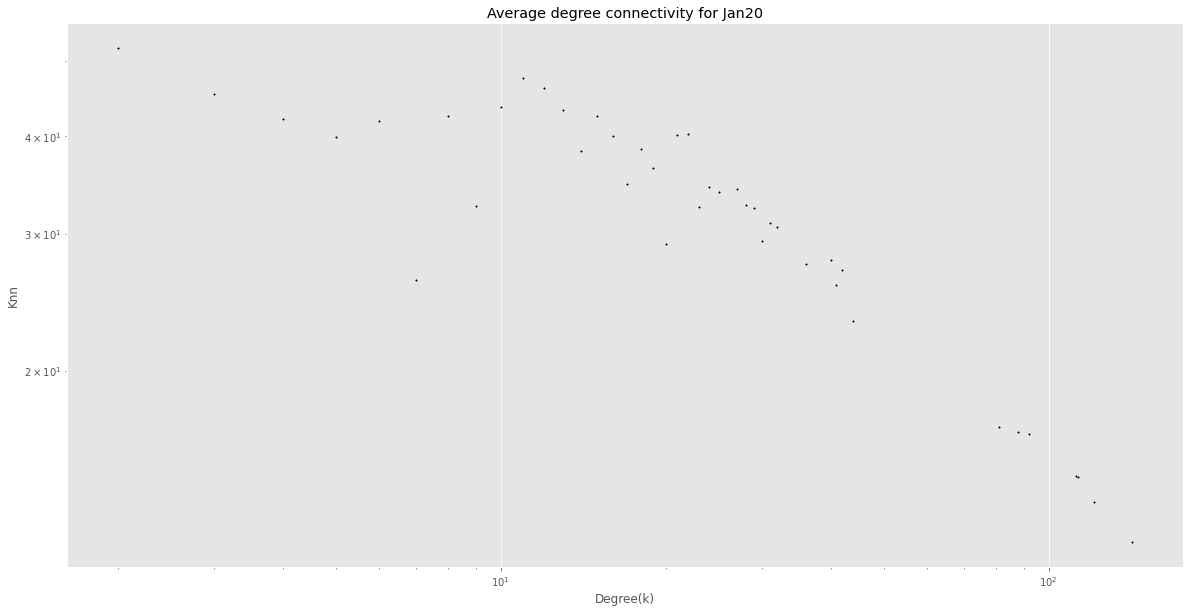

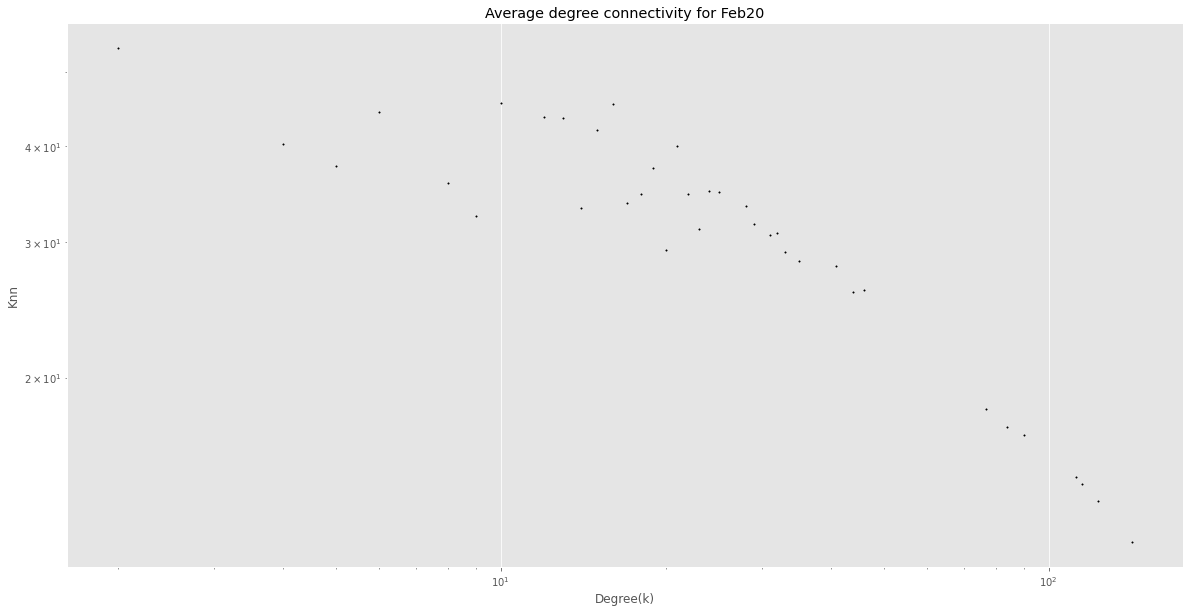

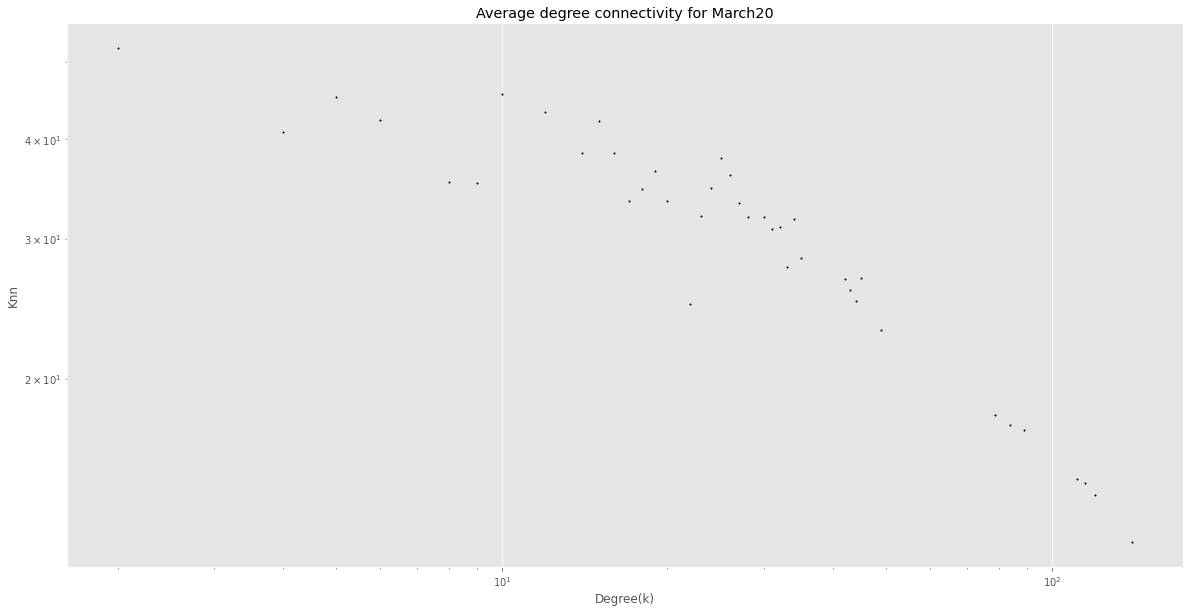

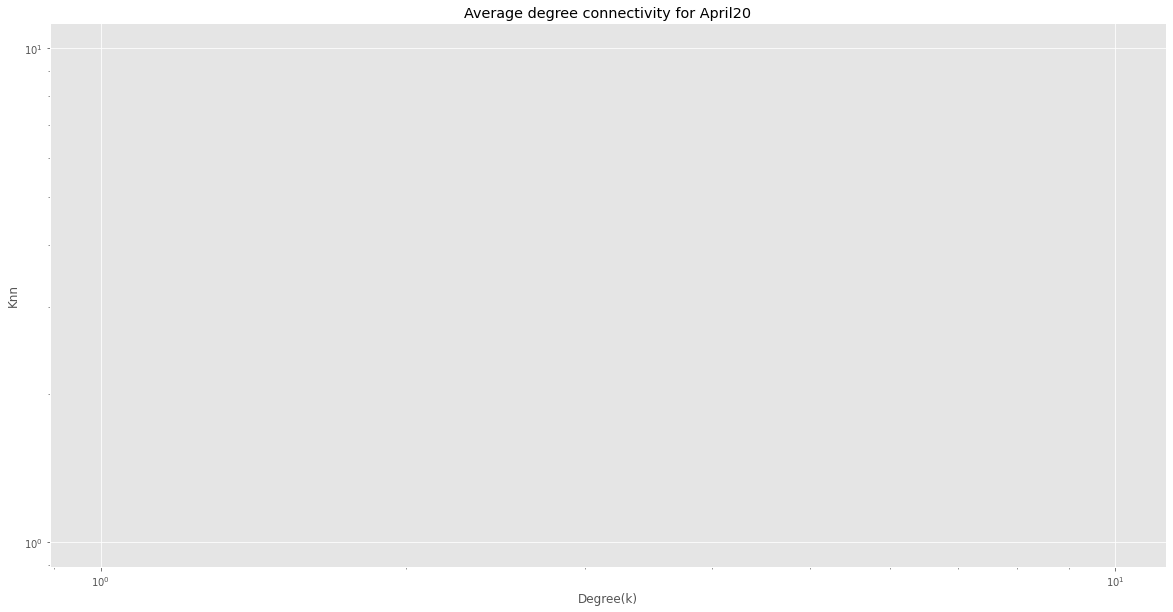

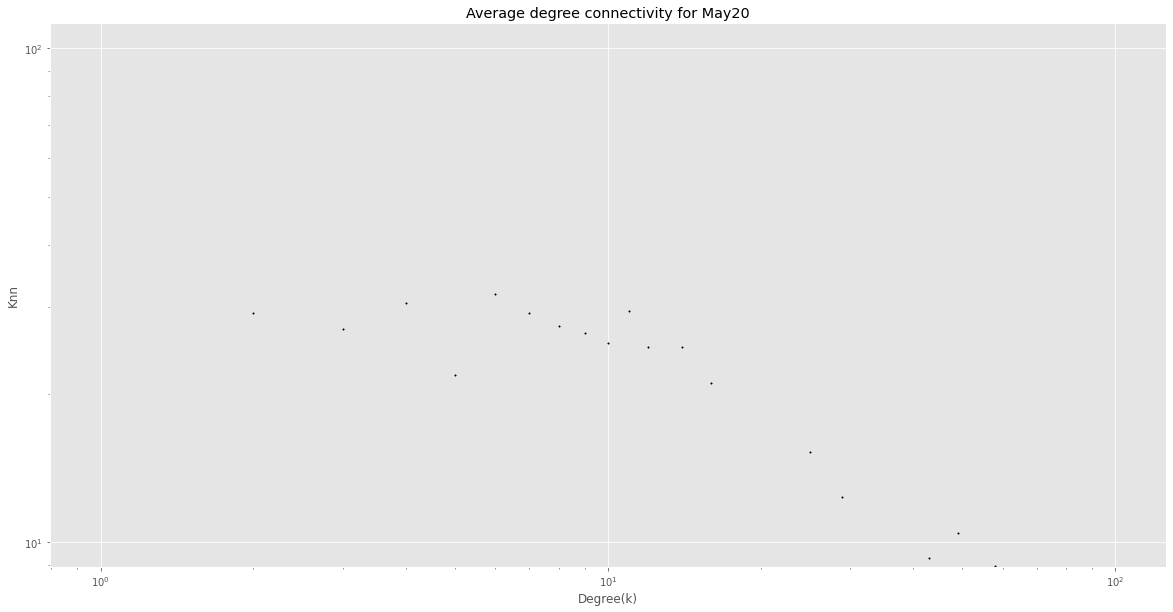

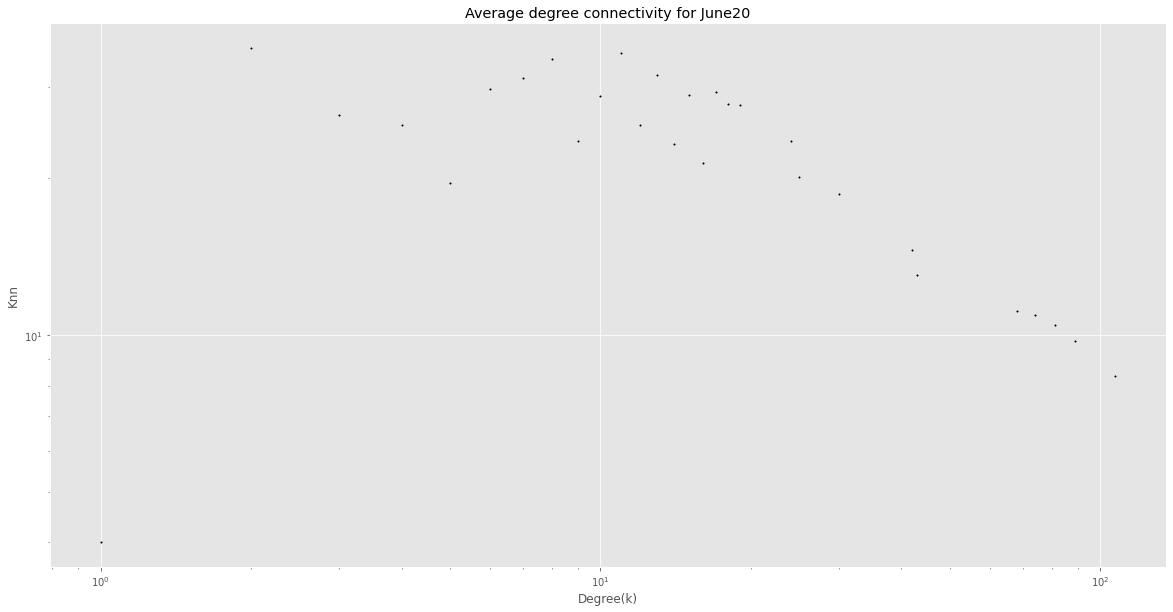

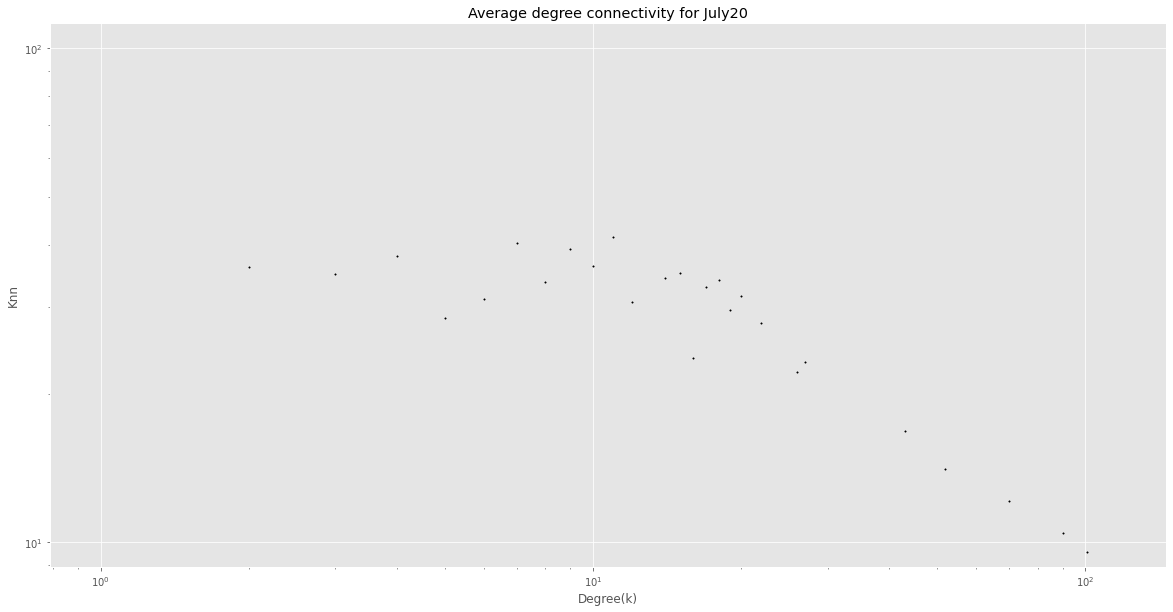

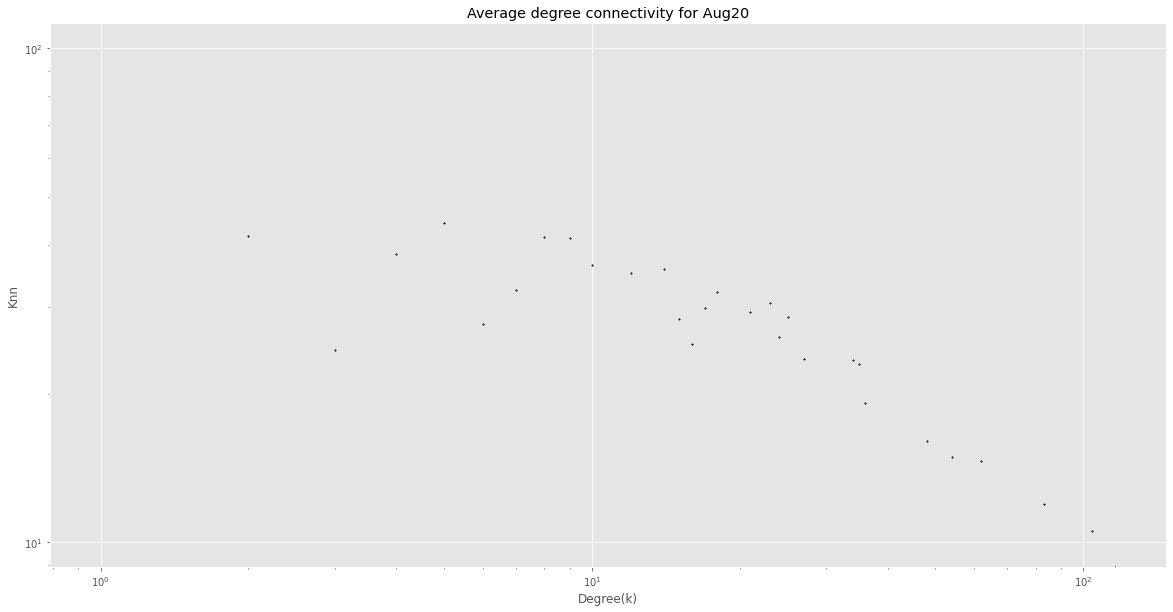

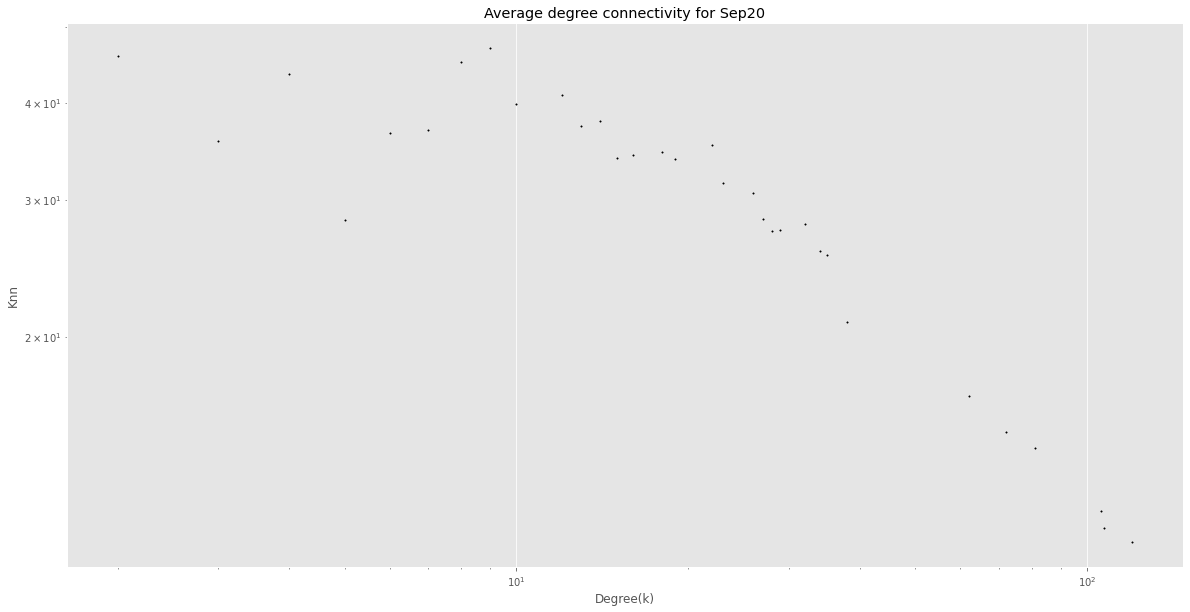

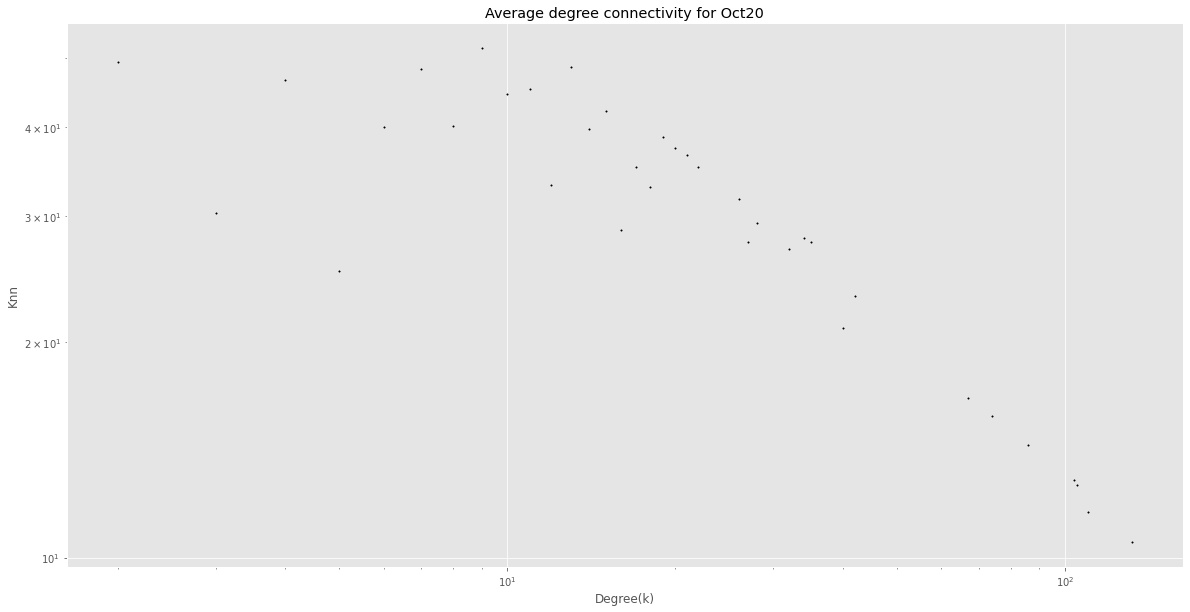

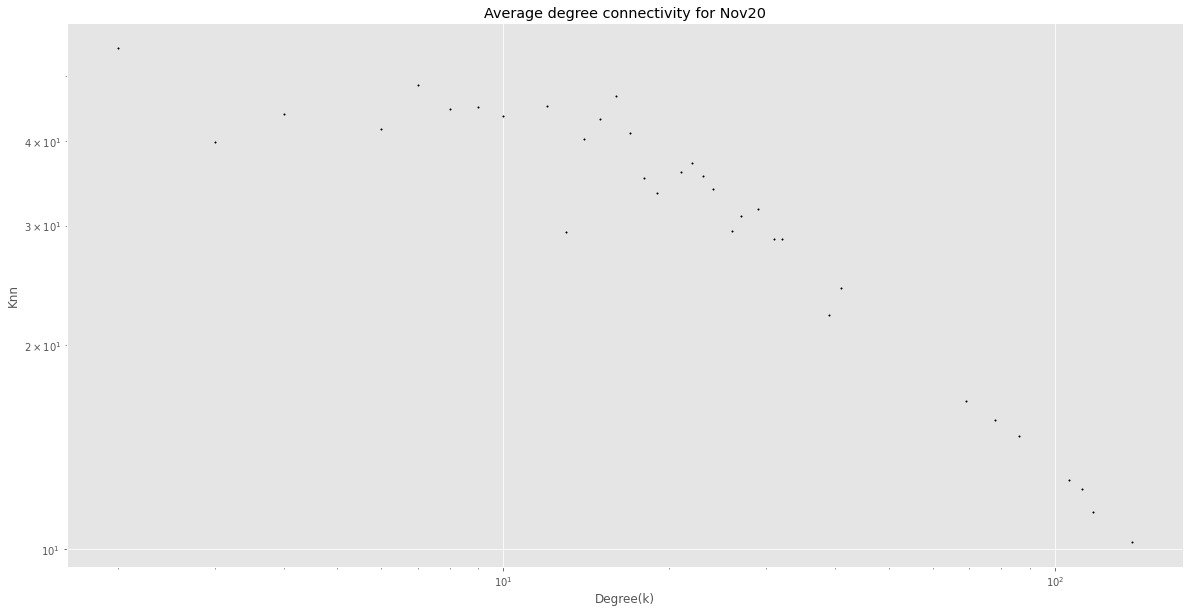

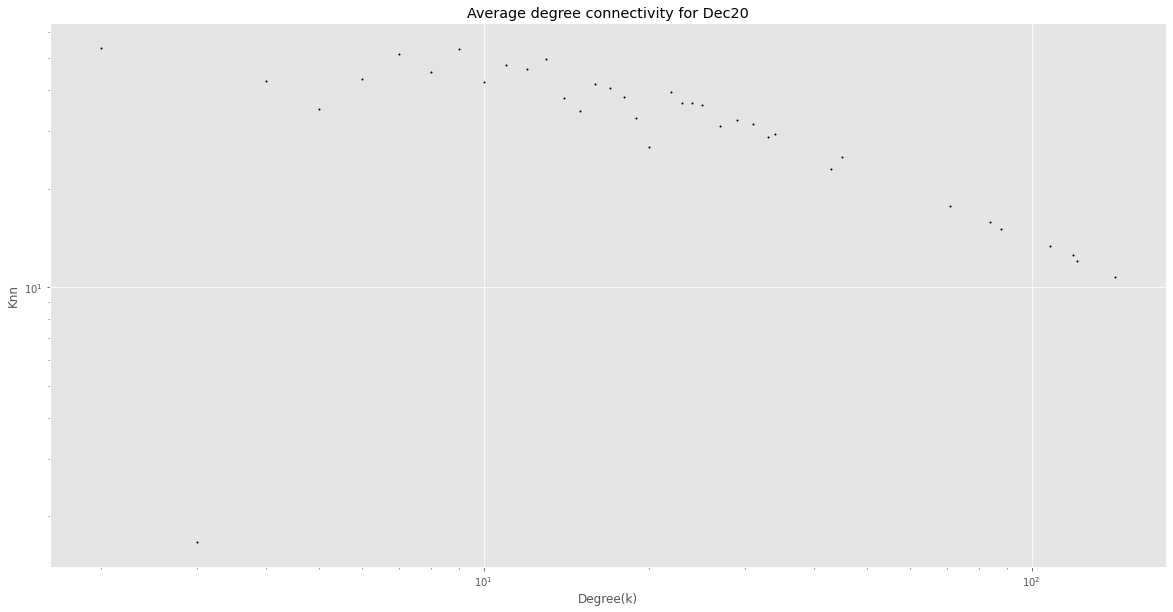

In [40]:
for i in range(len(graphs)):
    G = graphs[i]
    plt.figure()
    plt.title("Average degree connectivity for " + lbls1[i])
    plt.xlabel("Degree(k)")
    plt.ylabel("Knn")
    plt.xscale("log")
    plt.yscale("log")
    #plt.grid(True, which="both")
    k_knn = nx.k_nearest_neighbors(G)
    plt.scatter(k_knn.keys(), k_knn.values(), color="black",  marker="o", s=2)
#     plt.xticks([t for t in range(max(k_knn.keys())+1)])        
    plt.savefig('Output_Files/matplotlib/Knn vs k/' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()